In [25]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCXGate, RXGate, RZZGate
from qiskit.circuit import Parameter
from sympy.physics.quantum import TensorProduct
from sympy import Matrix
import numpy as np

In [6]:
beta = Parameter(r'$\beta$')   
theta = Parameter(r'$\theta$')       
alpha = Parameter(r'$\alpha$')

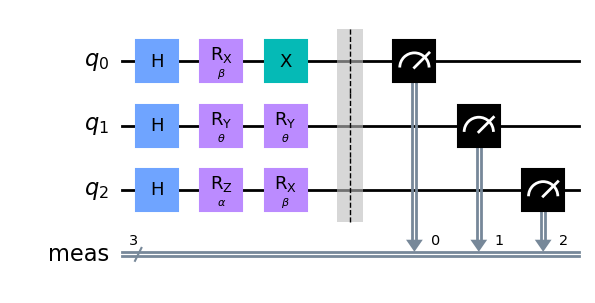

In [12]:
qc = QuantumCircuit(3)
qc.h([0, 1, 2])
qc.rx(beta, 0)
qc.ry(theta, 1)
qc.rz(alpha, 2)

qc.rx(beta, 2)
qc.ry(theta, 1)
qc.x(0)

qc.measure_all()


qc.draw('mpl')


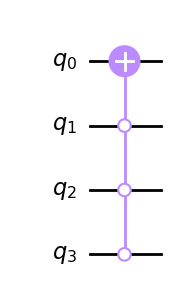

In [4]:
qc = QuantumCircuit(4)

qc.append(MCXGate(3, ctrl_state='000'), [2, 1, 3, 0])
qc.draw('mpl')

In [14]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library.standard_gates import RXGate
import numpy as np


beta_para = 2*np.pi*np.random.rand(1)[0]

# Create a quantum circuit
qc = QuantumCircuit(5)


MCRX = RXGate(beta_para).control(num_ctrl_qubits=4, ctrl_state='0000')

# Append the gate to the circuit
qc.append(MCRX, [1, 2, 3, 4, 0])

In [17]:
def ctrl_qubits(matrix, row_idx, col_idx):
    neighbors = []
    num_rows = len(matrix)
    num_cols = len(matrix[0])

    # Add neighbors from the same row
    for j in range(num_cols):
        if j != col_idx:  # Exclude the element itself
            neighbors.append(matrix[row_idx][j])

    # Add neighbors from the same column
    for i in range(num_rows):
        if i != row_idx:  # Exclude the element itself
            neighbors.append(matrix[i][col_idx])

    return neighbors
           

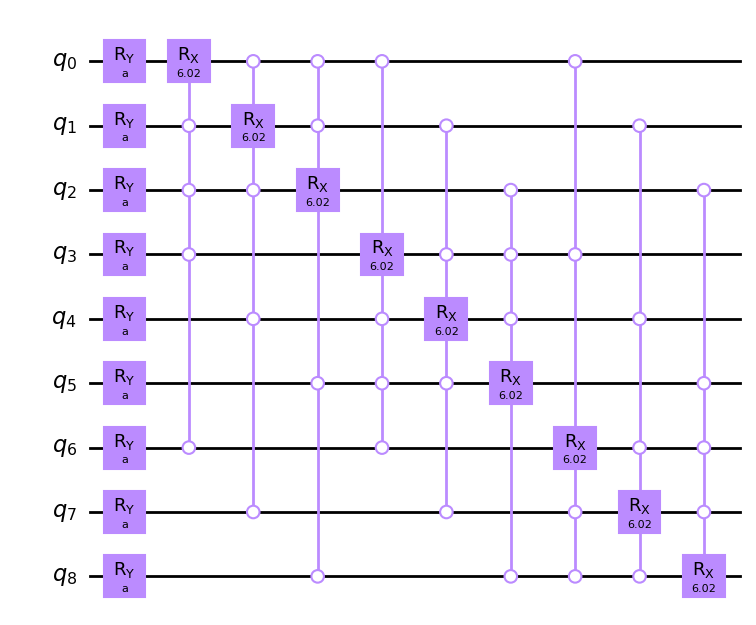

In [21]:
from qiskit.circuit.library.standard_gates import RYGate
n = 3
qc=QuantumCircuit(n*n)
a=Parameter('a')

ry = RYGate(a)
for qbit in range(n*n):
    qc.append(ry, [qbit])
    
MCRX = RXGate(beta_para).control(num_ctrl_qubits=4, ctrl_state='0000')
matrix = np.array([i for i in range(n*n)]).reshape(n, n)

for i in range(n):
    ctrl1 = [i]
    for j in range(n):  
        ctrl2 = list(ctrl_qubits(matrix, i, j))+[matrix[i][j]]
        qc.append(MCRX, ctrl2)

qc.draw('mpl')

[3, 4, 1, 2]

In [8]:
def factorial(num):
    fact = 1
    while num > 0:
        fact *= num
        num -= 1
    return fact

factorial(84999)

3251657806032221037254075684244312629922416659982445240997843096029800920380576195625917253789423189446518671195552708126525802537462615744457306327320420459558543887474103223882320799421810168347335893114192825491214015333547188827584415812510758159118869091487870606489415823880486039681275460077332722190863528279555035694092474358270456131721029096156662924174538929608630846915197787820001995758828990220874022311234351073007068534929135264417768308596068078355696793270389745653107385174254572946200218256871332505573645108284210908291475546640592544378198113960547184315140497678402034764910499369610796138270453535972634010186904307919941873108585634990918117224623837080334761079384678788617138491717556565567652608651165353604875382602102806076757626393295298312711831180110327655067001884372518839425219258117531551233207116151391203852703238514852756039488487738562302223985682329625323507356033991625797534225208723129463561607971806286117066313180349583288240215459004659856667653371971

In [11]:
l = '3251657806032221037254075684244312629922416659982445240997843096029800920380576195625917253789423189446518671195552708126525802537462615744457306327320420459558543887474103223882320799421810168347335893114192825491214015333547188827584415812510758159118869091487870606489415823880486039681275460077332722190863528279555035694092474358270456131721029096156662924174538929608630846915197787820001995758828990220874022311234351073007068534929135264417768308596068078355696793270389745653107385174254572946200218256871332505573645108284210908291475546640592544378198113960547184315140497678402034764910499369610796138270453535972634010186904307919941873108585634990918117224623837080334761079384678788617138491717556565567652608651165353604875382602102806076757626393295298312711831180110327655067001884372518839425219258117531551233207116151391203852703238514852756039488487738562302223985682329625323507356033991625797534225208723129463561607971806286117066313180349583288240215459004659856667653371971735550710071037757846315846008045891232159571660370764165011184567362462783194662323894400103920174927012633242991553152809928259669337950505419353257864719550583182570719077705480935970094148720479412275598525783501293580699071762788824388499877754607137841120530498694679467480669954298984820795503444386110816449152092708749312672785494463265396800554317985583652447015887812443572869447150520833718345938463732703803088469363450079685358227351384690094216153758158963222084422014120977322579654696670512290949858443682967834604594343037585375378101627462145766144774966645174593268029034643167075194464507210753588277946620582055891398952977160782647119670271062117631184140316162865579647133884793256680559243741001513409523455062831470593408446815153009162963534058808878024248405480761899278495128513692127825654440763403493865682439497344251713607026301731843124807435775955568863811138554544056492292130860733909695929939954474660486099594320204070558194296959199662094649382229792262301611275291738836344252790804007425356633757636354194569082589543459733356876331061844337139158308961202526456389070751612722193240719399763778006639154955475960466717908192976021878610908406333667523027887375731310835929225997311183065155981169155099310757056640931666773026372631436819921506118668385775867407339299928404644575805764291253667775485067589607455196793862291541140678777427358599131884664788939619425609126442703467397032055188067975362321542062658979179173451282849292515625788646115073128577146382901027848645296047743930274218116068987640917001645933358216314461894853957707059762604509555699816703250978215468361601556484812049689508842298801951223123122010799558156360550394161112658721043705205849558889567976651348382084331569394656842143303900146533134414869122391073676264041870642508303580215094356528348853325083998623219362122092959397030677512490852222018225787539392425012886733581242868492962966881543704565743785571174250420929559824779121646498352171807298174516661842880820526311963988690216928512180836509757931368919203427991833092996528992210297375964542208378918543064717281767229807709003857014993622665748662924690828977553566251679658606432082550707031506793511157578493047783630932312999793049395722892090765304886367034431148920673026213846513520768553270089644918656407831420540283235598906191900140273521647486643996244506955541032869659124683567495524686730193291081570415666966276058271359239446519412563014920141168842402664307751539151785673721832111609511204199249808056138985908758928657208961346088998622693958940419884170622969498953571407320443456177963543290285590790052746403459780946917536078436102676824563873985533509155782047642426157615657311012942299281305470665599580064602829088847272364610331856765550031496804873848288152221579726989366363742972938108754100922356954495541270905096983901978645380930098358319563840065490582459758574942741109387952902067985986617907494285251604530521175542558875579515947606934395287253810583770668180726593127911690488457114176650775545173643957472868339428489897824892924629442692132833588543689492690716508410317296755189241044829508365925815991338429384103885957106320337878176236747866362721351313910527508868841169016043919129204815449147530606327296870787665679339157127482013366298429045259331233057672944660345529321261356903168269159719615084268684488519964639952772932416045091016314663883251465831400426344776427046973299615093509423382012197026822611384362013541034661524127463110378139483273800089517561880680594381535236685793530081729901440763092312115108477338553856358379969446573246285791297268418730968741007245129011236927882824848445346136793331112500464742532611746590499401581519724781040463323299454897850538595501110491247153401634501391644358335986506039141670106672304320318050652332939605666132001765097973403701114518726544036721589918239751206367269836547261969315269966783729908613769301932940321640295532610236339313714677971481638594436838983878133686095618919055897181013992260080410251238982380039749326983410080746465141355930342099983915326796669168988508593459616852337671280480442012009029675527537618525957303412083499225503860624970121754583778367523520111708814352451687984368899662874372669904887156655107815517254273726026393211023304286307905016401395380067194602751405672814995351883386463248700940537315980104188684746764763119129541052114988119711050796756276697868610210952965447787800283265795617902599354418231766297878637985239718899997153272136571230430186043919622639100895044077768680522951522919818943517230872170613514461978645406649159287210811826189489578465905094315730439865877420704702237957961009115957049295066498264210161423938209077167995612102865865730805394444010583273506235116493445347186300151370180939326524881206451679916915951797794980159001647525084004111895370039266014390519333228094583512256676298970654914274443192621247766029080345751828720070506737802929715023079695677256729429104884422825518979314109618167308381780099384010190699632102192489246642119379172556209408356783702822442463336473558441416899739610944129478399562013741587696613234990210461064023940280332365562571032047728320099290292242175868547348387808548978943108650407499413522772122560625910155728993876057101570709173072683453121412766429564661293557018001244541472307313511510948051921378912903022080001480545774802521916706684694653561328286122434248128323995242696423805283207435138704497661637554650403457557462738983677956376161781597923860394109865016057028483770241680413672872933610970689553949261251604117468275487296708126308544704961196078807537296017865840737071331850519922866736006409688878666211923809596236889623538633401134551120591975219079486458696143282461869823329153434601888871682029115575570134625517691346293500738042179247054735192634763521065449358799079685464746447101108799350670111189589099047387048304568798383406780646739587052321998625562037274765506575020979395570743044348450699423462536944218857357464355216009184740116218012196960332021441511169266093773617998164849968538728584565047777785265631692877785560322015963829805360930385446506028364677053382028303185767315063389528900579321026968129912098002399773490780280762893704332352508037588496856716159942905884106277690777513324775895882809701400795275580952209334167912002052130065524197318908249963959693818219224273922229767456306553504652072063715571094925412473458533540077279523140963504849678388551612150859071161437885026173238019134964422165501138857056911792494239391917209693181696024399768345571872774572518631106392467783126201797075903091093407035188455902972614612805483832336689716922733056516525118311511171639860869401753195947633928524966967300540268035401613969469155484360526151746193516061384078227753791644467987540357015796444176865772425780607574589569581449479749314195147809562949748476749543077191525906656071782137830858770001402815550897212844756295978501688119452555624754419348720420468807248846415530401159615564740228935769244065424062614818256700801855837230036718274128286425534685726115245703007805960664245004178396064018754112494783196323968916259173681470783580728280456361241544348573082022968011719752806820380850832279923464345302368306017965659201603067304334580561795212907474751438851611352586833626606689832292641075027194017054759330067278589324995215624929909389861667769241123582496922470618424972490265327219576671716137409924473655777123134896922223048011265019366976285513387855452615753229221471291956553881222444600581297058699644640293830021640622674792787183910748936504293915434729399024765388692217024563411061079027783845289290659638426986473120544966265055552372119960873297239653979212457201511435080468949550825976101903492903853032206071897622511949863315235145426250693695398983931214124455829250398214560822799329681204838961139149136407364084449686630235481997758956703377665982218614155126162370357567288805186255182495393061938619935767458038828866141748579180593287261534933434966601623179502089959733871459360016701775640748507586177264212031969339534058918841899859264717598186191359586306180326603352788835255286774846832535283982440955715901634227245217556675098975059724616334964614302982029839756313902603990328316674911264450903258444905770018029103446517813852238090755181735091402819626662043780454782581316125730014756992287020395189252783143419305019517700163883737290342861121899089659165291000152931349213179114952146519229530029437936816187859740600109832740360947487292628748726051007080059730526065812117019688386396561882485909061876169840311707208398787493033696337638227715017152371571635665945028404626158905007150036508256597274207271912505612743466864942512110427915645856211229230906069857754188388880351805195661334500651372870161620956399030301737911850530250469362312641994133171807181007478035208172042286640214626217983432313106587639043052917663711369374171614569360773771143049987199959489252724474044422520408917187254472454312091392698278784771572445010337450056686047412755343021347117571044515172745830404169937333627918988894322455197126298476776280573065350651375098555307891319905599427881184124716258426828596153854141875530033273226810093041087151205662720684567948487407330908258897250239099694913704450429117590285041936799189777036132141261741440177294969613082318101368257755250967040855466987024612905948185738282536609787412737152248343040796575298515643542266211459579194882790222427211441328046454714753764374898444317689789296184464584829554461915136994410658068092537720684268840416833444354443110728618260902151510839284818356921920634735230935939918716043492367853131857287792870231639280661088040190106500586357895274996303421938094961515845549056452389767853035248835372407011243286408632510471877941984095326183697529151662111299813765885338089408216552996453149079814248982728799001521046754666372368108755326166524940619911990617575574896001915280743278384807264077619896778215759607855357016441141312203491651294342208967787175391359688830047672264670208063090254632229525842993162110643124230834720613161886229566896700382944597362579451053545674852023918235560037302490068941048510871255993213382224151733976723633829259056090923515841236284059340054520535081283797674214416232462312019554423547433573664743285108764704666934898855784442144676788748259532902297546324658568718021629063444910826875862010750463368473379760801646935610635016844421465611868261623220183621631684928402461994111661871051086926436421365467568890759050251231189183491031729265395915204046429369999234268826697276765978062491821039734564454411320709037974522001129224320853654313991783499817517326063330570066491816017947099724248138111875662865613247852096586364135958080889824974995076833603284638293495666842371215542923872849808192340907638548185631467953339311922033300676388452024832806639076907169802286130447507325210142807563101891083421695982493341820290034030973248632175234394127168070056191572389870826144066191063162387055658366454388511536817679359379966962018358051315192446557441523470909718279998328706269425944800328009819219685618224690496696459341646228905863337538828523887808974201546625436498086423388170455107271964475633390623849664495672746823210371866935379976218222387130917651370568371424077232041367081588830865427955635616293526867004173371627830998194725492164793397850866195267696774897638100850396343799493430069475232057360704187355806827189249127207286429706902883948085342769986359476311944463689629575267805673082968009274974547447303804997397893626096971927667098253083334371831591435516011378665692921239753056024778479138684197548730376379041786934739975751115524957215803545573273491871129598016912212297169579616763590915123930089580047778248662772853002157638233790648881582973833431605573449497260984064975572843285238644856705912851917321406310857235901118424852214000139036654529448868477448058722489669398214823782847171757827788521489961875336370452007658713048821655667817381203034264775147125505926746376052940425078669071895820685174964901256049334625239927619014223818070466323386730892247512384244185236471143204226532868976039564783764108672603813192905388432804498201362410562538689016368036807151779718482195620047292089069741272829164797939349630675077905303979654969779166932477102933690397104005051062480081090439376253448572243659529676753995543407338175228206890070490915268599061270097963721265555834125586587378401751884304025183414376657003781691298905603273867104883662433699132530089113711518536367112398497756577133155269121084628614407838379440877652548282679650209171183346604090248434616431338515225129568939410511512727215290565230037794252794766425880105563434646792425116042087335365852795574074093138386589245790139037636766072836962306931663789874418606403413979414721383281039247942987770629282419212064023848111252847913181170641381953166516855512809280108684094641595634799773372574095009897224047158898077989656361832550807693364529538962368385897711246189042653931601393042297972552067239092589889203461113940762301300410667116511783364903099094302939036177221170936561542533531629590476649717347062929393184746789239208576980287160229393127307931529630871648449132560602431730420071359170057130488291620324232984883953485399100591085540402146965570097874852891596475993903842109498214005155053603274831795257521952728310923530411770421752307613687411670475090229346894076240024015397574742240752918833756103820137827879157857916738090545605243463028537063151051309889054514793982999961261631234652632591596188797589905199677169231242952948271701139527994046518633729526066750341463434177739587906611979553076724618616935842362472582219400571900098850287513330120731257637591581356664513443720412074451387330602383894640313544629432819920829117564364466867463301708711429451451029813568795100364058891360203087844282580497063688246486228974325462586739121738366860974449914975075519751617901899869511698830634220256121986630022962481317229312179964461496107847778288296670502579548302647837568327190792314062760420302028690900873675029855018611817843156095582810426852378042719661919023125856477883773217050178282975246744969770229692333659906372585411263942936679292458809808518938493189047503410863433586843235667828873797382625871495576737875635462131758536481152752370479935163731137797044709193440091252765518145089928244819793098031411974756535951905142479742612676613144979458968643722384092315319459673022109535781896089942611522080209582496344090590397451732776989940207516079718111293868942392096651144412360753759630659046741907012623993283934271784765137928140517074264536568657889001084437257335694561443193991265179916917217925128422971891100406822959982341650482361572177883843636987890407026648655421169715870267572133918945766850143539307661797665236816675927937970521075588981836462885209223449547646295728031490376387245556109036146737322933379291448022268103742281471698227149552009253308386407493229506553217286354362075585503537069152336776466413890503830586575214095392236000864813416884508334942845163908547340748804286363441622021533280058277066049884771251762821948367733437516616654248814861484709701873320335959889503705113666564597020406590751197468024138800900269710069990377317926432717355859041393255246185268951659237036714889194353596016050472178115278724360415234698722958276809621249855261262590975220855510300887779911997373033841010065864207857952819263950205081386336836700325038984077203185065932382225072290917142589469531608925978637052585117363836562074310242624264957323062080253949840580256136711646179454650530657709935613387709457492232056675969735227980637560819541292052170408458455528294330138109905786210557282150915268362830128079422769998258251591141291739300438395505540382962658713975433648410851490491374541979781122474772850689064887451360017219997637931318145451477750976977185635341812239246717559981816004217456476762374406459582184640156252730784980304118354455235925586331671084370281367103318978567476133195627177052151239439965749301389753624560897837952422668723023368989680602172140478762811905369650997807671070111426056939236458044848313690908691204919276861983228284134346741184534086099240657241091476348651202355979145956126602216877772183073027738102335241718145536845237349448899013791585826322111513429576767977391710041756289562663913612424741276688945481716758075942727743036295305124879908880882750539709423322467821072171901753613686247134056090395501062803632991233458015151297343901402862300395497919351017768953393807485702243222111276344779904964168644512546305509786935882680963000877066483334166043808217245257230989426688013543470179366406620933682855872735031702618733600400158310959905883605312705828243397506307042469814849955418587201799436571569234017387395278770631877499190428800018844180052221774110899694630865166349614634998349863023763336467665955754665505177414487677542759887266617846488836951578441199769762945588522199563711090837361999120648030809255743253144706953948814878441534517399671818446824742796960948932681652599214229575609495843178113182264557795758019565448078463915477964113613782599818801328422747417087354934576716395271026057651374075735518673577876943287180020542506167831346836347444778598667563535760301764493409758650816335783587117147364311995517095811955937114626162127191901416139530020025699535717949926759829832617827520444221218600452844195578825647775762935378040572689874239001632107386953457849030001025963655596311113940092400629865057540794136975023970960861271102760161810699168912299801395755616447656479590122584111516134251336994191730831617807587832538273038240065710056606273764570649175743012353003789750749163920884368637175023073387177556067964456334473619144383528665834060371588228891553045788187137707706872403973396065247813415039765516687993876543543257345751528454366278375130027249112722832114265501362921315555711961672860686816231192391998651676100234038496343438282809286369168779464958372391109711658077234736907901418180881825683412633768738439982736152292359074252238714459555928554162208716811162920616658374091605219319380497413448953939825820635102662205769324843075736780477028244771590916053686757287539645718229727149271943083742022494724161974996042076035316343831646533300056888039912565146198534696672027851513820471700286525308536906454866034664217535287869022906012571105007461118198043277651561807257409155081136264076601096958942714895801033712122130593098390432386816145854405708206273769953596199755239969576567261358434085749186879979335427068813764465462051433131823935616279070281971200614373928260379614616533837663287901122146930747144209236122870260956715700475614145598969857549333338213472445563304437115222540511206960639228145389077391090247486674335898752544711227619180878928164301183202454418154587137787293392590784322207487706684092014213413836227462586599556634810651763078745180279292158749309387726388419390339300048560798407957571135214959492556176630242048954989298236511036144726205882017192057457866117438573327918200946524892812054937852490143375929037602810055929084106865665384874194232508747766842032425904220520809956997781354895001555433178900858319049084148988431222100650446859260074954897821766909512181018369307218174998959718329059005560664358547575110714745243011626945967108851989781821107907701394500304589250147174013366979835668065152757887028395792100083876153467204566232436701186552017264626835683574759107215827761724145628667883075958447627272033006301273417998467979780201413892554583902564721371520604226936385468480706469893821023622376564123906419449087417123692536442219537642774249234003886424220726406041381952623326912190614454800657725107691257460705042165733018811360410561155175766583322084529674609976068234723422498266051521933852377292542160517664864080396617966136637783449536657839668400957654745520376176018574308678474331287760239306746093600669362966092512581924957533529073261558919473162574479954581595412950112605975274675161067274501162356324025702039802210237727885680150911492940072672073893585257470022675035301413050741586317760328796015009958646954660981361607666762638832210955604944168269484883069542028861336695067243872970282492848136561476671314692756523808933388961222073090640324097072982630563708771404156471728422648931626415494984781509187657070391623848890024099241452946189245413417630955542541976077438865842046619847957572325760261572220699605291403341207486585027936400585846944444719717082886407776128994804686531808282446808314496030719016650351298397247799356756197627662562043679528374027075419259914281214287444362153293501742741362794245186959772161620005898524425732356597622099062530677449456951542049383402412473364059289078124045264075323014052361776556673311543210783340090629960175640524084101100228824013819341750931342449637531274871372720501216477285810262454784895749656732850637393960800035984343125656397644355139055537110041502872287026323930015130045007822529413700869116704933935390891264841623276095298682479661065611612767036488521046419720736280800640410560543964528803270708473555899162345154160486076366663455494049516510452766602297981243636741916100205841356472041397186279700001221154525999877055884145424961997477113895141425586384275738435066025568075684302536666148328394643283208175620451736475631721878636396671562347114677430086289808483743939053102938348453279691719836279620343903110695927954279461437977361360702578028260156362522452142744785427201511612488991095213420898838736417662735434998919610596631296628514992866584072068967514841872444634723518705424967274199764705393116985366854341892100008134053372327193384597495884267715008162961872297265489637927373982935890225865865639710236352826165611465449178492612455193814766365600265770295357914035626147494606423184194062351492812123827693080816580965820779586811461431472766725229333515117918298710389724744665785215904068076072809414343040091660451418367438819046214556706471385210312088615332348505707773312390471928952044893130098456182213832642876020129667655029194259336680504297470345597887240372239991474003004848254577103267223286646057363711932436745913915035375315485048572864109412753373836226444940560903252596668364540363911126330604033892336578529200137621883271187179907569156547042197258150228883843839313276247213518653893907584791996324795114685159334463785356862449503380691101762778024596762336433789589222007179308127243761903182509054936479034576592098960661843060144099656153079230071447291956747330388038683946824785500334161967020375052749706909551348897618268812644905290648782347716224248553140469205075011692081360444310288153908815058214724334822781211543775260096595696846665117961631081995983868141980290883884083742958234093946303522882129091461631709540340281508517199695568553876760235339696679061893030089823034469357709410543852945913818369638230342250090472144546881176742006998380096368211837453959576801722353975332199854594804358592757024967420508163839069126476404786829694055741075931966096964737347362379275895610649254820964939552675023740927545875599408117391860247429362555124817626336347102747521303748969783977228469470168083015149949359249414353468939405852577092404101978557454401757875863868930974740181906929744724635566893347262227566994898599917619383428313809706922993089463625100457687453622643381757763634622100193990217435242127167707484359211361103816108359531600523740121375253535535615806318368007687502431654759663406415668220737151058864146162165967482112981298280871164201768516209896031970935474928550688635534614634456345335054255575698000253100632369936591947058655652137038032204984601857875285206660431696415588060121502748711946731623016172305043075878969694242220843483358341086823391512823913925244245736721662802054034369736320260916416713207056156361917122853597330274825631060769598980662056361047511791590946236920108041376433627449187416167458218481895374948703265683033738548296194280685781160324726937533508590143614672248171069491270011491870445863273885308622269805730778957381086807025682325734557551742574336387026038330484541510219992207259303502472277065920790206837426017569808612202138797257629539284909690975703809508304352123309506953129071724476847480970140079516692876599334136959139736751337115615900074427086659487156340263500977031876012489557180574017278457831023939983593074268772460956820698276687314249168610370062252791790814193299247497722856986209099131153224678143807341808750901145852639691324014636269356240716368742663325784660767220255416966093359968097484756218526137229746161355223080920974927213987829995506409374276599888480624016068056482744384319480147685116690183289865941744550290570266190732737172552864740217400316729367863400219593190945612196182738457278365296425034588885911580426532783820944561291855925463346941303888692668465906183633457397227650037550544079881869083409943624771930551869799245057645505746934509024786175436967628455465209987039996951517323231795555706917907851643339120275956797107573764930950091607197654215133712678549674741646402566132780218474402752748873741723816945196153535412849483442212762028214342668519965982096333523318493840102268949090231634662351664366309627307051656376411635531133140615191247683151689243749795349674139562102360948217090090202135402053411138620008464375530591114949821171255004279187828457656646750357368356883258713047388885227677877637236430091689787915929962931841928324413574046828743766242984296659652108218116877294208844838321160166679319264095758753450678746762162308378995697355622811874870582807027005692816008294383938064926365421043197212788305548104980263912981098965596070224540604301641766156416906151728073237939513172547346337742464209453631017106912580121223612740878118954885334187079015027994877811358614559114187695111901762345211789567852948585459643348299728449497428325155247998931755732818385035588300434800402830824673861139516447379393633487780604744934302730211177767657585463664085277279290266426061226985526824336814692910792745063978579638098042593472814798565772062453230830617266113937998641106797195191661261472980342559710154885385619078289025667648296906634927287633892656419716159931993728028510208888831763047488123014239490301934325412941692021237391317638979967202379975303366728229738996584148773106451127916135078190525839647591827931045934236066866565020989777860235484402348092756527092425983803123868151151330434660845981907586779796531493173913566924098008123849998013032508847623454303683793964893730089487921515138509385772721235344461222159225568931776563162430037787085915511842097552901311745033184500827781011044424784846712096469511816010461977600157304256519718091764517335075303885177259736127883709211977162394298738146516308590809954766915574799842594775559107677931873354823092874159719523651678039232833211781913308190561370275811099774571579705746316408893840784296203691847736196608394255724788488230597528337154088027854102629131335413306468315664433768675952029286467439256831295915635112988877274085378343323706806590206767732054944995316260224578624466087474000111778771605773356494976318365433788820248534096471160906654585745305257669641261648471276321024020957207067872898439201742033769823322321907262524270734218286290057928159342127845999955231233185012522621319241400673322251501823921801195917238950199484244587467430737935656037906115825972113334195501197805952761435178812888126939708939782834425212349118683480650935244193152382153836200900816476268756941097962000485608567179403062399773771519210557608850532835888472965772618622107533436170684500120940949129486651768864477901545283901794355333067784222265658796559414435103044932947633937544588901087827238085254856033759566593463992064184762290150913785681182372709084866380096449266655790281149924820664143283360978361682634263530866135286187653374243478301406877248110076136738077561130464085140784803273549754697866819616521796429132461780278863792460405388156643694311635262819383905918633131903952160165786647755556962861226610406556722963786577143131784257234878266485404662645301885131204220537907073841050098526418497897828143365533276725901705233544125016578359782423909433880426759013704104410226928298045833040041078873486793109164146555556983535635834333946768938000657645694387888677735964092930169905117000188881838438553411299044952145167393623618230896253158813895720885060368125125848998854908820315477141671795898247148319799687418211024229225567411205998721811131197890455658434678783461711648043514242864156136021156538707868728434815980265271719454308970053049668338794095345534729424392533204810017979136130373618697067284098588353736513040280166919772087427298317016888769181410604423987522722315187103769946137408472782998604313667604199883635315984484496991167914517377427061991327383416055639346460338697789102150728631167562210931284004260714528735823459988681720464958482513587987678247088518522211704168543906076746351396645616380358722014551579578753638174237019573887753966138321377005242176221681926359522399587034649937420291039728278075558699110403690872665316568523067178809137421254254528955908416389173553695026019282016716643117436630803360209581311116029796556951872320418118256304981127575395415185726487910809328838920985283459881838792987927395384252738467191219402424186453196100195371261915964960836600279479761220130901694728568998461727365991794872933320885544440528553173081079612538507181907419550622155971054700623965381285027480784795545909960312954742519990556222617004902468773831816842356425549448432827868335126310864457802097360351708155221088303820391962962561633882898384082076845329067417483591688720521340570937801417204350096212165164619420223021247643925252515770731939180230707724995070724067829518709440338245298258956064533687112846618782676400971512994393679683178571909804085340401283465374557590920037754787452932489576119686474118832825321002757920989336524918817097610084078007456039228883482415333157215710386814038556147503983877571552162202038213362491935215721752619967544093913682328550939715478875766488093967127201738263510797304342816380988372489572325205894958038261267740485564424604105556240786079061009134056395871326940168801231067839530858200095240764683475931015747159637924277919082058166238496909105289622924609576764077544035967380048452247665219340950636980348520750240456845600309343187630290153145515746103548435010787745500578875505425660754884745969655710062288644583614368158274493045837507705587039118454297022004854213396723539643827348092792172806808228256534312374147801965528023887973946877323944597990956209729487846018758160576896251012989700564778361649070735962504191305536459414909823369748231807561614056179255874892485451071837793772901324479931564374413591598612445353376544109022084713037688445784197168765181646858120363044839837946465972566017998767372749998812212492545614657895388612336087757479974420533183410246846582026697634773716703692522846845124092728901978139901696260699936834361170898523228262408012523352091722356592821771633116853968825508403922492140488121749840217339996375104446264790788939131522550316471249511453847798347042105714717802174888340678642191396001613264745802859138089420826165658695929040579207467690624293551074745850181846233693005902873590449980965813065063086229732780227459187529411795221373887897165780946077247519593109884714009392888864882188307421325252195064769621827367266527473666664277690172897725643288512240012289112330364438826382319612573828350977864499996743349006072676231038123613398351437360634002205277195135224447806859280640965865502571727149810746208085177481690718590873898017739874364395592847523387085376471777735250466589715125731634682482700230540759174561761385620801286730758678452233935150434607422961883479803594892360055404205360874031004917658885878784973386761833196945165765865752250130062008669922914425684728314401966635304538527528300339234247363670227135656370726311072291874287072569041680855162772806911945131644934251472440458086400982419429872847477292519975085267794898894898139951743458030915703491980145335315307315263502580003491265378993494047389173279931559525323131305298010321111574738369582142114466018854860753727682718003232018369768258143432280147218644330864076123247357963511580450959135819184747744808081746714506569718594961523566992006374083350850858005589525680358548025346766768163342950345362945990776209934036502935494696477174781477925695215117480883054619886352659949960905169071284456192159478592735131871049261127860356193878257811272068015024267165456252160231912865798858349233560943428514400395966502902161626776443390665104981554573962493941367213246989490307342774542556853381151436055829147538094417316239869463826036897347011009302851178728754403176018542819049088679103567570471714929707634311441423158746306949990788321755365337212883048790976368651892611382139183894946633010153502593828153754706522602156381158915196581458197673416591233679088197202039380104986962104029504865384248866372950828798747139094061596746828771093135037684406171579447570226764578849359057372669296790073638869572934984527968498981406294805634806210581265219430816882978168725743976766813726314719832744323137274896188066375038971836267180381938064491275300152838141428929346736065985933163552737975334457170507937016082145621093057706872868547223295484865604499046581085591831240204649489958142411685281777361298154402280474052732219253331868548282177895595174449022875009443760599406491731511762187836048168778341562757346548032467592349930712034004410820194866785593640622298654349357206747330115919131016291587274898114038640838268417133353494773622100993142179369889597509146121834545451047345678027576139397478193548384705031218596515829410313149420145148761914326902805314204748787264385789414042410437297744501194619524097834388927177005628120611150609496516602376648982047579437786837621620889493984667944127147212169057011814861521692480177030691108177003584776041618759964181063162207698263648167255360225879474618331410241872469259780221431742856321215770653665798462425172506297605262980506406373591322090024896358369954232974903810485269426098206449278813415414321670444471436431666811566256679829793656593737834468852968915643116728865474487293295103709281443444637382058236181112711499498440333167564806342463422603913005842700790823753082801949375018780097771384414638751260207535867185517139484281615634551083670623497508507941621652242489566987240552287504552077603049586268629138583004836638576744044585667340134394500338926780033811665810942337539421014995871596819348082976411239378183912592008085992198701190602844317986701707399182981987438013799184204343279866530957179597514324878086168200880044081184755319893284652210714895884054780699335726196191267318915763370265534979174341445352044942063999592180450960174326994623941292128171818834540167816201734350200877694547892334981227928161353534664202021187923267306351490991588990213777716671975383952393932929848870490696207616005909994204444179978092761343625532110488896386478486891116785301337224073152422357502018451393610384096948464090984323273700536870914582036320375774527038000110141257528279425368915923605840921888466744781233042318172426093847250800930329863692177615640642990004222708116857259775004207272266209553241633469022656472906398857992952115949133568380489321138571102026392032047926316410850220067088195403889262584713421694494186268880947723050817137899957151235338671586049951966415035020647604783171044590613897356724261654062462723589431257500964363679724800043559021180633339175821856667841398277402181156960390063929636923691321205915208250291328108708452334244206528677303318411598133360665601716022982418420827986781623110118357879251560125606746435947555615991474499536846061284147703557254864821247816095774351961874525002775737255824584518162474070526741476580328137940466926725887254773645316841919889961548066960111158838398876027773879294248954687367864307190187498259394995431440125022320026885791273886931715856968602037133686342112756100218369097890028919540897262477741034688022074402328825423892100374914253341641066792235876602494788452413385231270021241426865475801499997286392462086024154647239667407994902910630770685896138178714328022081997737586443879471100969954580361905443140970058362280848638139553801114740483173963674955441004789299860830413973027492375466517299772739696990667200768818125124141248927735723422480913976484168165789805437550820823087202954210659511234001429589612566907530420465121316465282351879789605982737240811586802014020093230921937693162105498629689724476441967831475021288136339789376515609567056729111684209463254937006538786060762745255495140783077897054578610399562757165747061626813298369135649393219284235760097375787612462204277415314462009592218663994184638129533311539675263151774759254228590248257781870956056290595391193467332571626880577771919016342515292597509827924026098166608778025394837048387320817368476547050947957442081175509327404272199179259720382272083125887652565548916294101637815488183690986407482878459234054088256787579402881426952511674595172443252860439354783711019270240836054728457766249244890947355242418692971822657729062311767081260883377671547022178769566083864833405079253579877942476488581994937521419524904958607397871175570309281801571690330094334590918925301761022803666423461972132683806921372798400624107133254205236865634166396162705301356599875142616487902615851032487638110412876091274596053310393398234271248970599744142622688157954440315999714903835099275472633444548266649472733350279001507552410737254532299911898563553998997846564872060932106947654699438108367575642427476257776009378674641390658250560231105588930081082284814458336004870738278306867235678686293677846754358510621924022292360083968195255691685283653442420360833758577401720673722895612656184600261046968432467611169510658583701278000627057187296053770276158223577252353319205460245502532538123314644528075131227301459712519527938776153766146078981082210283012942411863049068433903980214536036281056242560918710815213450848098962187016899872661210641946351719106654986229063554161044737387336411151722716369229442249776489517966533134396145196541068910003552765506548929880383110678162128051606513329672839227118672003263706343628262936564601424030028802996486257962665067457007722762546698219721841265303767469146456626104030723707359710223762197656050116015136424170783263987037861987565974843602683526709106121200332350036545696788017977057941063427875247530284198884277087326254965742626236008434913523915195220910706597846527069857767209666965281028964348898217597215501163869776370838825701268764186783254511360669112691026302912927942394475300722475583410350680865717100933997553607976122291618102072975699312701618682787232394165045176906508691100329872588719143406130201158692865649609334417624426205034016481149794382524018113864848299153339283975667551847410919029123242827558340164972731337289994518018333458090750281456655886416270751736043337109887040505272653920593762162049647597041089504178272423180813396199943519607243037812969272549472290710075542496946382674186772169028886721036801912838294897014628309735738477575740205421492095592195228899752529728179923643930956610187111741563469118552526989846053196072069204674517194914632338864867784840086698117676736985291303851687711788196273574496329036026083487300230146523434462560689555950318451657170304691423231763838662635366660151257522036097821693758620292996214914372077796329010388064640544247111228424362493304486997677983324342953200373802515771123636949309316087481510182752209613424596209015210367052758365770663509642285441794986205852238141369095448277254099518211836438366693902322750907125020644293863994278773027854787549391488721951663553673738141865842792480478534904856547511559940482650905114438968951166720707538036003734029789884657025702697950437513757169730984224601193803828171223200603789347963013996169484608840169573989228384819646568327468771793707812451397202782119953791160056074367278378871199212617903147893541311027286314935591915543494617871962977626350377096361837610626125294837227062390860911578651927280890363403398552855241923008022301632350753850525982019044383094101955078801907274266625698427169494425916355999189637282875855956997593945744104150919417428814737036328101895173078418361530839277660429462615583369878161108585186201786095316445983787823577183871492415251812888750326734996459989105260837010675429054377085657168318155239271949715324763094587756744793521728438846519380820479451087530332434880574867117958526653467748562132569788193581125070785500327471238536714834283697656383224073785990266605212926498750673969494749100647318215625234512622571756341768584527461970011688743721968788445331036922242065353223517919121844177406759807886336176476142759332793763255507338143340693758046949752628694970989821284363502019647713802695584343051188212600767496422686694983097217658950055303065103475049732264855419407045917621099574333764620865166716735172433020899252588338146743459636753161246819814687760469694303557474204318928315075565147593424166805446385120985480980274372192169267058574535880897121393457845147708120997193545035500003255467052945325503858483274468193796300976013651909889701681320521686482712983552196042259012627448626323628346863953440235136970232177140558237566573965446368057119224603832748976266719799580993727759171418264407606571687300207102310023270600866890646300014842000063068790302604822800627585987626412863610265139389666339755320569561166431280607623705816125404514137197665353339006775638894600494840211846944678372879026914549838258856097160225067503755623673991503318553269455675703031626759649891074413939552527925879684977933473036055731271882495187282246418177484992577059783421445749659803381287514820557710528679436930342736872422491154054376269394083876275204977366844967191151563374143251820221849066723107570438882931320238831558502380003365639923328447350251787802107803042158974788072154216644780376596898293271072124559149634983674493041746292397104946804739682049585078648879107214055825499296992407629549382422989975814402934015422959119479657417258189409728915814071064554948860146908306550233621274333241982891852183461144368332183508264309418185463171617120296882732328614422504318888948516531166904049006669777809845092186628630379113110063268578021375689514964164851603233341261634483058474195468134112984517572982859370687698948512253125551565858885782809905887113788434146655104334724497463816670735411379046844569611714154664882502072150626657338908799143904044719776119106526907995878904509983610230907326649554270288987413947849987608046750843625257902223080764097851385045232585539046292425306057982494572188088153992403990497724040489324541045709320884894305123094997788357981388578726051028151929113807660114224411877747151077670345089781415001166821552072447553495400818699017362659887060479831371796025131233248695245234767830446109355096399659747567644950147943123856962340873974928849472073066371811545530910422546506802058047297670454728260491698958410870954630501855021090486195952207000748624585876620421267331307572315493662693367413287573943042864894201146889022340771809502956810593458828602049384851569871643429783497775583066846482576605067492477051441382901940701560670487502296283732477164377862432095441531410112315288490242356521073263509850038897390251734438511505839405168891146167668375190914177433277632734133143732456021647871553114514169639059622848460550008846099103914233012868706962964747438376021344982665893815007931417454686026563117720550705202585383833210785853358016610276218375899858937871948636418450940116027054532277742127019108192211536895080802954442240676691876426283387616619759560844812271863590690751992561823257067145251028925735989859226785811718374530480402714477470252380288111600108688072367301810349736328624070312117431009505393762038579973377435738042358581722971082806650439429443512523479674002541080235360210552904480421470369793751759395488314640184154604035792964593355510815668866189661233712744037074087019026653540344052005583724263419949408675365392987274124274432415079709431605435092236651054828677617997627758306207064378632220092390440262996670141312440574614579880747789691023672353603170483045431268753895227451424954195452869984801770524204157030996464678546435500771874169499860258007728505925248360991758844064733534726781571544684582580489031834629188324533591637735305230194385214681958227129350711450508448459704618389866191206398583969638640623532723251381911155883523228032327240855858675599511569597054634120307506191433336553160252907116043990470059604510760646526976681293157993396030896225581057440175129558174664892285296775331570827927974004381621244527843316127568552138971020346796967203947844789254099356083375999089139869188664380325491335763462987449631983014181815885309034054339462946861176838363019393890069153986795907144248925279054577082442155042470418746835195749806911853338389416079290692301860711206051243032316604461293299642558784220732019075747554516807938470440799691616053223688967403780845798370899556532369525475161405764303821564698403529861274757824638739860151434420086131738846826479362470749046390669587783814702805153082653391606619037177155264662823577432626662178564427712796381775090903757958977945098477096264254137223503889434237604170410404198308714206179748254505597760646927779760161130333740871799281725658594086074771784455292732315043108452111180848352997385878204031298634141495052419735730668217693349369880578377472076777291073191809022536484774610262102981116501989234703669425313269659932283530855335372409785583120488657696368753715563025689936268352509987709127310913193327372844148234883332461055730495997534766334843796945050461551531477770610117116350950862862069695441579144608689921975694246514639381272327102227739949781076756082587697440861305887830346714773143437301001025873909275076566012794218433890826582160251913769515233424265537246153850814149461841466472592657879341594868496595768894314031763140065478212035226198586213981133317595503640663596198692049060671933645769796978295627502638292861179802353262124518829163683378198340099694184285923748618372706511805255544771172667838552536057585057845787760793168958053007147777382152906857720728199947294104984983631263744159349581185882567344885007234994410191144511088188267840225894722464945399796939962881140078800167309153366034184773926511608351687937767571418309620984120792321456381501020098992027257851683723420790478918534610229859879487551809896832652896797515196146009262440080438886398647130425058430331417643302632072271599220886264708588497945447507334406521223195272107275785702832259320587958326243918068118953332743140489779481140860452955477177975740985301813590852850789607258653437558796854098152908842505863549018881389780186461283035521447261402137684192629793489985609314049522288534740930268780365841953847160831855258643176697762865712375114515005548342175711129939091204691627685015967388952094946880303822057013891983427825708396649091527647747661419781008337497990699775955444436702644919671211421023144812078567857231053611455226939897968469147064389325355783647344583849110079258978270809612867161107386473748055473658450927045138768462535475601039263772158981683127708628415587749557034970510352724918196524840563911205685689613699566616014210064456174775677162741667779682796270024604843675519274287861789309717061401028778614384130653580098538558512946937551918608332604173471969532781606880172221309081062007979976670961269586702323737878840799851332744517941235321481285169350966715509783466869189084577164154676232217850424565743900303206617103965609580353235287873551595985788412357632612736285590319868581108261814470282081838429609740065952482568182281356575372886516415895264211680065342601155923086083204450702129135454423202549802227760584482234202691388562257224845861946286662109194455761445187477531397062414994620361729255111804824991829976237377522871959166497565268869349021852655626334436434097592482248846869746184518354193038348615505501779494352520314262060063952997750324391608805784516356811520606389809322086396310837367977814822477829384195697573985145621527748458974341281513040502956745998184386080332970775039578530672002086081065348896325569641902318051399287331981927189284294166537883986063851748567994819633620109166772717230872948572011562889824348835726156160153816907759197665806714240333996711198448823452522957908954656954063476321265947774431539097999734119468633468202641383050271159221943337788211248443868059365955974196144515771862723380242949445838623843114504618027318137451456241508033839107267326911672613041803856309025825483518204093272945902581192779621386766314207458570279830659167710880652583032126778968650391035684082025396527068422636693231653743225939816501244816156291959364140267889083511464672842818848683857984225690758714820622844351810769405470529690351253367296301980914614700339631582336147698520446416663802528117888476800143756117333861979188703349204679788710832409575872917640737479790594454315581337022066075670780937249832646344954304560398904078174409345298009662669849814010522745480405170782573272168513217314101248742818530198404257973733109131880500911101950167358164374219027331702415601499225551270633213957973004827329546109234504661022785995121433984593826205035745863744402876745281155237620618850533655677431868194975222507370689074017046591402668323127175112350900694573040912106957516393273639552193791944653776897978484185021134101977503340220934817574826297794397648045203757483638008544361551077342960604025771569423996888897423160870603172445087663867413786629421836014609577981443164060072860344565696768186619974850041953597873339634753926597776799440296834265084823872077835077311262776342190839052245380021761148276731162376966045077473902038022939222747145812321288918504287976166972682150722693235384942972141388595117810828910134130414131973164593589169940569157771256940849523493354101031973869578988769123355424092292268031298774690191631715047886481917439144202500272382546971658734841517807600279283387147873196522209523336084115365362159779326076472787267942356051155165510141991099159956365716210807756634043133085959889995334202385915719709104833407199912380470818575750047642322293209428355502171702872645824627411179521920868217596246313236397890382735558396970962601352418788457486067103826042627982944966506100620717455800902653130291360468734299735996034987242204898469762257873773238246390923061315204754546056273793130429149797307606072561064157145474172348601694530405346876393122980423036324538277865523987789200231921251233560497812664358707355703011987315754050017419886973927440800354984192860969708980345825431588300382897393980398546177179886393845822901739685425890402616280778451237195397032940313639191296161882101726294430551261596642961646326446662046011893601009924497214801222317825708260088722301362799868975108858310803936332625868318693414101899474659526259364380110193397471073618585249375332723385293714889970759875629349532515663406802496569512165121075611091520068582752741682407679529537132812404581761950004872983557443817332689544475180558402085774542523517083577625026972541936478402615435493102647308615302752500021351401919607008046756376899973494978404247337191650282932596489196212010386608274230364474046979912207619562723507273635588546849246677831027785950257954323527839383211031575329030053030917920895983754620836138658258366834625907601573750527522908006606952263956293598787975560424151064644465722668386432812198974991649096986359910299687658270669082958758314852567242301532682741406820773170288255849640341287521953403110372881682217423918183855008706558240159300615799789638634806607302172759595735945452253810346925834371309031454949877482034947615842451141132635564736162835442615754246284593508102643099195821754210104945009746437477443736106229555631168809153074490749993565084884119980299936070526604597632959106568375522870937267156576786809060405376141073164282220696397524936180351740772876438693276496269664489847592568801930929948637926990220456414330945572048069686162922463050832330757122351835058344842810896966563067296166883179641826390161056101413238482446694975019177266639688102099633343838449738883554676065847007258343677057163748283733388724405515380765766772695680036608596221912994388242634085606766572188428579181159969501155050333098728555524203598580898219797856252259347366761973160013537758894162573290055418648196215933844548838155248257219778782145517605145879041865909921639632993487842252584442022259413702409229691208003387726260217944460648948727853441725185014296968536899985291348602426466160653955729446107298272203598008966629753364188826582079887390194359621154558964081179476924383532248863334160376460953100881545219792889869284641540885020436115309634710829099454748120513158547378815384509952043599888825808868463835916663417335108439789981089685126601199366331267272349124464262576705709497401612226959102186385569850093958686088082208883966813349324044148098953012348050780950484852841309311054806350949829302431492445457354815262045441242115819115358618023793794294630005268619148604761950509709039199337409179058573879781964927702020369370931318863591701809873580530442445256383637955464566095934206433530990823631494299979389371590907449516535375807981630863027582714729428287857040111152266925081405920012593438683024632485159462797362048517764291675264751734241703674874468523456399524854709788446279428177289074107994295707810665267665039105016288512684779866060298293231310837046075180640810923678334724733453783756232641650398874047177949922774912144612038807609847281877554481344146074335788349389093780125637739787098212965622167932944660729649816060694413994662613399349189185640384648742666174268806902480525114259896746661714474895417698150542284088976705389518905585556433973013576838582271342156821586525548434116100812538190847900486022402192149612428697844902419451726464749410462392043947313308362676947408326544530466695974606514998818472096879122019997044653464909523617969886092505936004449460836954795357482740557489607675325063626949554507469734943213498386917719376864120412192385298224533607564377346665783530128120903109179937180888422180213245172522987434159906951367143257248507186565248299671217750405133402497711248094283894127072363592128359280763353849777957712678671115411575126896877380655095696082305100617008162930667993923505252200068462574872466693500264925024711699908287441958501505162316961976765278134000489986603521214611891933818031049199462070834957997917367714220060933235206552320807234026380942564363206935341417126170760635299216226736038792362266615399957286858009490706213629189391724078495388108857443992389897561384061695921609025058524983805987242271104181407106807978671748278819136678234604411498312813097770453830196477200659249736292718943855274279633223068979493585460530499786048621896967267563587355191480173996554063528142522483463706805399540800660305898510379800725798573209495848290790246888776058297207943790499445825549918275824199903611871568291926048581143860929346215077279262115729476426015182400604565568515785590854387781301725144303546711138237605334952328260462444014832329595140357835964620520572881098209871100792618017718658957129987613621336502034535027888891819972761929317674721077650501457549570693577726511125777462746430941264777158953180893017181476290330964722982670557764818826405984073442246901411702152596906035420366468901652951483735054408173202603537578115141719069025188891361415949536470473615420164152158345689912296119603331899131158821082638382305796525342243577903280257280663307708535626067033102759784230438615736668719762093807538310517494264337266548337037747309849077338357358099319911081659246625300986515913491505892755260093824977334741137057841892214600133519401736671082743563829028428544702029996261076014200307646744241777307947268785546849924388524757022364894263946607394004059581372001144646456822251563219240494962810117037156864706845008755618733038268839993728206245954846848369692917948581721359866523028206213022908858090767571087998780583410936402663724983453320269990090945142466526008357216917427818141511116021413795055931215188337865829306773304607239181159388516895305795145483653000592826549675067372598743739537855836165990410618758930752727493885297830976670669605957458173989174506764513323278061389153259392889278187630220884591305338380756330655901116489238792396896991490424970824848342288321256220818685660767249274640194913616010219602484557816037123199174510174874449708452178472155216697450204802393428102360951554912764065743382845372358971355544187558903107770887151799606216289010209341975776797534034337209227073875327888828735495025174060902541274507764369553188888636795643506625912039881687755963610835876810651363695041117081718788315465205930373349792461809803126073917702202741237349215843840616671667178159308509175276326979353606272129705779868571697037967018280281517169002180149872013758630787079359354228735960704864763774727915701447433721403909983934772963286880602559991783634106491737940539208333546847566383665282882425032514889015923409221988776515137045165562538457165099491641221515200868290069841056657693537522424227129506709402506652741855252606601507519746889289035459159627461722981834796462413927910431134117385898046469139399472388698267895970036747127637899526921420443129687404926100779399513599461453710680688654780664270734474603342992819600067246665927010636201082548713908837304196674446406217277339833270536200252461147738073298762862521185430161977264083242452694967114583715717299947163519632426302130574265594527168703483659159448708353965981827957833072519230921869098486560384823975734463679887499598298436973812213483387965658785503222185895308189001744990309268465223258906719962580421285542824671863849533932727640189497442641195428031735459469978076118898857244499263236271163487009262568327737837095637109666051731492867552320599800901064375151189817654603976162497559223611850229503795950759581764770232111702023676335447629821604214397483636132505910073054147163899886030357284567470515583842176522566946726898359903299870149743119124181146778437617013135265062590859074766895254749213604718025721485014009988421579097335055132942788693228424606637515561529985677543904434435126276904254530736690640966642253962948200283034107194350431712638215507640611625499215898723362540730104157982931807700605932883663823379033291495014235949029772486278782476056407354920176499649460609616745561295273375836557065659284000410235246427335295511256265389834493612518439183373455890343187107163410588185985847692734411328383121278545105621743697275172078066543994457223023096132511371455878339157175175822577331020155164899134077249627344887883836781336919660986147150257776178492289923670521663455388296970563077918038317306062390223150238007115739875141868602508505812752414568664659594593553770775746252188020203205861195330964975378420092222312984299880358308984320186522438595549146066198627038209547429661278602395258320568647593680866015174921661369174401917074916396736606215170075290690451461507708828873901812645856053451428910720787621446751344387555966283037890854320427272723280038351001310253127927876443404597692279736105170894624955893521222098344567012004096161550637481948481997134243646270455868626156730239940747649199481954748822685074230811245862816808418416116990300094539760317256643524754292883329549139508108738119300104797051221734403416414356585705261317316103328045804640094139978628346146096960364516802399369380614806516723047253107233575797496152203804338001990868136434732099700582522987663453356540438537787912014261081325728794266586476129657354760133555241554411795155478975870779103586991166440427462560297150065446737100666514980469069248068368806323966961481155696221922848410846554021061843462986824260407934035922663531642591133972789613695789514982728526395895143329185606966757540302478701244036953532809521511296824542572650583439937855649223846461881810992891175717472867246608075616866712746324286520546627181893208202874727819978392164225915760172665396736633278721233334816090647317233742315482188725654512758232667224653024317935395876641739777560793742373421283649223248240500467104450138725359164856303272921015716192748074415131905943598001477693158667350715567497508677801288015984824938823316626278120627317143326372339895009778780661920260754656261218925684358880325701724616873870814051261425166337933646642060588059285805252863437277809761146390599283151211072339816846385935854385041457561557286181594777226138273215769892464492867384682572604924001831948642578664327617252270911441498367823394954771712369560753503837150092819817897025179868099947541778066674097839975454983625580277241914603561604396665801035778029546468091438256677861601265246922233791543481565903583004589183093860160076507302781491234351213957684430804400955491365084930819792475528728897490272397507337903613691641111866754000572735307025886194308255100006459531938965213372665358364690820827640506552661447061822637144111814666797903041058604328899907287096728976156613228626940136346428147480691342886266665484082047661276695482469587167822337300594432570190701294742041934185168593116095820172450446286503170227732822853410608441284767197207907448385886841366843997037259283744215859328982488626777123137174313209643189133888426711857196725990468989030262242413869554758376386465204097724730886580996724968040217609734749217642925664252920833307045259315729001096368731559229456722788055215179708452686217485909699612203220528447577247865872509024986402839899294951457329050436105407241648218281427505103138642875779969132429842779179364475479628269916651547310317735119827049543203064258255401174731150573147210058018203741142830717038010509795301732483102783327206723476220723984769852839734028194678973595601877427752091263953858066904208028097198740263935647012979047156771494127284891713251677196002237799953977732487876211999841255021279666825641372403483421513556014733568396199620945993882938690422932342858131619794312874719404846809433114521103140605174177901743354943518805716131286248090852919706947997538818390539402651726508596553340356638554120735915372799201993058961614682107830118304492919201861951206264120485578177247341171174802316395961499320854144566439433227874915224036648019649827116261434579451221089507632553536865670127802113736604641904226387725673876205374686281583216854932654857126029887331615443062192288070266858606348301168043792134335750530952430948290261889880458721727222217659113613759231576819861669839002981735336577906439647353071077380930250979595819522343945775178786412009353485758494833032347574742748811916501750297549614585836789043734847432699456756962797534755271222581074671292761488002370129613222247451675468981663890106109790028229397476692162246782640502956966259317891338555178083804922424689637013484200358874068285662322534888614008550484793035485548077191023008148627423262805520177961611523174492236557561714323475153012714925809420416903651544474932658900567073683680494264003720004226266119832253176775711462544416243656116633039789025968835355949625964431859640214321356636075703587788805588874776131729594073801086863421046932999812364537160713866404217500395247863903369273627477212971820172832424987887234629627691511998155194155623982783991606808063947072984150687685103225632005125217726107486873052349952635749302954466251509265728272901453515855271526394788746044551219097335622323632070400981634192090313935640273719762991382917932535590652415709559332337927441401226718159217521463526288455538034304405817393933106823042368436947617894856359436333820528344524953269657963691846839368411641890838239042968386004967505345761733921925939341638024446791478326395440956310253347270114976697461634888256747285277912258302281648253647982659520213291496662578555738202204098420995120332062367637597201369804336546520697807793865078943789871030205369315967643836373925038859717609657263576017866062772208488163045506533653717773973066390869010300178734033082832360968038158919067566533236942666379834367160612769182152061189830772618967773239259378576734582532613414811960968341270775813746568386779025840192972067448274634705735584773640141468083570589329537740368458528072981113480467557417669182303388830202881488824415039068038002995285759722438144061594075089526527001013350963162892732670918632804174787793556587020564334536915124036504198039240096361573425670735131481150904900263462733520320475870868620657110343743029827622416156782195827396669767271469891844207868686042440340701724797538593529646777317811275482017890812545627301866607115567371047589857804736359033116605216786103442966799989106077919291723196948993282904643266153224372738795039231316748427567536927904996139326082133677327827743810764307554510405103878452699503544488095708630962119157836556334122339607982521634912710018985142796747829633217309629978226034891589605212588167970759606437583066308963461232755347806890986630088685972832541634589709077596429477855564784593498495698112475111752911392940677815205728109759231920093587115668057698300654034753048635922251900708363497330866202435421906848367815397525999583304143994344334694714929659071820936381278638857946214306719910163727390840601661195690147344646600178227023718720040405646950434957468218597195094084833630336677051594204026246860675491408836347318036334865669813549225166234245719082036726991500161485007553475261014014280592758724007694130417083775517202339591306184510859622940541241528282568254317741013386937784771284939013119096141608787349198776225218092348249722215641152105483781196472406906748780858146405625665898439484315813865363754679808511626608129012947645595612853550672268173965570809808025844031056536161773859219289294365348284451135664750596726321662562043767934122391862434154669225530215670047936847193993138644934653251286770109011257794411429956071637102797842430341446793491285610815053132579085185352692885446725774032029613263003117777832388663901614351232646085788612097852654972361542474630703345731704070143801350299101484443165418190581287766497902978183132997226746704099424688721593373713715458798879207823326823919215964270499392287080828809604726039005737739061097034489128053463606039268302073665907151376844998712445880508621457780237296212787899257300075861082816461027608684062394106104939230145086491844423242943209548328989915934469072934410914019949545807790457775336348227310936642139169300338701142835013253815276143050777461499983843337037278474972822415763241602897615079010169326483942595819293774012810658295168125580547258069443820029127535486214699543251880427659342719987306201062775809608114052841806818006895798007446004860623477856624432257538435055643480706013914151677992668652292456981623841779953476864558780736342094090112742280059167919544585401697756413838214208114658572537899583883259852149463124836301429077720506677970740132550447577380586305734476216413376692821100590883632700759746530897698591302461392894293323980354559767658915136877517425603347887319079992886886779395521010764428854262714697200509859657164842907378124907452687201826849772958091649515481170977988593040235399926402121282084645561895922023501346164441854385319744310248136709815858319758907959286070019970119596644897024022169504337910719826279445712026613986549914303596899300743332439521156882005806976979468466832414915912102834117316493108756802993243338134379485752170236982470296150982640791173098125840958126233954760987823686874545383560259958396172758546026342711262910989405862258584872918630064004143225779624744657637496101928171884162972652325370901100093295180600902853358940886042616085309989576004216340922021412228253620474204730874124759774785733990181714894313605128151282747085583121726697238347964399186619383901825448850960839370430381513088574608109840201347905307426491218910254327921573721769728922454300561633842642549311149523131863286400747808693862045918526763177840028613784405922893416370766871974005451258877880085484152867258713039606801260776577478825312690209306454761606004720108316860904308165603623628759103003271251528437968219357538111072341357426579691866829336203797452337494445465779401175175956583177524871500615961854293111684285003098017570412794002969989374939070397368630658011337718303261218165714141964671614928106748455508309076304802527169895647605200644878826882233950772481600932240358632071831706968063221320725175358226904507535650965917485110577218671464644142896915712777284260915222278959078589729118106797851380654619740282524939648510995232520531781989957909630426665938728133947612383128384718840552953800219280321455974982614190142020503820062022072929673937642697365122390383250357179329123623073863530320299929015809489172628723667664319462593709372360617528032167697362433037869037448468581791341171315193990171990690669194068957483540718507676303393286363347798045750567020955493829207203367528425108700461693334255263188599867222400332767644910025901935414321290204825168607681684721414388535901677264028843622011936419383964868745176718994470060198628707203484674379581828210428991369879194392584874455113468822456315021104825697097596734673524172278288513899334778556923447608989012432959198413163540493747611433475231604386706320642061115542759453535754297552598428904804279491974460919947900868646927737445019196953372246756035602449690148497523008367666241477834733568880156806813367302466898377701853077833828117948308939334942244827404369676453139822232165067095755058669626093312107428417545157100106196615614899305183307176051022157795142644339056120198281322136365184293350272081925381098998339071272946969867412621953951582362090075240203359919104317774971068226452914025910890489900835481999776652398710255044484101569353329139720394866969933266530272082133913862440407113914686821137324181796910779840806115646760837289771277952453207562320327936813552195206124671276992995584843978380480554261930264630013954075855295943450056548003365187746347924590841545944950124895263345428373897701480712198277261218696758289508429919809639991349358739688106790385655106193018687747086323813773545516764453783062331998127386469879012372890709068819646503810102913534547813722178518925311838030689897692265726804777277103615118810717752912096845060674752370171678004693271027674983318254468925688613835056401977388649193227653566763860090273700927292823510270533431323430901562463201011891864992150713558765834975910514182687681099222218684073524800278593982235745903630332761143880515823849602639080301022709313114702462443229602914130652551663508120945404717858292886177629842695751812082179643140907985402462111023432997424337443085237494404220784235934837011341359627222275929286239393225283942627820053968834081205455757279444826955732903390518617387782843580043617402948239248171279449644904566269382333942029347527030178517020852758960090532144654516129503063487734258991815244397928778721973318653687716489059177991426011792418622447151665777929284637303176349073378703774776392576716985807436846670074158514988986766281864318382289847297299227024584072332695558369814946609792698011783231417908673417684239706616647438585223484554967474738980080482120402038046931840198645959653217177703295649913964324779240375254316168965146692438963999482687735837888380341960979403038686250619081557786309040496423752863900292674400198524978851342638487922061268128295314598378352724462941819013396866415828230270017795188784903485803952744405956783853006936911391759638991944145558395837269766499249359673409082659464485757941803636464716226813637637224313346884784081274021085552805127439226115661587748726531604026975333980334829495718880788509963920182138993456561203258929809869259504391195254999747121942158815678116895198825766934129479464153786776747516522870263615058978656633991839705001872893737267741783222941685346761884869717422686450842661148363172354671740369746427177129909324641408303294313795991847108991825715083470216359211002431891849031806660494039846972919086485403905143621255489474268974227300184119695247991164068549752978120789984706585626408720043614578574238892595832896936125468224751237514727380381898867075840161811122458378530833297801416684069931607913466146296403934166362930216281238295870805687535833821080991632989156102979842736607545799914638843952463852484667381965172703073499290958606685901317750911901237899289658476396385176930630362731464400400650796052336194759047324209191760935178465496600292314681869417720203783185706434948983350746872320194554907526391842365048296160123994310565661532150985848311484593807083506395975326506278832946768780273078936437127280343634250584873031960167852246244011014551880668893582150520853473018743297004737125864523300401342198696127234777530539646100242720976866107964553294142121017390431419288786532126166379754222785307698468746282641151518590191624555219921404753504896958803604160392930639210032554799342487409247295583079669859984462592506067877145057248350377938626554140270962302406767166387521149293494659791392408751990699062061311451242740826451962039573046495137930273001278420553982016189832207912295256923652935591435596751846473326512108393211897231027666165411365471712854302127967826303200854140567357204838700154727915047272275108631569262414670274905033688623183981756846549056917705025533725883214446995852577768916406597684375398902187622649441810450715947147132897963446920705119301415331255540735038255858858933502124696409715051708025074509853279465779586851184868636989942704117691826795046697594139640305770652987332554353955606139071863371438865347242677958700051787176712163833493074292138472792632785307461063055407597313762671271813430809603568346692027511950939055738158424143913815278058233002720429006485214764293195792767743496991966433537945938837129981521497933917044908645333578648469924043696680522109510276588132583411467850519440641240172108131856616521104996368359330560992563788915458729284633949928772273162242814023547379737251368954754283387595763169054686722375817572932084891293832157699185019911393750275148329932814822468082754882433983222593517870804710535214884392693367704613841846349922409755859561387325663053136743557591883404456220891891667541080883902556760689099542153621549575678186810603790306200745375513859830432492709991895258589962427053020500958353854638010175740503285520790952635527735729817705567751731732786909462690433306732777093405658916454128999020040354185772384500733475552149757470923361514265850188288498543766315601717046620629931541988028689583850624725009472981360524598236301917054429588771598724589187647896002390457951533288486751386420530864458410846352591332857418020535596947946617587007905175931382444351374780574464592862539271100133092549472189269225277134798274559723848106589834183088606235951118315589002747241629871902240041216389179424881857495325538151971478041139140487795080851360555901095634721578274422942005064839103370854330865527090952620160137824620583626405313600123182059943829269899269905934551763271904712467420342277411728927162908356345499229719424846460929779717521952922575683329089586754498797283968901902541169362774994051392262839625737672062982432844738882233265524170487988921285360050471182862687025468751251436441640082226450136364525207524127930846730925667428841394231530931108066918514021979859222507294603786624579274925076986030020945438135590715452687534047897079297461072298126383917534577976516233785660050584883072216915933833257653908684752356934235561805219731303201211443932733503404130433328431490994227779450650937133660589730963557617725430821436685441616621641764111658226622855000030965516053624252088216055378485862999053313304338124029512926500245439117391814848751242500669970158241987263544772080890490341113321993331271816308813712118326118767343920258469727418891744643371868407148790931890670771191703305551083618122970908136519412637948080269272701951756869261353593379855807379248186052424569421199885245880563381728860318030380297549894271577706868765255584515672585499633651035278983527087815626758278842905818308939069750006538402266052812640326828779054957688177194220479116544493281480070035791223881817114498903450921512553158064135479647263377039042414933583839055240328056811073225782295982693587396340634806858905400590413962150619418617563051973176975083710825439955353762971383906531855748022440201568601849835201253068510789263729295200643371360759519914469941991316549965518072209792165480859476623844442728863010963785745101725674920290963025856924093836511823684416657317502954514404994567762669870454743276985180315127709903709470232327133543827542028590351108554778081328236641762318751748578198318224512961508835962729505349026969839281338742795311197563203368327265580724565451441120647836257527968247263155126370439527462816951532255593679642291695271927219942123748521958503067881751806675109944761726412611386263626821595082139301489712219342035409879992871056536145904749865288645235746781510424922123021152932684268892165719863790321527698722187925074251123601226844758335717755222919716096841403602475891092341489463751236619322593883895774291999470532460258491790395934132964190483775349112795147850329075836101042962539739952639125833238541050284294687751288876310139514644670906391210621485182828842310733604885142121376472447028614368933359458304449031278847256316843393145198132778064205124364404387321204688382437605825864461858019918751698066950686915154288482479355477147707624630445388784750417866019704470250706814698496635633310999453580196204242548177426922423064015910876205185989324007783479287763127972170698852299545844353690175756124154317036045905459983911886630148180249078369618039501851498561075421369904584626714127575961362900494897801496843316695715469347883470528885609255848972290989302993698271172034054873322422985128620169436553775938500801681695320319504139632741101144187807629843594023458247730268066403362155436211770952915250874830065863317735625633727212105340259559283554342101261670263298600781692829408857517303046387814717561296692287069178029218399519774452676454758785463999934757090630126177585910947384837730100430771091408576923551127355228680717460486848818923062575849155589830399713279774429280687544650954692960047674490796481548672299659338918802162055969329873454308206863146522378136260751197307273421621288177165079961635646955464452094341795984880619865070516371185087108083479299275191833263943373072786382766752893305254070806514310012556025852724644262935879209953845358956683677667772584459656163367309355813311066128551125407054091727946473508550913028723089395691507132240360295556567650131490695214775258916173873810056114754865724845637829352461348187929213200194938700939425184575744997729344924241921772140422389748826066387020777421077397263028337011055161268306912734436688415779508508188402177490338041019768698613637208376906695061453208379081660188643989711398001868408385633598615143890701355414740832242031406661258261101743283584666330258106798928331647831466624563057978128251397714627106866006594811463229890120463266620426860169557651604554905099937852861498088839618815708034128559234216506158096151887388861049067278414236442554313040244110620835683873305123706839454434849174072104539482718017111051493783028234191502203290673845638460847938107936539665687941367412281767480670967552021046755303158517091613559330913454765223636238380114261729912467336620031208868800738929053657452382542621611417602475387631905790437169363333066858559545117299185912870406602923232422427267684584695763976868909410882924959497063563896208251950978950179639705062434493695753520168724647688635257988287873444450254257492441171999464226028962826708708950209064196667964317347753971654617995882034957904083077933604813931685352772106494100618534422597163595381976919119173110781049090216580351274143799189712719885057055997932907698331033101779389718676703561745870104192209704666808814886941224607096860702790144961017899879960256576495099660184339082550969950842440222075598756477939181051111492438703778841301027039712907180254469079675950047784549628918705654537604353248691447733889125687492529973020546574029622020313568592307766571897205461047032017815662997519128755210478163446390848969804777923473158802953745450774426101853731648485502177360135305732037121796336712246252649757630381433871311697727932949648515902679493987833884087413559879978231936077377381069571811989502849804884863000051573378960805783287489405629218392771916050652949043113808176309545434321327545693605446100969713196794067310085668789129618718203191422352096795009170581322494767606651430907785951318559312019225003726597016807024877227741369405993187783721068942142400057038862660884561681981178828838865134865684420041949106528744885708331164600311149622202628795233256078484647172525094584405336909398395085186562869636856421353191356166326227806539063891953913815390282106069647307204333254166272326476194282164310970705401614956934580951770208803709295165159650928765796351106538590459151494523133677095599557338666968804623491929477267956549699069022035129651037623326041242542111128024983285872780848050536717419190177585406963606241837974936071840156931222097193668285118856871413749505651662545532107228400244102551796468285705675269294777309724871196389800759043630456459451851355149920907387203554806542000415017527373054230893176090810785451574115786138286501577963752871566576869927968983781135703944156420024918893897700495070553420836574407857346360924115840172369229946388409613182096764852665509292598895957323502741839141463760888654873096750531321852753364649695935270954290596399834135143195982020841449631376723158746584265399620864279576390885157944262593072108252059393167870351053520163776389827389799912936567181176011488380963658823518112944869655050480196049094914012935701756957158398957818641483786431482043200815559596110747012186490950286334334696887844037481008381988300271512479497599746574261766300676974295781417000118733006409023538601355150913148555671645940718194369275016507191297493439073033467850339636209872729460317480805771575126924279590885591905271317632168930633308223282394231265348512652454776296008868925548208656113591459686332527491231121693047219703342025640965771282359863703119128362005653210440445326220002267080156459562725227400538457853908233267429162550965051555636503158711901583162675539867196172999964416183237949357539898673856664301376143879426690342821548547914752114950119627570024166222633003544974494865306704013664601859356848776115258453725402500847328028122694360089199546315848418216873552917525369601925263935003275261243678322330573270658570059103502898796813222286424925065913727712976401773171882042591712063184015094877766370888040034528870156380492218140814956097477514503754104876841799820720111802240341489349227234075643753828260251929656149354009437447238826359463945323040228546806415873777726937187909050746277897529453719476890338640896590314694895438164019079947134721987353623157881888540310764211107939744523900362324519737200839956824576086010071891867941799900600436149152803704637570329036559316314140058840189229590444624661243457449226795498942905485059266527501696690747615293422903894111089309148732719250009904054561972698137108160851618867746780011747299035818301999816534915112185423807328540402626997178467671889519705762802248840941506598664546392398450028150352634747077040538992130240410604273534598145557268107917285342340679095718561124977979219317540554846277040479513450343480319206748805738692469214631496615576319059579386037453887005546558197740655101444071938868632415702813239911112587930402336236673071995275667346934151567552611938925215991705313477570398468174069665345686268297666184320804694228712433558315245641576016908594466886322604234182964616679789951325268169195468100100319161302214593540120350817358364402167697669119804198152449476160352582559160235724878167029220449639196694657628696871537730435669892472329620516083555674033618909735167262184285661800435174809507256060481934313024000241252959164720751692886760133305033751850068370826258088886134467508578829689518352383774811065644645712338799109647025486396699932925095526736627313971512471477503202005089937361770767613744792244096499681280557819081467487000468767031656833520185037300134866035709059948554715750335518101516269680052990120114023409972882802110592828675592226132175063691442288837263403824067433028176474800214391246513140799146499707118790748929775020585890790585813653123140947048414904837843065107439559403026639067832204076195368936506684239416289733472876072600382906045308078012104951654963743884403704465394674361927716704664110462662729472449457024117542786001289977860939757413197240968298681164613359938607294900117657293950708126980611355244483825772683869580430685623116989103302948923390943095564491569952852084343129291983974799740676152148482529423323192296232542748356428694096277400737914521320874022519156380228870967333382531675881847351684587510976477010296259148000122767108554277095871830788784547861245739819155939565852281634141874958582502832016186359227681035678888718115989094241407560881554572217868552535024881304123339667381858589644406312317583232353683999881006054687120750458114339744764461211364152489013108773150156170556823022210918378306048912111997791269968346089216201407789895899476552646110196086064757254727653151523424659152782109095419323778788499846411887804988962796292541356772975083979991039257929459971044053928957376500818177219753815063240772677858372119599116941245458644433188840854459429476573534184431438492834011111799392155880648481565506847574041332648388985273756066492148015672204022828591788728888830534848885156934247341982306179314275545866717535296256648143649997985615193044618941121735236722181236972864142146759788415969091409434520418923061454230227892631743481719675491876912838972807125149891874963776353188515459999743741862058713338212300859668166161246391958888868779634869500968592307799810484069178629946974889754067010401287724574459781470841487863909563491871724159014600323901824148525462668397122721870160262802766545332649568013390332371619252708030131537838879066728978072389169798094492251802781294328355817570509230222353499070095244169120924273782911719184480764858822978727411669681873986855745199399912816461468897159521342464202933545705406000992677004135983529520378188154425975825549138460947715290935970091445313192652160967790336903058324241749920507036852781685676332823724907463992430010043183379944282963353620584513425556745220900528422804370433476759490750417906598388111983577312627856960584812513843249705830430233948385195810108377111145802358935625829709762690581049083541731309860890307264098457397429017302289736773809542745823664228083945291214502862402918198204645956731077703724803146251724669357823022897093968175952936554571641906734197666251478097955973881163546774361924995943200776157970948387800096605797763669671427116226494123266264059901865987606260530016325420302288637374239200367270827938237956388214025404633454730415216843003970134671268584704381236789394460138096521426711520081536027673727371757625851329678766919352178062903033072673636976511507423946406288899495467591865827260764639961821986554883725808609953923804073965821176884195246904695101189136335874111092065472152287704828146526526349135217101347041829999713513176939509290762492298027218236779699188485005488706900339075769884171666979178325556896631299558383361902853702425138172927485118716500941835801970901927308991593102258036802932267247602302313997143146699327110433898304162619950834150558789168422648489244805506481344001022657112763999236932364324709498685798032228636002735860831305605847731066795535002462302964465384038546787631872335081151256030647497733076534601941619494641849575906650571377476398476727345939161737374172369801206665778934161067032889101973220772500475357021294155151737471503657585401284367841347773037091545447073818283430292809497317099401157408528983546281075775583338647974401425085662490864628765106942322766347750778850223567971862679472569408626350902291429619362159584506980302821708700158920801055113730181601885994399178732032632727081656387185444237603053791865586906775367284372712965546084168827961285867647893634718199727567981212408154208927865908701396643597097803605751547463634993753685700247456536823968844758637546050075628306776342540999086042404798911942505393054304895419291261952036576329076560136952185316488051023496215621322967690622851605456250360246614001189543295683362754462562302321194264115246557916139236055857624433861145189087811656229798269451335158006137799825520292533234819519770125714638575291148110295675235506175586513472820335563237708530119563888989353955528530649688447631146645435843878032044391439485181946099035451348835940955193851853889209874982586860432158050016422690823220318418612877042550799918351407967835865996121574936798099806316714282539158109010470703468451737364851056500105982111481283856579580016240045461356762639000934811592436047069348543436736129447474268822092585752347510222234679257401449944230030325159909758525098963628414084458766795189565142537097890645314174807226353283334274717184926728681545945005784634939910078628154635509675891030591248084622454168178077958806128007182907256857120960661432545080342233638845875121110156829445274825177712991606596323886636673482525594056280490970594689245414092807435073170198879228446932025644167997590129431920219619179139623729757447784590640368566893203770341366195077963250435713603342363600261828943748211418739395426134830454673315509186003083174775662418166554255377986588664895000673314493745456086383565739096478323905172649444877646173453069093396706897587247615174660935314368344075010795258308871959793631903848895930516088279270423577251323547475107218939897233701888417851148677872126238792652807345242271383592205390980740575716957745793871445306422284626262448009822081059674249084262092733540463979271898206916972363967435264412261218617564449242175166367830421544671341691958170327937146536964494015473477918627308365302011196232919047477326777498955288921281375187030924541255497357066024020720698780124055733956006497300322177411978296584452802684503469134638178399982518440255301247642671998394067776899025102528778921261524836512865665141779589878462851950087430668850240507743729886292440162327058962959411480809607314412916183733439206073961842807637966615477207467444786022134781674566998206739895412301643239599823338721967466195803522415184327326113440978222326376508172468824505062335352673794826890823030720621603432530434082246702380296031071060248254790274863540167532767796251301949416796310519383540016899196709801865573150272860074495499019877756676378497382369607508161022408817214081154590390355140323185106800957551101292014479856788557013333017727810418660565310837406846597087179911733978072140392941129392272374213941447746405602573538878579906035311059976502212459434307716975417506680189800398668109757096674046173980120086100033018244652028073524183125407570919196832059831877373626411361086040878903824029182072844617153763325401246807660508958911655264213718243551832461381681077181405806747076684835044475987651211823168965233377633571744479667143592042274883687026910199530001236148274421648185763798377838070296749548784261598180289117834517599809554943397025098550715245297278660560230649097171212049023757465249503107038187294302372855415142456165229378110712142883839265100349902549830523062428625592776992115325194282243281264111848933802098432716862430382640531724653288742083167697160712175304334544686439185744699456661191184755458313480415066767513864852608453983115313609010932264981811098861843326775179871828109035827742182224586670490135392008913881764515292585964186859890435674496231219871788467194787449674070943246807183598885034979099949393580733909365378917123825596915076756186891942208744858733254181089750394791482678227069925341649825293174420097441537711264760152995109137059128745878969618589317108226542085304380426292260276455225201514439880829429830238084251048719413680750439291504957162014150590806669213440240313904578392956512437001482004544769624375933731922111277369843448978802022111622012324079262601192508887562450589315856562743127206236320481124837628041065269751487012368923626208240787983555993136328493791729050391120319278267405822846968478178383004424969921550459481412868421826453482240434244561421823687379511386761815164593426844569738693138949613823812594112343665206003014418724877547938895846780739575442912743196722866481190074277203682405988302947736705840374519472929672830118566954914244906483950438166320010736579967174732722993914836109654524807503231163510298858413511995134142276919027357949526779526627258576851257639085699695875196020214762007953868829489234148555799525991686434249045954108332108117092274147271519812183352999479299230516559487405779899712549033640231778963296497724391094049622351877136591940856777339282008669852248724433197787358636748868203235659450699575658082196452134447970764720949548412334566029781046783067222276624402280128514905932031400503462921166840043073080229662584853756577534486056501630212029129822614557611230018420589747380845978795984486932879193009079618424621719817819857668951098484415107608251416306686865365884884297402557722561858622894302938313637035850236886202155334609853702935784058706463322390172138731204590653786381547364063678684318935917579548339758338309012365954023088792454068025167972515809545915342863334568591693416364176597330249266113668565817062846743389179741045386838253642219133400191299106282857046471347126381168076753555313882255325608133583484700442315912474791683831456498738840103058240940378205561605198920079543752601011093696249499170859403523978025522233582164677048527830873524045533493459823559657748357103391330331229160730420145154654784305936382856714153144078536932209954226504183292616086375184644605502141914175871315983597650289281508956636570429706031742031954617772046651540312278140392233233885358102379853859387790696018337178546978972444926035463876513781387568198292661741090746008636989400122701723069059140262667920946192141967173970677894247675668404184640167631105705261424768726799055375365581298680244362926936770980894767803343456917373068865806034840373467605292604064108335381459275533327349839112017321439815101214440626025183203955283532398553923340186466106167054136098749289127895225356684865478027603231650067439157346413894265076295101104929417099723707970825347281177811618504040060943145431271928326419422254357370189258217727284535145205995076786257692925863374854474313377070432106373844272509112909545797755636922393551225235896681749133920048874980470237281738010861794140994695835002597215953873880880878149920128905056101643839085449475762732289424194439064340472087062591368264551821302595468727909976890593716960467354845011393861566245842057363831981560696277968027290078897724589814429711264678257975644648720451543994801825179104726509214393527739626988329893350355097170374446713192810709620564716310858357006483854068982194904657991846990489531131787408659205331141426217380150591061592554178023731008076348014065054465449839794037632086782766405283849024695089204946033252571691940613373643077662164341316200658519723303415097812815235966874516879417576017541268842140713674959937214817683383338844278740204345724614565227690870019602591754626469476573336589369837279208740899610080396669112613753309799538869869935020822823815972938468517037319028970800530273200322299128274737055875363341293263922505676241181010014706903221567367696384159222760899366611949359981181216489348022000843618461327952026784271758066185342791493035789419924052886997062286444999507617911831585157940600094739695674632740422266485621370233595151984197141697766453695120908159411196616477917271771715110251023199205451054366822153459770167721732537723526755021325964921910808333821929103542858340077747432095975174861216732359141908126890357044543820312922486472677340180929298109137808245102447144559466278135458634407085850880368337737731198637978738622096682397921667113932838450332875654888687981140787444332522848123149045832823783425003143360141881503531765684552938448190091311609267160174962915605078654444768512574075041988682423014162038346876499805652327374254031899298757827645180443025090517577597973099317040742102534180428353802856512378765903520594234189540476789252921252313927710347154403085993409014011361544378098760561024715461919646903126894574970243348849798130652522901342947430179656823149051467175496757243872315953813426537177545531949977459760556510792143916053986237337182416491221367141085559390883176235806888872643200038714505849841460481244491412323185486240385342872130160396227358919876120499639131759722175083553089163155520403347444324360618157764136352429364979857252592798883174646555302119300174558097129928614548352739406720733341450140876212405919204669477289424204987524553317297859663806718944730411807566221924750623779373745855795105701762453505137308815472793021876999251443532769532550579626666155881561178892062326375463883943989230072931403352237569576608279897915266642630518389758585437971924731846517024045263186231616850414335644871569965095607414329200016531547637141422370933525524385836848382521321547270977948820633335201463342697595721457562033126183948761702402372345680501294119925629073336782553663074970413487617154152899726295357546315297326848817027986017023317683393351940613676619222565986310741963831164943077174277766598359139298693703952424430735587373743256082196411004248232630975343677206657840321329052955217695477682964227057504396788515390244094829901632316630925699472288403276375472269042062202478502454973278594071746381663202659563445982795544749301437021664532346979759851266365994785698477967596711542360729849858339051193667078321129574183836980364112133329687386052740736588948559931714746056996863547011555091256248540041580028836366201408485007406614431558544263772751663226723052356986255950261081576928996147981687230022727011186818577212387361613248841136678451575076856648588061000201508422497853179962373750390011670085657322193796484710514739904667426735327888210484159254442273961399802775443932853822894536944075077467664669850534884498302724767549030962035378548083184525466765618796111686082632136722215005244823347733305407285195689333108134391857562636393257090874144393103380741068737374580432537968045255455186800455705426754753127481712322764875053373786656249643995658531414972009787584539004340695277503081521343715740747373844006858075222605948929722455964613067859666492448218648679264589471721137918408115622562378869424858445018919887034703957189568594953214427296446277284342627942928681350886754202761864256049824652238207487564473418484632294746946291789777442939874301746663987443105555988388789225626729524034765450265593200288159651602449145949821072592991298791281777480151216800949887544597270008437442559771371175595805603195153623442857320073667325738847155357211095989557410280559067728249068031676080873741437746824491788551597112020471734009256027106432432200294175716558944912613697644805589571180683225473072061238244770140806439458408264931523758568307036028936633473562016615734687442954691747059168181402709503961444303161230342377436734291319319707121620309097024428310930326279418800212203551443722831021394820256188073287963864471607872102086997950652615424948788195181716152930829357696847071355070296752892263317367415150905854274089222833657969357008614462027788714381709350256952993289177904641904929717680157383025397235829925840900585879457532809351045735815385997313386523534047613041066676835780157736304245223420097786511737038260594239799433088920627511063976816542259497778707710210002513387129204241924813274819565848855600518209575684468162119197636073191628576144562205436555785239521946497675247046499127465054393726403056916478489010886547147655195615151798260911380256907972839729048950880510893131549894796429797538147687194851070109734013316863952104932111596212894978133725206242709052045425176440848176474723740644183594671826558751331740529202221406078724349990763315780728770846605735269115048534953988642173166590702251239577947412759991614228379510620518879176665273766592882371489636252658023668044257658148145678320000311018300971018474312222080609381429219481722808003065197149971756122902828272087262928830895819374530190056871506503668290366914468646384318908998905277444395653823856642364826701313341223814388664837780804290383497796290604068016343930737824446516579344705924391514197042947537053220860200650363299529756226350715403152322220483099512172205501624450898705938238810950840365565503437608128882309684680013245303774056277910942541791263655821964875352321988902826638316551737104228234668526547274325154277066599786091900346178775803625087216555370513189912805060697557103650832294250663379096428577429648730521353677307968656455023986180105991136069122854042322369528973115158379019067201292838578879130096200093046303904839574563939836071763269326395236265925599466549977232212289401436052698045566197607626638057003961583836908687451807893932471271279140173561496161676725204734355119036856658355162463147187225186198928517831327892793537069852948991330604852069382071241354535359440778589863469661522871587321284935278149433586631041743459270555180045291546011611338094870289850009218144860737907805126655529922155328548170286892868500494723493389804956005951883442620706387949034200866533222145325487183274098776298886579443737221315265994831155229463148099417929288704540060541916849631431444110550837018761313790266446422301591912605557736646009194452756722835618446842936866925127601033000292006417022977717435222294274719705067583063241301419672240355366755687472908231151082036396290137111237106579286902721134298090602292784748327900008259506876893412136144600164603896154926370374414164113281736522791263690727091938090855827926824581363010747750926613205590446002662687068789486149431408875692113082880426396600325822549431130932650416999557219907709671360959260233275739347048251241695817069126376053849375351217182225990474768633706447427366530180207768293534515755273515710948580178883617931873042170193018939201968267105023396752442714285603470574099714494919096411795540926661727821871752318121709209818274410912792551319960335059240860135352130571444996785439734836242602772182620191052677459252613142955005915223677200100563785275027023713042257613917952336940730715377581491085752324407000080225101216049243112991681411731861386567371291000258807786025069737870601311432548857096422373295695700292576880747497657299042939577453847487823713241390443740516452783846231448712468025853642072374546195878452166227295442016105244616012911945045264749881533563667974161841523402919947564676107112895968463333754410523777788480569358547301783814723875767527162036838632120835935807306906295585688703585515272146568235551651695949429840611634099080619363168508650435769299960315004805866810503306185992843894190761603378271591397960538303334991911388057342177332158441220644551999994222039553443387214032133233759695946971556714790114253541597354399472878637224737715413568574127552757840817354943403594483956312067179771091061028046980229332865661807853502424336275703168140935383071176045579618401399667393257308765844298966330222585187154994920957861259293539893238396910073034965930005395713431569349006428211238697180239973633030124822737632549852187882182069296865597663506586254830490121996212481821442326000276171494937534681910502121634864848064023683903598107724443321534046140828325902731829032757310479761222328018911136065522786577745443230170560128686283521073971283048499926780903000026287044195298123359770498503429830206906323015603684019181795023128407772428355834074227861222520225937551219848242032128802416549267341374757622617893478010431693791789543128530867911215455088731727976833300567783076054121688917940755607664563610074573173670046262799305487847494037882389502108627909343083709459529685694889670808801475772019457971803082537346676365242399397559877082252631344089213657995277967646343157836061440241885690776601103436232885671657606303982570002898978196080070837128296474764250622435082610861374367840234962404017127773404830641561881598036865948109382137752367941583674569196369805107681052843534499422583989579597038434037293370280421328407481899991495936492124444692439902954400568109086242938997521385438974438400849429170756561818724239133474493072979862601007812851833961742139825529351829104267949598002603881314132024678199352795326414505297090046965889266787718892308100360803663342201677791515847793310866154534675190887343897896415299282498370283833072063842188981188674447150012316952101085810133059694819501754728473995331239936743045493817559254619822228136088621310012658609050682173895878231873782359688338017014546593779664798157265865761450415342300317914645444969342058089805463287264324271886543569358000455293783609191748244800444181723176351735552173191208468829760393758765854394592870790241791302137852564005940105128008843427499509284265014821971445962093068313628218866065271839949405810016906707544508279121995672647485200889178529847281127479207157067471212445699336654786884544419426658688270372562076970510949785935109720285494400874532214520504983743218237748034868321105170321219353976727549874766596890737365761707348329394211116988862439172745352434998417375120708565967369845943578244037623705396359493737245829528996075931965059614490632010825914986320401930672536214062585620266347458786296426841272551545954389787539425380630595145635690951270442106385764659143804433859958062018020456023100216606253889936860086794729336721681519616236581331547322238328244938919719262706202640288933527423109422561572895788378759822243818583924480283110536622384423139971228478885721255279721007951666694681743145467848418098241976134804496784787702820974219484539977289171918895238194089548066799952961073011441565222623673206933047429697995361129446266898392141046475292659062798510729163904041133286232124512573683846543858034453369414386560075857609304492465471208470875767432917706597654997162577378412719930191863246634675001497331779584380123662024288508436716525944967087453597093118255417129824710075077020402671953156661816918245990112487519315651504131315330957722225768837345271585618485622395437491737052162474029818475984318881879741985646449060266307420309766901464362265536563065641515803218121630644056694324547485121246306696093602655413274127195569199193642797358940067518887942612285091883441024635551266026227219162379335673672320318803980973275519516661837042085427619320994393186128365242561140667419269168711391821467716584918797590242133746249083676585149939218168355122173340722190418533228787049545183468034162483444575037910396503008402861845836017223804434852986223456381817831534726735783235415457692496733899876435321876113351001803509639363931698913794676631897772954173291705924022069548250915158338751720862286432314235713877319161875340655181589184512598033810156768902719642967256625603461490247267275252072013337227072140646912938066001425183475132833852734615882662600766291709565198308295228527011158276909023200692076920721168049037413515568057726162483046490092824139966407000018843401450758469131971445148907087753348355069061542097903881204354675778582875519414006567930039803702925274041360345933110338203078121127988169528102229948826779179637559026902688185795353251936027376732538153695230660291570917228458609331616835375785045441924998855822921824862210886901389342185712452575684772974125453942216013476296662485692775464092255064136654802563198704172160830799336115558607181612211222315517991649214229959676812016113087710737148813335076522707073469423691826937565031088806498111877619886208807765755053882641687491910635155289967400111660415974031959246216080880486116686113432622392222393338869851738316583652856273994789914183641972151213385785246528184741099187393404956393187329338693676842535497784687064356411718101083468749018500964133121188760949439933124981857332732143146546227353967481457253757350672484360476833133114734304632302161438622866450526536355840358835106266353240991547125359939924404510153011424620185205149107909867792476449975055665922385207385363732155997547669156971151390838375808703666438390091784593231387813665350303236432384970549817209784619987403468603848590646276352300889048896551249914584389103447979572369535491842027044233920487617062112499851158377766512819429644917518483542057253612765845429092950529836461929882272081213432548304177836596661677770686954853753418133747768234714099032144865088023279147387274089114092599308334960794930356824423509564546897334973371435263067999728668309128756916623653287574075868590057622656252875698643648852656688313344097407672448794767042311792208654885461465365323988789879233178248918774425947239344001836012408020131235419522205172449349487623711093264572698303231455048200125478618687573260730165713794597586376053320346975776573304661304603051700118348159841534156239039108952298733014931873993544113891726432772865412579478127955814433405312858076809532081829585780687788882030548704846414476688929820809834730102469577953462071584714716993202016809113150002453289903320895047937442384018872748019160175374138806867965746574511945003428985692610969144731291772043093828476575111656167567578865209337597416837938081749837002868693165969028525945208838453258243117113575644112808664380114948440650585896744091686264449633869511340095370469638654941904686113796507137380797804749764607682606967666966069519456044650731829356194602338299224407596305830083770439962745389538644228985327227514545270415880236187249729090456731445813481655416797760778305924111238427708766366133148205201419563844223918392644481425481308903109653489352215713475014903204099612641672017980706105797632391849315119449961441640248584025860930006664428365947355327674346048161130559225220611057351252503414267942966869461587375186358038855576599696305959166631673665728874056950122421402893135490723143630984455469502274510036873189917157143139290827682789201204400442069873424948256434884126804915196776916801348176589851720644606594120649578217825495453665555241093576328123019063174720314398755635542429234350195924081284215451653545048692516753218861337343845467486893718131805747784523089118780624558161521572605335217313950023570917651253374161495578620294157297828839598661941588019710886760229107319722713279824889059345032988588660047791335627741838992673854947772220242505894815670472844139043062038169112214775357102925621379699414107615566212265977791132257327443472826472207258003019862982968086913642890605307006494629086367221674332441271920644359613532107820722213775824343925406299519705787822559441947246556683307076107496876509236233682885942261945053414539216313961477726988818110226183815717700263963920792655331740384399205433272748522000905917298248433751590628587470553154861305899313838782419930586969424973419364294556054632463084514983472789854438104807338091754457450757101595995015486082847743202300622008483879140554496527007776926757519025370122082479489353404801492593356142877341773309953192639648492549363288165541174315361965336716490669352406233818749755668682642769325710097575987747927218411394798324540415121025448267359107574115790775670636982828853161735697007259557780454109239651815126938004131664364901784815760461962630313708766911969326586393295286835664680459944838882424916379090029918683213715542811852871457759287708097633263650916566977517535765383050820514871834542719684091920445429062182171363926652038229609879480171863354206118592338783972315130451207386744253956221703703337021432165604730941551132425582817393903172715377984582549025140695652036771146194106104639642803816560173561282695784532999736815401175051340118074848999426723529853789572917987650596316153230328998084483949231425374907366863677038477762956567619468226069632479714823011986220530885169744711489136630162736879860797176754970225075230945754571402820073798526553061728158628565448532028058972305416754853938246597609873970711925424421675406340358273047614551895059730829313250463107715925605709379698715191812412505093283020964721981970501034091402737045928090919311139352364287554641386612242700892409084477465255379507449200568644332321837554869612698136418858912383289440214915692816090563161706687257231386916335117314553802691003249404766383988499413455238769979281833815539397230510667641215659808343314982445595368942985699278588876987166468205031199995218776169369081858545983110902919031563344776120266287185848758032663182912643208669428458567027380490205206393970375550085561907835844098903186300964015002786989020012144396966890826432086309314240273477688332245598349231259428385834147492823530649475804189577273060145795989564584526505825248057401920953558852458035983269145138640214609697139037251869209073332525442951663384874306182569167852041843647099864764091516849228121286638515993182217191664047973172771425753361173176184052743259425637566300459984845209238153438431667841319794580959279481144600554444634670706844879305887166492535378587995188254124507058430517292288464929814228431207892560695262461164938893239716629767374960268901340124606258658418126909040126681015311352909052370145994570316483344707401938550871667472899562543961490364936468628781718640495021777358009937888755967880601531603161533590743793912109320616967965164650605643553228406789778658363136284991498891950886308204797708586836303941560112347519022696506393601018408191732717867548443789363077971522161360302377170834503645914024916658033026549890669047010449309888392677959479275000158840192973623941263620059552186258035013246382686626882591031266781670407361513284904535872274124849147604382287207456809273416543038577652908235209262983107748958794929763630940270637966312320513059000518740820976138106408209404633281060598843681551924301773553040842696241118624804369390683922875029573909974664249200782476560988703310609766581647309945144412511898811392397537768308875592729953135272798504365728561558137135584835201478424480416029504728585429555640288874521803594034552944205912565872242242888254559292572579080866737561713363462558313882002365833211018478869864742940254485559545147015540568301038018098438198167445836324631226070396427846647734210049470740041293414222003284230587010110927633387081209784080619670619192789040998658226013860942473514198345307826417889540548938685946906961903918500631227021059833937473505501495417998947875171072067615262214993939058662642624745109684658078935837765963928462661319184879795284219388980322183599897535887540611222454174797851119261881996917461737115851861416895028677889491036632393099299163920687059812826429929909070756305558103029573870267464756906034766045658036734765163481268886660731215619988519922546375966790103005140473416273834631726133540149159799763918912898299703881681179420699506396979983872955632549591223810415431020443355507807257892689377795807382944304415871463239804564141538110988549888270396364988126325941038883710121850760476878058647293359527425245091203467534770739705172736503154583851048363940622540615960761356267271233663560750537766905568686114997943557446007607253264254193115851792133452705221417541147560729191260629789685069184751758543523993970062591284050797081942741981800454745132188276348014913852261560970221289303805786118544772337405840360168617961550442679223277298764603376800102677336803018151916618960329962486567361098042884167681570150499489253139633639138403652995786694968155250160276438200897725971429629983741315954049118992800116323815854863830618755083919020723658783024106531611529392263087068980134340099926272192712250539332335049317660586628528790663141588248951767935460697366013404999779221073697528206635485185313792305379324274778520590828952504383646170781573818866773248869997181801046273021204882425194207268209333084410615248596990447396756754532753951056117329761261614656908264835705947069824612690762215201885710415061064390456751644985814387703940712852551615480889730810464728242207083015977587077984765866879696071479173486804085039295124903064860013156552525002298959013398803471476160616735998817106924495377367300449951374347117376324658016879807874799987566425466652624210689984043160167956600923926679888227280772652298529324071791042714860290313713009788509021974097943565186209534516019995694362810534739660848951092107719845834535985211611922676684318292471878500925689286549341900560677917376391439022180172275810794384968505058198172732743819637167928924557911626659565008323658005938424085177854385033561138275931050306157946571653095288898914569519067782933284878193804139396137819104323994176168490614584227969648538791772632413178393587067852428564811897067010196887025114741226422340947109112466998644108788987533346257593728234201808730168716835211897365167583943134584118542812355927395937751597955619060921571138022593518461167261739487564009577009946168971100630485242608854317352688861510462431873065416450584659459160142608631577035635855042893685120358132133008770918439662653062687623447831123251263421576749185108543795574519556256459295516168671263352467755333976128544793649323536438571103159157956853523938571189223545278399796586556373405586669779732229350214332962283015351889105718101228373600363193425321105504666088813673077649649240902716125526929248232890371687127286306854355580654964606066202710744432027700328364596700081638738835454297723465135916950969151252917163967392672709622980537196030407253356818113215777842916245147289741404088848176286797643272402882740287430579454363943359014860474382817972004079649750378834148100000362933843069145049944721857924287109194481450140095702473147308509735956435828339127416681288788151180901982507860341075920595522883483525737456792153824760883697197479766506495596680371028892828873813746852992570611126918451972307008692691850656699587951544090995912435320735164927965779415982023913184647069536418950448876210605615232518275152404150918721335458186782186075146485295858401306013766905765067655659593442683333400192211644859258571523538615512884684267309303218519188609674510669075599094021707429342413900649343010959555939385005920564571972629139513822126126817873521476623258515413987234111097295923689890259525722663451373463259700181026301511299120249259382598648881012572677195331167173846694761518081386643983433340371527531775387889682607497445900262620148278493394892282937916202126559568688946051697239858877400489779037323680947842921356486936142760200891617108216462523579058629110160570623997963390129801166628291193443443902387176552982283349432485438806971861331077552199423077214109641171198874705503907763907269001069030004962885064663477221883042020086974119806594484234076859114179452622850270324201332077157346742264634463396897208970293739810934189036050430179979944220554408814427848096018803805253698293874989612119286638066587734145153578893681936046857688077511227301875198538459343613194152378930889921682093354417329453367380548460104851615400241655879435792045333328828310081383366586162441785799454355640150335165311945145633232924025461470721917711801531185373394956797647206907239241692670919146586563154160723048790204598110997727419682545451714696526652699917454084590804034021433358696750883817378150102882103909293494140003373747704957500914961844488056273712300779602378000449473461129279056702905710298614981943435957082723675834625295714130846707242421569588636223878571692066138706975919629089559190180285390185101876600712610405934020825256653422866339284649369834159202683120793047837806460189521529196623532870770017232568896584302869432460586704803111534577993537475795308224576740954625163482942601147051569387140216773091201402751031742522577538958961437033061076386073809553582873850904933128272506621841795890467427120614932882347212532257718074898875441773234644195960320009849155129538291757113135686551554769497176287645994805765025742513093598741464907474696417513435816056420070878473637909018465051141206188249512699263018771093665321962270885156896470502554595151428499811665827414855839216616054192169230432754170379340739170062497893993382882280216452609290607911082088206734288978924253284016912763169555243967850489204064649561174205931938175923134457587053496895187828157735333985887610681527895994446715481390443178331277090357228588407924191980159170651402067950244284447332624211038309089066368432891593395825840501702930183706350425463692482544393809527043151245267541094854529474497506288935034931057004047304181076294339154497559907999908034766221142878482319378848671764422283543206073564745352386598041175501659298236646950385592703321527365444009895468379306371396008978544284000043336009121620597073333786301606031307900765032991264707625146322392608188206693984531199172632623591665930130836753765256944254548533158952941488822201287054595554836861275207813142327671418965017701722847738717549347035128427658920410029620477875190600101769016569834037809771292394584006888115925090425875696840989272817757692648234335609682032420674878134347523734815285246891313788299398889142403262139335708741042484676871718629822880912986799158089850076888110563904907628334009608922654551426199360385423108966075730258590760313742401358643586755408471098268877047082075921887747395308047984098061337754984621606778359260092405578609256399358216077255231915802312378511849140361750547799246857998131549033100574957925118875333365271069626246476825596490217440950371771555094625912672479979292968993964019248986600459910337300137244109274291551631061122267950979768533791183904809489884094011617333553482530447335335656078836972356576751011223541468922292989982791753804172271444277391050647505869212957165913517451245946732939834282799773048018077338570942847672293970960074676700079020602644337454487008971257485211156061574523369305593236860705530924344963386601858194060117896013528264469229081753195438712567468503145808214304380630903679676077197932822186103901986409728062983837517500525697435668851233523043278716378269681619396846127177950547222076466555247437012257046314046727813414319352736090034368295905764267866951641504981969350741636105658695149727165300884811831152454929500414487662876784683415409953967481074903284996173682894143723045153396220271202015394778122861489921897455699777438400760829979323145368770112401320073524757083981684617770893670344571420746447957885374581740436538962733892812693528268154049354368314340487537335903100726065571595520661873684271143173540092523297631525578457838394782994695605041107100403327129585481198147283559590173006651122407576991989089650778579455391750453575292471862810774846485841480044599494299353757356524549884889520616082373288830306415420132146756578883381390081253933364808085111798056879893988515340461183130537112137015976978922488644759578533205082156836631803690271484036527718208927697662424171658327334725479209289837422448415693175798761933764144442747131819642667835934859379660997868196615534710696617905502813608989511415811145008186212287715264321261050517615742569212382071910048202281401243819690407239645738882550071840308915130476348247111553373517788452015910562374142525528134234402557875203704301025096575291356650197194048795443787992210927727566762677228695692000497425852306208255074469338868755721807559161789796603892382897839936333856988422703872482573316644469398638356441841516219522172551087497023227337083568489257185721169417741264282757681726538338154599107019976529222026961431034621188176791228440764881703738880343913323757168948460436129858295857273239259546694586240286519745130074293517729415743672489447183160833056892598918295582641237385222813735544427773924281452123343313536419900173413313953631889538369976631496734922523235146255741703535656405262477709602396745938765386199214957247481741955788701554608841371517148289889053952819882868166391991267328772175183379313961332781617068745634456964854757784837602462347390955909813380023492704457188953767715337278299184956736592927906537431487144334135475470208555685659961791564043041465338406714380540616747892438732872413171672365962853165313289142996532990668338004565657496636966115447480545865819182594554056588515035532312259460866029366183612225880112472431286619483515002047106394155670849888001920462418450397837858389969405633207249708369746922633027209716828514676331829241121647600749334480389816295345912137534884243589260524775620359433501690334130075265826594304011267992111984824388715335312791173874524645097720573187113990436827080157402886393800851286020035123688056691957561340967966084348319273378304440331996227458575345560055025143451869613539629275280789140322811327287308780285929402908727407996775091703125555941555889684831502256283793215224302550494729756610208473756969611175846456722254363805167190198898455496871794681398970686020316614268108720634862996178488542059484584741765202067943144507574777587825549038988008190241795996143683842992841093277807413211023444551464246648524319832222133621041967413925384032227920528603820846459557136333418177526889624123853885498941135435591921126746261441148628529291212990274653587226728669944793773701669885543941491601407313198613563291274601332257573174964885346520610106708803158763789429384887957256182658253823180088305074354658801420326827782408404837994044112693291744036145015835853584396239263894237061595686080541060467587181417093125057870347023522855221284778158506104138277820123325946515527026868794363836782297879732930660281144822037283510628603986596249378066142618973034040096757822985569477871405463541274433878897959778921484222803985272763817995400730653418567554802426419057301514218268859139580952838613562881155833729409227690769850860105456815612909307031776161874553426800571333701521289496930063580014089187813317138571079036806888304047229756234645182557262693035319858798446769804521505525395241390613432495436875985242493982123483087623982311971146286750081258343774056338580590929315838839708292414129503427098954666920095363667591883553946259951034674604438377671457885563717510914118778916696031216364235161641576645043781582807875388869538922260867214198008261909537112626380515439006080091358726052562036631845202091358696405884416709029124320250482755073948042827510524548797741290745868767966849119195339287820744517659294204290128239982610669574722447307596047959101646239975585825843424964546794941396720995527770853663762442858518906302353168966725420156258265603453321589378766702892706962442758039320400829133403108835507524162937261576828643566222097060044729115701024634889252792819825736876175355182504648356857641708020469910585530780161485601072033464150673553722870254964556881929789523853868540499611544972922972986802682312643036611945536755170935677744169301891944432205645764127303016846435209671990812885270697190673479632678830026466950930676642632324741138124576029019178749357336713939426485994086861415376961040242145375001853518968483583529686562769983800743430569686756050536113152270347686828994070331552292581521769790091687075132419375107414633055857182951723958713740895142076752427083487334341999227181197961176058648377625020050859091505916106279679323515774326586354106114500485697006817113461668390493923113827637563871725872287915042754743909063549627487615945478576622208584381084388174615491211070704330435637857496965205762967638775926320476961492702890399678194570774878273382732400613232789926654220381083758167111608307409647378586802153117311710168968341550132221575172249837731709574584002620635975319503928421461349292664928771833594033667394667825668172634354700919017110782712230640078936972205922956128661490815919497498481426681372959349816530409588516202149932938738624785649626957729190633458434200204736350425082757107544574064480616901377498384427513536656270044123691800932708917088180785318689677290174360955869834868599831490419265090454613516215711085197964708769218263351332868213061887574123322169969849895834932401335612302536559443273580828841442762924811758806159177078753358755960478680316724845219943698942847181688420485190403745786491920907335445860653677100728019753930246684405106881485885827795610576712267286824513645016495973790912798111568021208184447217433876335646953938371507225671078850054168439193105409784528430968832896811406404176123536238515877840374333286902393381387103975690183226073879882472681853339714638893048948762624365218104214273930675416135082878091276315674093874956007161533671651383681586583182890302039062600978815503725956625867220873401062812050296526654182840951122558022159479197674555339169761177159320846291678574826417011426196726055364262433247848305302037066030911079147040129409049411006378931220051440605798470384165553948888639538323327590972841217146449114083314534690421623749960301094125824564531579606543180333324891847479514929946299532117834380775512855002899836451357191765451275315370275842446899462052114123049608766838902367981572599031588046713590814900330271080246725474255387614560862317340410273588854218362644218270137080326878455871571892126588262609809561890225337881190294773154358066346273302398607069662247387895971180548768533153318473876457965434445555758963395224602938429703715289164283187967477272719639323127304287715217845096588696984736173507416504062427207719069098650661398058907532445536393186868880253153094973975563438742376270730412081199090065977480065126601349338900097107478642652926554719560768700074981450081258948949536058709668838020893484690940198516026679688422710458467025684205504848903653517595649495711856632806504941694032217998629510520740071952297801526068031192771379025069948889504124700264995308021469787198912615174454091420229129970703002770602342273043723958876080920982635790484183719371249747067960510280695201168278460450889291588518429715707387616695746799477274111842656847437948385450112363452668582903529530924441180684911674174737709057671041350048752927973720640438426288006942047430723010878718006987296178966946530400850281729708119688002080016718048989081076203667833588401095357489352216835439723492059233859772950160505836862642037991011937167534817713829382138900979137105494673715221765817154608790543045164104702471478763374501994280929278282671880422559414447464806352733644958715539868793740809609484636935332182260720753798492923505980351952383546553344653758933435749294482391847124973269754984241975908350985266270186397559456411631324634152864736237951730544359849968642623645744022107059271070982982911298825616617534186072534698984436980045183065454106785839512260151496131413924519040269236816458116546555406901977149373992378339015651681105007108172651873293607740642963241321069307632813360574910733305983353652013354597155237677413336438421962660186245174388913031940446659290912057980398126115157691343667201077903385532773279667890622712929019918272083831169021246244566522120666500324516824159776299741856122200130753486011368255188827394135774540075638381499927717231536969934765261397157337041457714332408560376810750983537315214219686511458168386797405810446082998303352480287982462307542927328188178037117122284175499635139587749919971952086333193632037549494299324889454127111555447449511095484607974231426394747438383830926756203587737887580189314631051636190213319599183160718924073640271320229724790854088058812254143352137358038313389760272703252313421652234257242749689758833293956054197125916788984499345073095243634240272105880706507051212802058666502398721304229543407841687451990261458174242489318006528631222088522761499992701403200342411758872073400776981374582663767985670159774327453752139671882238438714833054407911886115493274321032105014393768000281140289947832457075098007010937604890929778596958748822891548009653893297129867252411647335178817835295638960847894260226461666127310598293503577330277041693348629732827217182055212212244355794292146816199106772093261987381778298714461289621824112827594926097072319517862052638999784612766465334349718680752663454224715236028220670134641625801534991602590902766688614821362124537208191666755690583147066279791813684452123910494066149313155174426646764324819604090771653386844814830115270828652218332811656975031392669391105758552501839025051625186691921257454962134380172000732178636685435979955127909469615998994290223861764755928987709968549831358724858324370631272694730258547784938450161150664389825476152106908592435827153947918352631983608847496222774628106641784296000623614913194157527371684581214807706920837359965185663093225170977299061741258876362790796524572922903624642342961313737499433961290341349705723058129081649411395694892901369095164713270961158286453336075627901411939820448137095288188719719250268506774032083060043729171934407763030251305004109194928782126866331318705039123590087028235046527736258608029184345236251954711197020711132971983920218476253679552480804449307701456352027082384901997989390295068656955181551254389261356944679332081229109200378078936440418792892542775322289342528353010042990286183380233199077805634462859808419621792958573076999858793905944691215166992895679597719383398970898297570796800112756893146703973124512672084047357608658934847715804053500564376372763386260443759187083010757813130759320911790736960735923426862446319206722398599683315583629874838377142285967175392105331696003494830391516052329000518702585090485335546808318701407845072253320979753739178285088522063946486096143582323479883936498841636841210813581770338375666807975922077170488551128191466178361367367348342116439065482534805020589790836871983476644184810598246996955118220162702667060292789218927638388579222193702668594573457079029667743081125047155134157635949505455855321056155037906256668282482299161705715185846370455523184493002582473121565786170951848445790949314866130626762938991969777732980197861601201629527452218340865326738859094640228042937134059931956593568717301368171161407716458129196506667019703729292327645203176508748445263750403905357081727991747516416108735017610700478609727527967464331262067510453891394236817722368904189866718215275335696954996606119074254405588740035213979013402091077938531789260756424240885761999556387391855151533879858950306515167334476814994999264081967726139269197331632686860149191915214354109683014665885785781695173611767102990157494508238402067545509290314662764020767154651085134852006349183489424752512208430299135375699494505047630202433952386146219413912374908485210706497128697419846228798929308508553553462598457079123925251647735921652562738821427354009262767133807776796993568604336992485412450064408963052408903028161740990548358796862554473286177520059995894593602462553455756499122251278839044991352887788018400547820006395198614724164658745776132906080510801949205780643375693897025224713177359612229709429989841394847221747411033550471449340664237875680981033866497226987813251837437685256262941066794821060252568992662643250556045723019386332733503223784896735464995357902088240792283702486683848278940332004176789708571493172434803903607219789912378942912632246308527378827994255047854990343576225167827896811759049632276768639831345009195612401932557794068240324826561092413830494814203601045604262496240400787619812316532603668137148815062897294776153740375379328556744516176253501195735534430765427985914408739803297978346665669367979893965517527919267513006623619722235275374635710606652014314631222673714603403102000109524084339665582405543368371808605483488595316146204449507826032407984665930613586685750494813133080559439931792317778662155321317234598330428551665225510438305559823441546050240842296879340243829171387931135386136599265908223874104817483112660410829083616088900757391824803265193526517434256731352435462411291248439149676409483584983224089314261917335644972408259453438866781528306383935597264952219515515410415467100783730205372535956294985989643642291072490681614228575805027834590139154687769243929413014745842155889008094329931949374482249850068236635891225187601244133846514120120778853268363071866176754771165011694305114576151401914627608785227186915355203794160510297262960355737661180102238183011124769606624613999965742943791354757063169111341577085538327042169947939598688440731312218450468721639134136996076297117714653153342071010157977338342571665874739018479593109718103746889801632953935086092957543180939799930380691813386106815654159547418559563852166162425548333562672002430410083017312664554376999516216546138428238724737748418151432600732674596970916524059550736074265103095687215950207580220497648056087456775405747427937383021376711169101987732052741942346829064209137953459849524570214116265157864996685544046973309983752806973682028558942311273059714377282869028591109585722080704055632687292711626970218364648845849956429472092633498854644114378904362314642287537793393996749487414382891282979043067874270773148886663391736707718374580780605698184864787682089436530999438713137483034282274332662265106083349662205538882833732100720174915066375104700841663400615221511741260800259766996922081198258431404616944204097639161968606027088854659474976628887130478678435367287478874772830233395877158285813529761580886137409581352233089119547736706282496045058063502586721444820312806160408589517971540899306451130892609162647562954747605731234408304444932078356142088695268559611371289868002707112805493635481694796918045569604208000516515498753267327737365047214633817136275548213617500345667322905235354108248223862005717829221390047851221643056011141954007098062771577412215972901266992841506128183130752880821965397040010566977006772058364239123074904100418273399405802763638538411716797974145509371171064727560763228238962564070545980240612263094111968513992819220810820574531360953018369252246710867748485364354001327050712981238656864060225787631775404435774003896613351487913465777912163383603980696961280928456112237629006960252651947762284965553360605144542222262364442495004631847775716849137308272199471537231227266762249284693833600029047883681182399093322659448682222765890098481847770992740678394155081978682198794848743584307535032383861013389210465589719416262425452955441544896164876445835711553156943121620717140977120355637454731588403008046021426165454680275246311703784397135554266927611650292613747024259791701675722684223435159324504246777869032863173127406775025381641950297840067900301730212446305494544603865326696408421350946335250766197669626096620919595849134050362974420062404636679835947734376599177851433255961375971842653468440715391780924596019805117999661642988045620855698830479360705982404525018635237510180077879904752329336577887450252661160230648840446891777165987668878571584283256349295830610883353426895434857400125467364545828547791165102156671937316648581092907982533250606398729596296939801200474660823027785539666302988390767904552293809820577609986909636861863595424568084314477398304023022259176854929998548104718139767222346656148610770534895636670364104008235097151784226964510927002534254738586090088850195496584585621106595287694662117524247362196594556353565572767265529926233591528470928474310233298092932464832728416696262534377239431862796421265925172905288964980485124479579448090180087604067108458056647100382919488578190241436535187389973921792892861645068599197842485119411905924016997452389651513898910784062873025669222635550474770879057538100374391832223497232914714282294064920089478273883193836620835432700137957136289645009670269318613238722640837612199475202455225373596244071637783941185916571171409974179922759118419271430134811710978217132013046879229696546654236023719457618623226212519659631776603002211905855597378984804752811206275582028537640208336820542101053794045492281454798510465188373439383237190769293516339474574630156766644861539788906268343397256757812566500160914102977755511218537914511826946553243335459877196859548406850881358393309696894114704233631712238985431007063953739639356742731260563754004029099635659251467336924168111366716113002928696176890401200981997717743684826445732202913986133171213379338477664387680096090358248122374513152281051696271319213140486028750498364414526086570049453127739479349859322391947242991268464848219737482229319018513737978637841981270524953225764389052544494900280203132107139384156058372992313665773676598204140685581202191280625720552491502287642050296759556980600274934795506845509457271636539608333580352548895261423404592537639153565086758642557581910524496824350569521555331553950391850355303982539032041484847133155333524876864575770147931463116268393004742351714171853262021305942220244998263896881531550536572328868045845384535420620869404978854705390108741771014711099920040844419499480456041332883232718789143702821989619226690620080869973534441485932413079720762170105489620930095218391981447870401872061448415245316782131577605155331569573863790273337412323110176547406480990986455539347260985904260129309357988780752875656963944414444159781223149617833607747314031272209856706486525542987704123034432437642108511969872858981305693935085168503631490276061989825323871203284213246717581702854301457268528056939468271127987879919055718604847744536836507543136859893309705877509446867322798961204298593892052735553384584211874240089278939605239172478233436702866337132486434112780020251905881975939742332368818096377870567808206885152304346001746140711208357313304244916704977881320812273687263249667040054571242139748354696736251889468023577520390143980403438944428528271690880107419423247359546050521354882361337636091266901402957469845237592922960866269980618154035337674688706619506588710234030668094787983653321555084170696994476296426957705178061361219352326228831739913530917975651461805215949472717210571709463872595320038213584559379084917675965422787657752755028478389453964873265479746396776251460182594302757295077728995646673666142860989173203480822664737274666358211447990079930770420180341254079210311376145225030644426104046471238294496449908396439442517515945419528761317407245578080420155603127610582935665748022631395052141327864397879169208121160132039124090545878006212035542240163605797934626938783694726817033006157617372164665000598839070382074760925274513007889707593309529038201120129002006320121591091532268561166245193849662782201885705831651529556309021634211968105332390694758357319981988090727735814181187704099188070786686545067598339016701639533226691661442806978502404291967638759301050052946956152599692989707133778027160399712328300417018307792301422842658568222459636044225373623846361915434799650830961441084132908751503133302350660930970127993651662930389527236830892363674530542239561766977188624087261787966276946718954125502577092743952458970828572130640618540571500513809749600795300851121710669316929793407729173254807489679137686228059955627332551243409507643939077274514216163217539045931718637328814277100818886139216109765251663871440495623712043567493013567415486253410140887122820224215435726317355998780413975958192439202119834259460442524224755167690637671343470436885759533886241442424405139761252052146122117054074073236162226512952447022410883146493062301591038942258084175373915295258002161850749282956521486809958633812192111501899526557932687534618626579600200661018190793850287763728086635111838682479255340723601420923875891983106364208184486500060558229434999721616288198483418335273103694943881848431462036440007195536147566104815550899141724882175729006262527184811533085876481955456543675216484022689575964488148980055635012535733586847561751944895676876018274631861028783784740925395055507481603235460776184158937237134513685244381592834233288936358798010291467453874586075694607729054698934630127354540320945953531216707634410964155998748433954974300209954900548269715782757707335893522107119178832922630735394512986970359370802001742420017283958006772395218920799425320058277160632593772588974397732206105351614010362059394376697843430339826451160754694930180007343702268793391346754522243214228060806916689914870518403306107853477045914456827736117530777315558783516322430193588008398334367143392259514339745613920473888542299545935438731102052632487795555114262775524455926254183529510406794972427673214459659134407034123033241035052099768983098674159123464093291813869679200270966167988246884859313210414595231129074271827071308940962633096359358098547635687539180017167606179187275562036216410540570953067327909150543666076652801101937442807960006427574777963323896705618099793894536017705919159550699213765403908412286172984651977806666354029502656315252813249883020961750772174236533169328705692218690887531114173055981763583242964634827958608487409005493123173958958584652254937411234367809651575448338992992197439526279359019700131047725776203896126016036875738950678681126546203052676948303746671331421181913518871774038853639865320440824130252838899682170167683267955369195767678876059491698921562900008172629715069735519209290060825133680232372251888515315697716572878245269762464679865923244797667293002797759576446706371369681364552851022913134463286199397430461986614549248990386930521790734413242821547491932401478811070829747304907290183753779812536180711616403048940323314662194525412429486913452865628941072891278541750793231352069100432122579201130502087847563014519476435123443107379491119018411784660345601282167046297904960212951928163945416966371084097426581459355130486641120634720433618484850540139957543388478622339425319040052416243360457296883012046666861487538582261528775416671853374211226863032308230161424197254064727579540493952525308747343545577710622421405435505499725466256879491648716020046482183384611443888515133579368450243912721547316562270589630737644939654761945814186560658377239946238891615445955353757303373382482309588742946043171821402227517929923261688494137994824420773291509112070613274149813542576402473356095431968544779421714265310194491690758862125467603625896559655843529071962787336333646165912762716394633273187250040995461452976844017975753236041950130793744838890298285051444750345698638896002009290078515709254511192315808467381772465349044129805780365292526290144133152560028323742176983643551660222425036888230197367339902667920411500930158861197733793718042399175287300616566344958294285924781551855469556684502649211633654852357377363032368368958835928026625182647528643134898947988903136779623400223330967902915597194808090700865963303914241222388015767119562896770207699338447252218006724905478324794796387721169395063141485685820691353490188865568149092801382462261874972466095435436086231796607048062626238334102300770228738486759443572248699605672018494537257430043410237706551426049730069074109818507829209522684176920609875047739380795875290742717172644439188261474421326531285267638045090956957784108410868179093789878648873940200167311361104970361867365681284249397128668960349130758734893829168145218110689483189976353316076035493905464515401852128403999437256238296946965269576986383934974533733018402727547089439658936217553152729879170970749975915373418388331127193490388458841501568593906849499389662292788465077112384716687209587189808836033905978253159909768569298594955877820426375752071042272269193938020392431920834675484145774578212054155983809703923686811506585577050870973276838266906824741149884155501456491664050884519980626374240665325168107587937093143747930558863392532091781822411952902803649746458206751770711682391010931740839280907937946394463379144984663093728374000036064853958075408724026668682852539506854485094858666080288926162143425505941803141032884735128661337656919411669228952500946281907503483906686231802076538539852525969815126586081774699875014255777317914361908957128966643976037855769539613065096188783643602987401894041539788837639971728197600626549691335542047465500385675180649313532283063455998801480451918653726455025165711903282581868111233406969330981302952343179190391538169788919406137087365779477973918979514282260865736253068165974566503729484605962119798011821299981911015430001589268244316052039032003778077763237170202359242882567162145119664570687027106782947742614468195576490859835018324878877566050453937824385146973250513995323467070098182773584411022983696272802247780866339280878878609955547955318224666163587856956742164435476832875938007941388727783116947863598508718414056405625999836908623836161008035264097530542798527077568312340515380069938055155210622842148322795801700535438004492871821752763064654339039972107941592328865450752513640178095949968211732022287778699967181779338045168563034821564263481924857787758219800370681424156232873395073220908296293649426680410201829381233892964166570684559036879484993119055372606102858232528787266604538215216654003899773512189186337579489059068174881928374821467182590448904906976261692560678121477787064732916930130120408774717359321730490070284174769176393259120995277880755202848354615765643541777306426358287794506762719005206326408990124432233694433268927315142573060834421718533208348184387940774093302116883869546420449233601169612083532147939258250364424400113700518339303306635391452832464260237362298230685029623972456487398835690080698416508846967853123082253087959487301843084624547748959571447118731747792344522050185467293702203069363026364333126520982565043108907411584626345397517302728387980229725893715654776106106682633298759032168890333754317717135965189823638583745392398646127585939149466927841942670688921051801088286919011122968937757494901283287843641112037975079280933118489868059282415907434328965621766480051400393463798004232216922649905744341498168598332712293805661820639679363513451623274950023603203149626691957796933931129969013844065446941516656639635211199362861233373627872289809751049697886533906600453695790475455028895890241772064411639760473861534273680307946233522522122178398766574532219729153440919306192102764097759412433496901028636427205334870580587695001757184971799415124946475694109845733360597897734384503713665265658535591058299533501856378560502281888199115365700346794311976035412487202426804829926216850917934598392538529915056734800127655859817283306674726945962388439195423594360617261334648505403353273785217958913480522175454059639047865800440611434753628182708635278738368234678511599998034226144513065058935888081487536435223663947411544332985035004978077135791626037345491737269138940334785694178362332291112871096722080261666896965223125909854974951884866212798094233201497009624151886709066851550232864064837278759632725613076030474662533784613687860081963472185859901474674100660262264529541527265061752754829519656419501746051819181502309124245265540905082410967167579856517639061184703803101307705335596077501165932805960895541873391131988967660580411074216307479654350217988056374247138430049150680130628247449043901517448844626428257045826492616826693543144128220115151274036353316619114916285857123981695942127186578258133473446648528082956814935536986033601120805846031473348443208497590130538997226028430464797309533207288291787189037305793847123201666601751284089924845673292350826590494745490748216677955464432450200730307069025964727788629192148810868739095713125064123290220679334258124244744802263731106939695952283687215098614325143032717886283945355732374396443571633865609262021292352931735545246200080436352137686210852320938980108769201922034804109890954367359814438814726730239834667929926519671363000635916757253059934049712877817523750513531084690451305439633473945745224729969782208443934134006604070793451352069378775207930617949566543758894519679560817755466535074185261510924358144140935565230719607535997321228464075428820297764952352907933120262706399991966122264260348773110023563596735127807551286842277966128410880110241835975853867017984280291007013734962261262694710722584167697411512652488575495169330083150037880917365509860949139058176182434070706104847754735548318663871846566367204125830539825599438586839274613357421113626087084519720357489087929998723881570869152329721103372791160543180037806907974964611474239223429441058745557096023157696165615243082628103524395945746927193307113817441845292644043631945022102705456533045232132046287010592250418695087055189591556865060347037281647562424689660861849220279838713777807468227358882803455267426000964956775413385300068222144261189163447473221530778368943101848793457712198668373659175715267404579622087548319075736032821891019200584084846474514539352234300313484844006890561656122133193835892056822214541610978395785070716117082299808285577491542553196074037567554574858212408234088840906296372477628372111610092685537549136065924949637109980653093809445947331725472223017143738450090715051340442206906693370444456434300321713546411772326977532122721455542169397273918927269344912410516060464868371017195499608749221148511524510625123482394723564425376053816109044643334441787206781233237784431597974964807044632805263193962400053147060169556240271734830307175341663660120711871096745870428953431817435096145562980159380832954242828601729552405721267595447705662048000593824496206895816913579754593489409341117307502847817950279509042634761305742814405434368370873963797666581563523335185394244023101030655550218068920938447837044232235242753784402108283013394397162932758762291195625846473073679213876517186692185291844828228938890523155984041113120573343102532345238348028301516221094941627762913130274748526049316040494730819417297729815967275965082446335391662284233130486622915257219686003999417524919866366060256764316597939579595098025093600306095575492458036150747287602928829726251980191271539523595297043471417721666978194607496680890676955235742643603457441415716073162336937184250578761837980548513885831174754167312555549372253780972342421761040376464300398275175442201551548269681971536873215365168882766845854026623094056334583928491724575554176250181287006925890105252960299396454721127118127915892550203913202318291891612391460055118070703915822330396224368258872407837569103229072752555014701057182288992256135866836843422752271782347582553732422250515118364046791625657320778301759118961686742704225103209561909040903767325970102368260576605884302409102081788802560215615290185601823244479851918728214992714496521326104927719409003490777449514149303957839776593716839651566748815157113267450506393234510728958436427222964346693573519727676504906936807503742625274681012404351381286456297272514476725955871522733802188780812198647542666834182553914429386196429930850722294470124635423962970411409353189777732316409977242719508688571917375364529234388430285223309666707406110193854602464710683749322316718129929727366489917230278940055093432501464779994559751097821562471982933111698269061629525786194114827570430419800310399600168260533269956689498409983656492907275588556024300815881537217543106108689842911124658334354999773635549720827451912313687530046551790256101168252379769545852960823780409255465031526331889907421053274711142105325623527043836885518365469468725366374382837641881245439038880857538639074658121999059993081598666809635192921218402267298159734426165972577905585694697278589842636953879056285553310871163542056165333220685869764168199688082924369491151953784196927695470584238978683892822647086463815354986782718329932527237239194940384505200875908316467718038960983066367818203238022736096544186246751502538469696099925745139878398713290652158903355328832326423746132642325133906837658340662772717714583516255936738662423918308090723664344529328920959909223346738390637372972612951533050185910660682804751014861243672875903416334445084443372116899170053874902297153376777454586814938505550910975228186637116590244503193902593760612576939812266605556194932679764110119562400440468415576479108996772967490081771481183768011661785637479944246629798009720409153231976627644553225413663090347862312838997621729772126047436736233785080559709712023211444177349853874446124995752101895675927369417171515938978075091759530553962342915702448063687781479611890605784644858122860466851034334154075010608386139920442440316048051087631328647947270080470896264444437542512043761972808701628113293470087564008387112949975267696485430776571512260760127313336810978996186992847716880528486721863339837610702262261530291736422904289615942321125538513061620815507481127575192821739098822672088988159592243062457376349636163833288402224355395331395699107932760142966785977061450919190219417921568765835408117005538341446754147748783561061136832548875416813061830754064234477857655062686978353188319724155775695219082535408752370927817182594289398036857413615884036852408891285467541064294075980449802108076408345326642425291092258115005652282625152484062619577722823056913523220516202345280186320488111326526650773622627779623210515195921236804182186140220338882472722454714685893920173012205848144871974227806738191222231968934807682575449795231313400461552426721065354716993082554402593810473455004252275878000207940907698686517328277164710691152459745538578987386519692004377308276966870037213709612345231090947921702653636440228246714397074851909987194000922342594845788566897053624049523420736846714347442285264081104831619541632476354367037147125158069136138355165895066292261283752283763697146856663508712124553371790066063127068932269028054068646639288213357600631950160574947336304638129095666387119618215361993169644149822451775057817963176705391300927665638418515835351320882187330880455052880700763161588442859793880539149146726216553723563409661464173066391068272415984825995305110316513191386798694689417123139319550057930280159807147490807404588668885793142381085743418443390713553560569649479557227258131326443716045812908500747783666627839611071033721870498241003606478384226434354834017459359524056792872048660176029269573061574934758174086550233933957738555386797000148797626713277186741262417101866226111032266463923266623560043622292571142611338389182951203410932310020147007150882380185483192179583697120978849372535346292772510702374747911769000670010102618721463496734373661654751675012786994997719290209050744927794312307562415797802337881265752897030990776235625185838158392064059151369040962960868223062353751452158978377489866384304070246884650269406219113543261872330535625985460263532989710734636214082365721986286376133446439552711429224515089783830173674595770962409656334786095017207356594669113250600184698872267582985794376299618365434098671041992099242025301764705227459741029366049934707835257016286170038689404248426055438552682136832924536805989457307644953340917381945485441181258828275145875484762376621516246544222712279944257911573121937283375257983434504123150122723554812632074935427564005297204529729921041982512455985045604519337196802491677561150270195915938878252870635478007956044692550176376612854163955396939286793488389272001573760684472190902770973616452529329694761227427234090697602669698319875285936864010060463640531474931635598943945803488541873811799614226642593774495494129633013307423733181065168088578590204821722071709015736261788021568279827289096154072445938835737330736050725446145962038935418890661256860687237202619272091524170133232103209160555632813749862876257955379652378130840507249259773717472802874241702068307860674252144987878873608819560440324753452295716655439819373851133823921545734293315494706438579303757057191437507488707679107280342752010426380189081934214008940169808636083511107789941746088624411515984697367206940860906359572964818702494015454498051890529622633906531267126905017508916469103338189727502198692456161250031562251900798570956722269083720651068131322702458289488101673065568230250805575632835616635144049304463699685362502124994996932407064655045232278643910226503978539629195304334407995249067159820438008805124235321682012041906092651275492983766783803593639091882117001418683599434428631327761490888233618501965708793757132408798342839068806446075612358061496677271269609281176731772453336812052303056164141321883535915663045692617195487206849585080195786101844076546141986693297234104001789423994637341749657448571680056854591136428556495841446352213756615598953732600751346633491856804098894230313941948530944570427792760872778993983465893522874487725258605874074872439104683801439862447536917188106217580545563511295811989908436327994646574891044418704001463833407802877258862121131920413291278043881266485176165589637943296699559953651877400353604214617586285685303842032213232740528258450453646095520284853607185342413564340893400441949098242585989559918665032490403380069890882071214560454876175711910617076173082133217961945701984587430976937803714948517890388494289547928302765369961352918184870059116968484189686554690805795375111041402777140362429699382478221328599835712735854110499645374618574039688450522142000529769964913472253678055535650047974272735819691667311264588449379057885619950602932616350818240802068941531886482733894019217491410446409042984646468601132853767517443077282903970098551450981621839637200437352355730819278204688635537915754593786407315330835619765886223904689323790650879487036133556057957566808423989348792718867344629880453218116362693041918634188023809122011984918875233129348267672268946658572617208088159179934080425021318889595593895719548468183585979850443685044438591481316135890632713404405531259337037859986524933946103453668251691194468861157314170150231193508428724890749226967830590887817303477201522191629062556415742320830736457257241621946187275974409870830237807390539819414414610503923394549631584845621718106113702881011178018889264535530943892514168556981372693954085880101848682121413934254473300755951908568508019981426780830364746119283393697664940264693481258068211196523464452022425205512888215544580221738216486970874239426130169630853798411552349275789658810850594971594223389700864933509827402558515952712379455491229256311657988325805935220004141674663279085044669139408369567031814862142138607314253880247139437055330038209246184033371401807455418673809139774459272878178468830018845661866471452168528667927774823696834041147734562473609719132505829736255904781564327604605289468320270079879696145243164364415924770173281612667789617442019979894565678099126244253578683157302395526337089104518543600990133566076080149160610883122039308892658614555995078025967438979924767794450815078835126413495849256169038791193441631719239308016081289844257332771009292095944565563858443861736045159391316553956111965033289506811585381105271355094130633344240972004884870977294292333997321994119604344140016357848200882959614958929046998920661522369096963398925816189282092819528153275271953943742693485992062877894233345707351791410800226073550138162865111984807682746424833592744098906266052267481177332597095595736316693131489958275058285084247396186671217467837415939816124644619336573176376784608869291662207662932363679138584879913135602343523179696765473758609788336147170064028536442830856266562397159313189068483714085014715637094812753182465936511557428481791768445188025344420131912636584454936136932320536962845293854766328466847833116850410302469148084300189688255221714098134961110303123386565370939538007887888870006271559938701980292068842329889503078937269664307582547887787912984785668523877872988233334487072830966455668656354413103619536156552751062148695313013282945454646062755147791055708258335141773357353019998633334626619438294570582420946402989925573612590544607310887906406256080013502986101834567050764213939841874486922363944915173217567767447860336492136846096515734409413126466127025288691232337672149151858611257775907869857775297698736861425157554232156076710611490427957424688906941060804832188137996142895077829550210679713897517538196701082043563608931892610818949816795511301366314697605378893054634853345088478676038452587293436100787564578455707250774754398873910000725977708287261536659517274891767650400663506664366481553401164310598023033524080907081016028397554656614447494325566106964471300133138501252958266257603857110980552262868682786157540544696358227463930543949179588428853390155405176356223497508676064048580550380693295206092479390508927712789002628804600296024226809752521025942079485963994868386002424697287475891296477237477578529271424072664713515677361012248608313782627798070449244521926033647619830609799315592027644753403584125712562051555582914376253589298739022200450370767767136219980078271442814848111584417042933085520884513477666703020740537378041016912510252023735634591908308425560907260718586802418372291489583784995935357341758171552551806959123850299346222168981470845411456075320737565003098201583759436101908406638267182462966159512871627798081615863480394343762365353276979668324624429011469301520473060332144401640350851837823912661243208318649038958315389424199009077266540647482707369768071315070674891862275512277955476306984158894621048847601948961180741058690130648025115656992043724468965558063993102279536831551994424247189831681606755219445427925920395276482662467089329018137128147332181211248793773165443867189016090202472886634086214464881135901552094204373973986226050015562069157079715172882961298597793909342207911687659792671663455378947519818521399767635019067543957227135655094177331890876051842441162603284203696788848082041025295381111624187263295705995577401288795091614424032973828396746212655544836569894868792175630486959299356244465995244425816595351830112191918215774465550152258031202406629979255588561066744186250658075886791314648509102622172158424272883526692557733476398730289869687705432417657988593621691458417094844304343354163966310494035716723867967949152836859187741956225180419141365661323132312996902087466655334935353794871701589099029516153140135088684286789230490376177842678831357133342416243717497392505078079584530257570420625387970518257656315884553474130233172119219229402373136455980997533352826660408437758501079545894660646474670374445296191030415740306577995273354133320677558350634000723379455529157394186905170282025718454920709562521407186112181101354055359426087565436806020157902710806766451811990795150696442851613175734690331143326548287224896148068128384686225954077345335295158658864990940834397989282272390811574012308164309835643970988689762161015702466314179557044208622796248735826311707981491629082181884624662521885450179391347377255717194760816912636473279586636688533039533842387711897169562567955113898916393228637084850324818832099577091571988797685542254058156705320020553527762584126030572706335031250231324945389328998583796052184837447807239766633316276330458343471613160807901955519420571143989728305598990247063688869470835244542039765005851151164114835336201680830243164888919730012322258529292191941481023632965170474539589567447597220839664811272380882097946540437407129435946133946189963406633584755354883214265008744327448708713386484941197153038176750182022784905564291101924168152736793474499618007153871179888586767572247402796844889627231233231674880119220356126034693951409191517050091190234972368967034221738584544536829796342858330786924601207216894526697095871693574968431194369096653126920936175206338882961514516541772168573799437415708710071298283005656022479896694670757293245598610291840050555869132605227269307272688818942683124366503542536536748269199281144492437552531245839411442587120502632195404049465101568995072022162098042052973649841349917808640252504942274588562493496833761492784512806378552390391729451838985145734513389147910008439296541978960923069151130097181216461286888795809665267142509945145469135493646995579702092023218097858555426500642831725101733735115308491775445584856917312760601676034908506850133422902266379609576012069710603969152633095949867250678002034949697124878886786122928288461460829309408252709305102696325785567528252326470017910772598329034716694603937690724900484159728123563228917108543270215816702443537441419555501548679103817037564011023035836489301562226588195478852977598189225343288128824668482201377066753980888491599111077361284845283663759919098030407858876110795957731344762869976011535496341854827039693227530398794979890149862493628559285235561670655002750335238440773085187387817725013287921134536295194421527769522654423157903658528328148760865694698464789477102317602614544744319895899755030863717321613416790212114208383738428963089504578436457239611179470784693669420852584549266674921718681582568957670627915848545791245912706006205899033286314120868158688273642264197607783656661406862398254306882488317208256942102708313245589173771889691609432415891711283312972581940907881976193489067073026584396562290149019777664092635374571242989651492161713533717133860345355704185621312941262101476523569431451135677324893016470821384436772278357148266847053087789080503906247813232500873166403070480040816222284898172713247045930164170005378533930137039046336765847075805373299827196408877986178060618024876743820068142351769624521103371318478222891644145549323933966816472628560926515690581374960017447388597835192811817391738664304210663977223293233730509770277918873372642570067300641895996358302587468003065009570889471185985794343109040082375548966039010609391657501945542809693384042806650584974369898095350324341985313175553660846482000859007985947048144706788927095753420750228549297247837842287201376490706726491450208242636846948626954601761788686102837809533950951617215361015256365454555365664824698365497657795282978660293079043700296893304936182437974453887549729328589028311966181719849703419984738017187425602974326794014976097944415988207509258330736667875507831508676456734230346859606939055930059699722647665791267851063438775570291397872216763660647014183151137280712043638764920509662515668125261234767655397447383230404113921199814346796423276777645956646260154024148385122860765938275175694079557842802677993703602351736336490861456628619861002699450670243325792392520292450537444987855047357193181513164326269270423538358826110662317394518653403074322406509242358421428392361749138794494546394604542206648068494895744257312199420915932211951139765454473793371223192521495125338924596747057628621590612180789383171558650029804810698058873947563014515248392256458327715890530342931493550768285979695937069737393369723344043567185512317141340092803177352168509461108733809830682917061591276087311446806597139872997674172429287842221900081323247540667492063997583046447902066295959080783060535547702145651794315819996826980551833258377395597688274203507935411961793775783169604119291072535163040761130598247737444721242370407356093406109788448432788802651619359286574383224935859582207576204635999101963122056670414241514916217315007781373164390336507517009771028774581991746814782669413804070077630886734710869156229574390786715964111428596712770243228577244023632772804242430028731930969705526013723870430424325155549841308006065054191548192743767357121006959567572539361181052932400234478360771511649213618153428478333220850516147898142693055784295260514577350830533787414391525087426000441632691739446900410434413285830229765103984888036925549392608163596556567782066413943317708907715846275971418152173817806269411982355114870474223633832206115117236455979579411525273279927139623315408536425321512083326325440752127159146064060332369714177077424524364759200908927660582255746064217662012954599957808992510444849089042927360838667876100545989676783935275929750448666368193983213823987598854783940847198838950226154338398066091868570735099353234359354339386285927797569642946735079939551313073418075585051637653031910809222033682034466147142426161530997511727989531334158921970455566949222491598267778889221190807685984874823233911414514789270302353390837528652135515845112283886272836494937642281315081839088629924351462033187339806560256129845954509031575767240373219405365249899518675792614576683182953914435291139925884201667104373274381367531830725800257751738356959252445916019797258718426124054127644819147501580154802537092777708981771902517980692035308713156317508568816512003451670949028912514816881699263953727458218154926591346029420659926246863237777329333573021569735863827366614070671205177311340524796697600131546629248139322193022521192596618821792937856794857741880062660270570773695556262057178973190683699042592272857177730056926280126521767014178742936635349055872970250149181494068422680016019461456227784664844366873381674081604555147752281976623467479598214448483317205097731951586864914899277266148586707020788198320217530905557422688725838689204647335533623732453067571022762780281403335124580081276096493414180038202208623775811317202939428893058013155601993166570356895620539336978903881803260873999244740053234331222457107150397134182600827492511639236279352218331142507927984273183248918352896005921997386909045685148540929484896535937218764150154422898399259347695633711172566761527088298626670354913780730378439231395557313646401535381182143476122139440883616560091578724636521578514190706368752317367128764475268198841746984685830246720081749788882909585660280947738688349844117509781076615715281719610549345003401230974384919739018974569085482791489335181570988134904519404127442346500521540542525757520331778053148989940659252585664485518115106139274716710169256817188354256833177674459201552471181822107433725801326693023992831246049966674187645762566557819654605700810075731512098081797015850830655622313250198611736155844314450434465147866063153029543495093226112637454521401915615724642086795627350491570739904335962176027359563650596519419531290701871827426728212132095862563815550254537918360136215001443885992286538216078743289445208393027189228862797920391002592755758748753553299536348007004499001678811659796214260593111652629301208251442473323281273788223287255620619073105429688722595774801359143960037905564043176713868529502275408419655707668235133859537862282015302415975774683155783205862679132043075127419059451112218422442014230234368707620660446873054756491981419881977545354043133115607411362171213021995075920879550113834800289805375063123061689535584258066283564119788720387682041993023444270634978551854410822048065343525477131766627482557941230288046321641007752426434514848822572461967223554208641501936789238397441024996640174111542932997688805031325305116846813116743651168518534218263458979504832102274004294164845414780583680585432009887757824529084566208375736484294391021917833515023778721607651632088846782727066227311540041275689490126009508600179620367445763199017376863967120576676615730699086215306330805773124691317481941505562487664118132021692962272450130851693650727331984547125108015225551257635482589887313546574327119639363537505842721698618149559898128091185341379784483367592073496829286785577688856090970866709876246697329552265064310659393625226571993725323405311745999742301208652030137768611627396562974994876647986324168291900411156416190519445240586460562410850531443993146258164900560597415221101904406490328677270206865030610311745094872011806595526879057357415099302951834615482958370807901066555797536065906615867124660867746116822256311092214311319185651480081989438587819835080552389679118540642646780864633469225352659736070573921180978511812852701071106604949753507322063141339428245970837316708648844668763888235707951022763927068495910441604440885028247362550512612312143054468618191538527256015167920610759812717677101701628479731789001470178480015517172168253464815480734207654925657056396687347375676589212626160013593029280077238861822714744537399350955893550397192985365633375058304556608960691804218137431449464333356567002768870806696078051425433743325004827071795685785623198787394119103210556573966409402808217132000712979972426132432324553690478695498921664789080530309911377878883668696031418953689787747029663233488456158869640733251538519809317842725215093577648330669660436009885128624289248423994465975692775392084086118760842411458167214130642976485886117048385010136774938697967171249478823345271376824901031113871934390798875375716321009661068053312754785613532018600246790475867339246860405310792839172058190991322406755734857849928704492591585445684496877432574113044238707832946446750895766871213057139653055943956351741561769505656546350435424707662467286403431144168048789097304387949919596685779512096897992233404052101769336436921022908140823991502803759389146343362623696900452525469349161260940670640726310508926056664210274909080693436517775553994813704896920281429355295236263681450767684040685378118346452130834902172318764182167520417606372915727045051806560326471740158593922854985836370443862648253911539895531560059249762878671174844670686676964872689383533724358797427452679525016715917341731887121420303293903908561056977601173198546192995314225584187070877063677753931309950155803280331983159725467793102053504128540065619210319375074945049040740127447579933249464016545850179056260417961436316284410951297261882577159188451987483645394394521960445867945468005317395642636066046136608103404183689663817911730597513017413422149969323207406373490901306264816791253375530141652635955915008833254749193471073850878924220114109707554444027858835896437011428029920416180606393306673287604167138914369605381006447993945425463823371639552899941455605877492541359140517198388138655553790102367302881456899863962311086745658490017566091744463392236518149322657348787594736920485182146949200367657322160714956135226527595711091528254149203930925421745959987163826429390965272923927763362237255712787563891201776242123585476182012846058747729164738788447409479902291194982862664365953655097002167678581850459592356729749975328482187466390371634261362401935347311037052727973945646624845581547397716662812236877272665577011287619310429197776404808079808524033689025021082249226298457548492285159900176881654175815888247190357289095792410136220048075683986420357843665420379640079989711905612997698963423065326291955812627259860819524619855676603516168820460254403013879561219219687280925476069412926707217830589732802030201849396862135730932720719926047287454469739519134706682804682159648851709957923499947706065397475823281844251639364602047530747993835308020417482409680531501350808787365171952427212857471693667878633068332659657796322088099117149465329699292970864765760963621311352612848201327675968469162711222379764677674510889016994328999509387695439290739600721412747961859658371873243136198022748726097098790101948732885564044118274881639246735755294375231375613931067009618717675962926093140195922631463875832431331655330084875943614121513510710397373682520814832334001190915353557358419103412635344729787152022936571146017122509419135786465332463150664836094442214584713826644650217173663132391354236531698810010979960752248483975038156672049305814023767424441394356853111726713004508709298022449901135785024133131303261254961824432814252618723774328780531118009863871427217667990163724429881236664268104760323490221569508138182312225170661812842579601894367938977300734114671326334259030102671676346267688577084144037283150289337250275168621344482356237876813482976966623295190290550949591791126406764198843832403735345863402129317232804203152147289067354680281073142259393290064326210961175314108005035667790708212730575888078171328682518590057908424217408247988180025212140713201760316191072419242126664591840319628557930889035812311870728934496694000053610836869956041834666662817585320699467289897780469879943743585953092662889711440219677389372185560139906283466944286145647089288682311834257178889120300875072503829804656934870182886262222352353586911767396198434145529086510221349132403132847355297663135722763090227810624969835818503456750012688253851430038670929013005039464691434652008729654397662193946385440427106423483521673482856156736948955973208588099126076251989354263226120142083137737383225837131195563735998277009316337899091751400351387561299464756007450222081376880448012929684798916306450105351633484864933911169059335715027077643103838083540165844124918366611264299670614491549512297403548225613815768365438058253275382775750699911882909160259875791600913536283480446411727468976549453275993702497126728575640102002339070311926633236051503004495561556109074031795104017193409665372218259300292189027520622133683541446712377977874744172478739404495087511758777242372133708387635329844241631483533819000405129511197077246620829471868112735043402956380547460110120972223633157867449129584418659689119382650837729802290806365178143916952988131558459648167289740797097772371794197272302130629870869314976223213675938891102060589522362579687436296678229592463128397305260846644139947343203284853373842812374644647845439855566310430552917782038088664993239190171629950345197138912915501096195626720668771124999129799958943859289554554510161704323092182658308015351387218946955086785994161004928685426843301610894250165583557800015986879298548055394249607678229848999881259024704360798428458719271662837709475948097790849574761704377403166106795835542525945506861947552946788757293510719022309253914138010444861908463709857422558588649634181460894145822716534295367717989634543650886024432807418809350487056519174572476697797250720788302574037957763095469820463448755353053419652920450075366684515450184545949420833935659100881141159402354109694598499843376240328608537834760754080398861335077734328237362660305213014227661723288917952480877767360678886785189157306453456222634492251257076737232696910353209732656703558498803487820227511770056622897804148389474819693972956459628114620394939326857527095899912104735960935006273902131216116249450854172769319415920434546884242369031656215073100115631682668302342929566656271410577265724521853147359089082768296218276175228793169712493032844247050306218251644636478819996739201103291386142487508446128343595272934282321877229943706740960151528021816503890183695426870526026658936290830559022514384613023193736250874472361893464370076119457718599427400722941620569733593710883846817460406856237600074072135298793286516340985042600190387072619631996947226668420405256365769906374815025378423672187693447441625069993890912433218396200059207152228914990645679216325340157540233828487625683215345781995350491435015359014764037043734453696632342021165188880138663520507130921187194028857721647661641518711044810731875556732310119078060037923900086452001906195849776829534130315199546903048462078675201080640560252140260295820299813291732236260544680827860685185922528511161986832478237892436452954467743797610924773665957241965750795554022156268312115086626254747583359502067286953001024994362950445666358690913286787387896516259706841735924009258492609269169466728712843259587103942215339716896386375863002156821622461400765590724273622429816368200919801914118748343909304901545297543008705460035126590166933588205389711005975491511336376016828660145424865526945966486058182345905083009509324568378993940863509402268339984611192772497857133315749897214534351435377198594864810129588236665308862857670052194695527493978884462007242630578237241646820143226752124077428107358709578340106555254694745886741897875557473770541922027766469311019236327330789208363095805242868374269432045933469022229422542818602252133880342164514817643491932661883162614893936051051144977847642643773280561179231765681795413681166474425603511611854552800912454653513454504736897971248354115285965230945613761851728406971122840357515502435197049004720364626673377355172050588231819246376537877433802137086230786648025908029758863855765341355324085612447116243391025669473712322054220435405733051723883028541585911378687240319083203108813625138926235781769012896144975784967726311998073223621499538427400475371694903448862814186979254287112038122661637821890193970044153477627726509540132614522651952958704850708627358582329974956046944514953207239216186761580999943015737309208231375868241054522058547364208663226275222450498765860457716404879221799361495528525793984322853326226383664275583901512225098048732125433081536914061713400624348308259475196898491547276827787066779364223506151302867559088573596981383006819745587017395604747446672864101461458114249559988134566603831927133272541809358486602705104104097171317724836925159080016635167831244915906316768489371478367085216275666725119977714200716783982493785951467092406072377355883288729965559746188538892205127668215471924345794871386024426441791448635757512515881294858891903352326778350855788175286137150346627942365783749359752153552365583685220591625807095323574963934418271403310478207386227414926390178076822382352956032405878399550422145758906360160135084383685176445300092699799856726901546466638336188755534243559185386041328973005273121676661925864126418898802418210005081949074542267129029267971251483691364962899961814973123141476780425670463096498286880274151248071160839934693768919255232128426425218577912961236409988866429893667023658372570449849670551089695182452701532330652199468152686484175221607557676479319203186815890923488835426976281821760524807247083095606837049418120890645971901512917706325968408516106175366696387849191863820960341328001808508680183312373535398354579832955414131849342966327876939607509488854289605405444144626478290446387953070042700161656778382837016362806567394881538327723955879555188775426711279839289471429855613823041349530783335189748875246229979129930838126513287633034190003171215261057142687931844567945913434989890111199412641775200835580393057016226999224568111464146593862935820170745765813978113785188237216813627238811677304456185362295331634429938984204405365953736056673715656581381760759675282085886766038351388904595562170410607593233262966913470040043071273535744179971921493075302079254458545257599315492240634669672661713474917198166715352557228614372837314390245356502630121868151669760148759305941158248461793412496638235403967811807862445960088605817713575663408242170491003559384257856793812764412046571917591158802203588779863063855783560585616708025914766597166379941931934062253126378524110854978037285132631917651499499436157567276422302675512045336848779176008637044277123403679272394974203698238477930079782590899728691960243515069941452970256740028142675829970706410664537381065982171055739521920107236419290662958677196816909755587538274173961404654850075226005083688387456610278448214311190255729958808396005570723693902674962232488816727028679563719946363366441673544158509673415957497339870462152737514295651562418785033392771248844670355951003659202210524236423833293511284871298094136601652385966937457751729249028119360023920125302154488571860105841780164239332708363810818264524495815542053592494894158997719001812175919165078483530568534725158783757728560894617795921813137625195413053370317927021369871350934553350546530648012580641384300171706284566914928521628733487021906449985660823929428597338909706802890023077442954325279911041944616907525042240963944992046318677707593668152220705666402251077526658503480776941891352621427733755685638325690778599836071253473670177899968172160264354832024444733010081124605366886520815851431983235016397664015833199062112583414776797800486862736916916527087251006409407933575787525187734126559381660693083237871898778102120074964708567822632303550946019586216955547797814512277520036142884148333220272186237438675035841971371176859123438782149642052522603914863684908932289117282455742667893499494614065434481190372857327644824971643197093389788511875082340501897452836386405130187874337706361758362243804019694267112311033644050491132691164837794266601679978879472020831065197185812996634553699480566535193036280529902276536981739074162132445375980133988715071514483802187503029721962440410748644109084568356562674301000355569860173973530927019287795446318643390598888884272887025801912141648316991170793699324648564657326269693118417970942093608685577746448794135834329992684435878416669237374035413906760284185900019560891776070916737006478676427599485394917706911881785324485086406677308506701082359950662956724637635610082074689145262549183533236081630592659251627113214143621379798718251718344835730252525118640751712149417369721919375638690200214986213039634365319424510342465302953997321064057349637449134493519072187704737793492841308037646691339167299565369007574669377016997324231113978698496911564194628881944414453800722987541720607299488298773686880782105623186106957465950808083879874541001178977804515101508801378795473028906421548945064878807670045515815077081661605803549781762059867061337289129018114932055258758524805021993962785568684937673508166988723158171913842907956118088981596172178249966916551930958389101952062682545537540566972235633671755391059442027689988036752841933095758252888088051973921630006540785653490467518336794707311338905001653537276341525084551484935769788322461867498246939723421348593919584527570039616192969989101395452859784186696169691563150075239131371368811957211634528068751287030649736830871544576882777262004062924420619331721200825318712415071872332242371944139652007592266906167320326652471055908430069589904271143552080112348090160470175231447560979885961053421715393104698891891326539992258474061867250076043505311106079055828082073941373523757321367486321737354110736134512930396463646016726424734913552704371782745425096325557333343205265570590467139871484478374064637441031348052288972582150088799850847022674896693627708099838915594559978170856970663643615389845566905489520934115587605455446403182937520187050093661761980052848192785823718681195192550123162893937663429132014527851814007915837019504229496441787399456500346833521218128712713709320312744045175792946199432887426853920027961685078700275846046178123658137609584229183766303119876837245421780943560059184690253534802273026969530397138574145835834832739535025747320918260201704499761920308393793693449321581333066385172638804013136477031233211127042083049515083188196151203265155061692892708347512505569863223326761759382609559059266874089773448124788439425531653694104489313956399776178702449124994821433026269049784019385802777947408969912221336747144361687800180535841737663658695321747218435660793791784580878005802707993309260690513194999204505040401615016628781455670433382906888788017815160385763630095765733415414721599943871997906088890655504033917523615408114394617287316899235024369416958358748646429841693712220503975087914512143669718690085405359050033884176526554415717077289606246015958853448765445056063430906613169329438860257989850609860805933602225425126422068631745475936581107927481698871687635349019966121629946681589320833211398929014501829320076554602286059853590502067056921649394238530765231172851608382500324387781017377209429174063796398439151120887617768410160821780710432912115570007202622251185027303350576419746067156348882153595511967902091715782622253333884552064051686350664291549241447805769960865088311906871273576301037328995909699485910283265019782440839158889111343650010599632620810684776011822103696340015190338265293452445320887642039156092402001507054100642865336628852041073232619770454547527710875503906834603877964118839838122612847517051452013406011145263905427663965285360890889964030120907475377825648728245909328054095407732821295708111056183205504570865456212991431744664575368501099155522635170623225306900200774486939040722205821437801520930735916050923047131687392023473796138447829966105116666952635552279955064066252700670422332653925900709289472707412923385663868514258553905150660276639711949971261285342107792840483853450238422223826711935563091312915034864716803030669763609701552990859814606412868857681981589431111646132580217906339095658085801656894718675241627875018810426306618061933166314951441835626504972191315739115405754925585777060308801432918437181983906682113501253857830453235932109199300062192001631914538996736249495374134957649026445671507031868183373292674407768852284418489591772907057310665413758631010503034265698488951840007737883779705613778794500045696534252968511314802593865783597320125821833654817004697093354836879969309798764189737180394024930579004330479777958432322834091686769391766619003719188117955898243141498930779716412682884114362552072609698819889929987655059407203681258968996329289509728463787118445192771786045157440060736685562871574722323572512800129359203717401753321394897990344748161625768569454739454619024564265004043370827427090753733985457484546911905704963651015204266300394931252808933811115668709119436862806788418385751394031542113156379746553639403639712018269883422960220993914210216696292647325884192859283691495330542255970640307552615236145747354142928727194384189879412924946584797577704742660677555159184357019292360035460872997453056259976379369230412142514642141794565452079277683159535832782584521540330218086666629208989452180640838903185821506574350526273053664670458751765809448905618173573578982150197767683958491896679922016570271643424355509200594971574169325543036606189919083827572919940071555762802954415494048845528846517581370641937010580814142208150615165907924934278793392181399544140233022562595436779789579887087521948879152679705322116536409300562913452561369591488271300905883428537432493348768514813276800564696497948968704744271088812870956396948721754791476225862180020639920915242352395328262330270364150602799888372915340996550237618372952443237248204384678524414970215158465436646325456488395780047376835404481886983163770303117896707264362426077638973202844075548517933179702084364858929333354597593427544728602442014451130537315729853837181528307717651017909166904527876386881545882637288567912751738995864121026082665702223823394528582311026319813230452784375263602445564041210843361071196062983252916516380007514190403357034750802639557876118665515705092049618731617476202323870888480811984718887150772986665573585290458214928809273516285338720059080021577921642883854844828307737657430555343110764515112066638052806625446148955369518796486686032994737288483457354664708045305024972762255919007425731349604469358962085391880481831298410379530399130665615617069360625068966708792868830322894865178787779147234812180675814138846368867083052240643020316945789153424723371299471376481991302060652187668130456582937152181487329843183614577180977058155355266813413874984168174796724259529168379016339646420391499080623367430370970477351847869071737461197343766708754285011933091611696572104961404847583989856109386239965443398173841609205909712039824478475696143735995829990805077059040496019271147101874792729121684991963001234164990945786274760272440102908621726293179520417620535747148804610183234624999709698322781192528855158465232971555796117731080217600405442872644741446057189648468826149220264785571149749257484454165859089114609907041303521516157167460015237378647535404955076044219777257021393769697451844824319403894211219961965188683265505309489375767365174847210292634031890047565365855031564132267772144191033298949051633766753060030103276492368162900625405370581128777159779937105747478007348364123841369893958739956454972540228696707662421053659446065016590532735809641037182325770523322163649893173229404487231663301950855720943278532988306871579158468752378684815894193748144655942072100971733018153937392017145925456559148676579613395346355822423395746742994167738280048334544887267092086902771686262935124396397297692822572146879018431168907940669963667702108735176847818540031260077696369666834051790761429213265594757289736275264696608623412240327091953552174643866151265182583572361218644084238580569809689297343533318271267275822920014558899113963273018088380068603609524153416550202343888692335273665134344638410082429492185605607462193305384391180527282846871682543021542355063758991981458133851235924006312777095276774419652130444733235902352202971158129109116530850776798449927911030714107238065293912514254714564525173277780684085522699940774364988644490563143980068488721207416953795830097463397365047499092965730246577472114827141504797296086812365459527491802862360922644171300471862677008097868626472282060102792763011509606614367072893843184248387277356175411174111914481928039157356465674799845883264488545671366825331868005303876035320848429824132752119778606655083448574483622915574433705025923532898996374570350660433745116347078066285135048000604090436831783599456807038133854720294555883134674816977450452476376844057370774556807237972100517267901908459360577585231465818580314031836096223973078813540412763152245354383070193251519792671907925738096401817956125713521691420154888980451693969621595015050713760340563095887437425118264315303960667241630735553893212545459745213119537069822317219846714581118282778595293291615629108494540463411118897561662767400321954010230483143415638018280745069466305183801293478023694210043778252876219690248812678450218090359003407471149095714374272592861855254645756774869514033293431108657991637279308489699395966156823784752770654052477217411587088367896243043758692484541962095983652490800074276852943058523528694755131112333883469689623615751071982841823624614289673805132273116071620400961780467378141895652082056425675095313098781517757907602617787077853146732250640411698253174010967592255845600194061484103571225704035432721991598295684989549106053568527346252591458257392741399192833935912905922656156389249256822986393414891063138654197119213300025731052134928020778353910468252868313279028008315907749233140787684488944995637422608888183484564480964051839448876571551381355029590931999159011198172733530530438495416385208770436302863286035232433011687427526052544897736368633052975704802910006504985076577527894032420078426022006517478233518203112901795669046664529949764449503260019698933103801836717295345945255137053753298776734799226447722687222321417471536416290537377670831297353515219840613296345564999382708042970105082368689453045590220575904668075515679548581397040504121049125306092148757130628793472058558737987144099663595654504759700431275833518274362279922771803225206903497641078669791171398059727279442648007219161733984513545317583670728176750584123646591781209388486297799359753541251175634721042421605528742721147061649540411111492326312878689123735990303818438770088114107390439358033688944453159087152498639153757778022675672555494526084570364288834151179621583409448369481046406290324760260136303115324793674769368289482814166275165893747661851795001824587994743185838848113224580528452206615484699772736162004464163048563286139546421116831863027386872481145582241307375348513551417568165850179623120579843246503435761970295432687199085641163229127443154732337761640356026488289566321138334725627354260535302292058819987502496021101835292219821429961461054496663826245165656388935457277925255071022852504122349753812612671811300199711100017322685312830004923017482921466108290091985109384777108736792983172908022804498049871735963846149718670756365492403711756953832613001202123379345370654310843090005621317125124341379979326949980397564498814029784506996847911304841761536766849098131038931401132551531981465248467339860626567402369651333840207881886626123872290450950335321458919665873922966766533697340878028944031627638596470888800021265374310436181640759075055272401489606108921253687287016554534585433440137152670529693144614102657563690046115335434906817647481505752922072198522963875476343490909938248829695867621064058114398379053856380281742435331622606300086484616022255298152114659228304148315219482575055362356965301964677457402621101002157413019199217333972046303665443136084281571623407654572037120787401367426918017558980560294432544578315100584204779991950328755978576587188313206399096923219755205842784151645784139127043600375787433201596981353764912804404954703208447455882719587872285392230089686288507624842924012566941429410837467148531634425756563417750416655500657001956017774410047944721754225230049839038774651756787724921209202074784969705568779196178258537521289351374060125806093518916862346911508166897842370149547237796377100100962482858970279527815358588667768471985392452897852336043879419982484231532136090499194907410327122045805055447697530455943825716247295515567787437805231599175286295759981010437410940290041813903529283812364865495434086865492770286170739834202510761383524104203335209016969260479178583974424791101267233593818954412830458965272172978514946590622661730864768356775376977406814221923533814957883911364274930856068940015353696744816163592055154071341320034727735604524417409409846201483965778882830024486631152149497738289982456056001381332797120573230629568254188167503339084694895500905595395962474635981113066559566191223690080003699795909470373000547492053447765320013897401818494834803969140962897270763516210182972243650223945727767378774987369313212280480801341683609704214978981943934448766604800565034323098600870402554884011251366844100075058143545331259443027466175982011841061900324356277373939182273925131378865246516059970308781472298069758706851150772248903234480712333368164266574444595227915730342738613693725603744388446995768620075762338535306593739053554876284300097831756014309442444129254995703411656579208545806246797356208205477396130527879765877421142164848680819260900597508016602101730774322705918893967633345974579803516416983372167702986119822272294261884863697993503157257479240320090153969513711577188444059493491827444679016255818980514371745375123709030489489282774417744170180330693499221796952950192710737741147174879044744249410889146956445665976711746190464468737634627409914307914784820568672930725839621130817879548684399984091861839744750818323102248163340293134226076256321139219269959024781059624796128674570236344361606134803986363444191543942664264613292988758263906909781740923815275724155973548622225266728063789828262266599758855827216058302829736212536115470125998194019924012759093938327196556393836671143687186162139586209438887619678397518614400885011776630989274785216876458534210763988986733824863889617164397003987506416692420113900808636559833059055284466336103881226278543616630748293867210272452990249515475647101990957617289875657902868608236938128953677050799320804197147073087309988133451461006370155480528442870373863761456878048853218945308912517276683798580198327013893061020323990106999425670584430314157142726768428401675834507828358028185819633571153117283900732475490895611039693583903880152595709840529707313294267021235600769593533141526888233869203702566607183957130065560501679881761476280637567203403973864705431143527032267452990009095576136535086955874675504372340176382896235928290441937389665927887088617231060498430735027594281967704296602082554037903330522656967782163607313929137215056390628116457226499951894839900564517071919486504492612729329775798886934796719780828500890732626077230166144885714660806495575629002213750064085956568023098795258954514063066585982369505673483456817428990896158038107521648074565981779613058403081370197730374641780498613153432658434432832637977411373086276163719453383490405714697074853859908028235449262310217045325865035887483435844493018338797428758299857894379715538990257400273115484547645299523863814095622121810751188182638983172270718455757683038403084148022976317923312203519287714930292930182880195102552768371098820709428985021310789071254496045795363368557726587996475846234405097706016046419406833947763694278815598767211489978935547774764894609312493339232688736268965822659779248179203224954953280567434342319933854700081484843767461674488955160580818288580868302560311052131069919053711600254945705418125038414714737739275496540796768606658444498743983024594830352903086213219508425487830302815544241570268836817672468187060672848187494352416346757196966737326707786198145259456453825938461651108584917902274483919438374199087536434970996967473682237358913386535552356132460678280528789838493279111936797143039852574384381363095092606357977180028375334208651604733530452949674764290887914438454294124961146472875157714719658484573249409063098588209505023800630109994397881971106633090353397775975647281430551805313293678346089118572571747002254544651488241594970258774620031762513452237545470742066559400352561388977445067662521413570028425762430524007719533441570199637929957308114109565710531685015499701789343552895031463936684144657753876268222369430068556078073592136535438413629220804318131670598489349315482529555729499959522833861620508605295172512982917066113455826602412555426474392682250269064205861242720099649945003338485079342829511321300785572268538075070186686357874024262076506977620450036413286233787450090793250944070544884044383102200828129288387550020068102321788096139861169919215560028834873150561787053472951068954555720218979938752324227315217210564148985181916443256752160966835124536625421555823076380793594952784717018811231036445225994824657252954080847543907724102043191712717951962393320733780822731516188213774832507829503925213330224615034127171825283088731799554947016488950939745607275663657631327028700085782682745741915138374107940875112059610672899971499143156514022671013452523975326173605268809748350047988012181135214194168899163712536640338985041717021064845762000994552103836011205279257988197282259104828678196834075850237667682878602211169887165926461760485743010719922495826733677243929195253212665892999399517543051104914803749934673207815254854207046003386055392013732289748927810640821585167948764535974518320143609791553124921632244901852483664616497200210223174071991626068912208149110660741899803159672743032834839148040284980904456006261851616294416658531594377406479306754243282531148641758578935409158597291003634279443811190000195219192094857914879030927458784289417545029059389958807783115669167145809969797026220755171308952550422252445557015535858693644736705806823011626228633767780590852795546198038838650220503828840708448990744477007798185970710184250735935124107149860927217210414244611241543547248723841868487825769518599085679768110582785156443137116135729026876635562873072979999467778588512749575617093665143129397245396827902274349438778140457791047204983618323018401261529280669023996970703036971887063652009108135844461933557381800131833593797913633209998298354415806648550919717053013255962994927618301501568389792112335957488710915305378054020454518323594645957782299395551073348649747413755996339615973545048880947153451665771853386899667658651896525777630993315906525323485895619205270887789257731044234683767992323548281121080930953020582754928398655092874416956388320607370363425673146277197868262517654411534173469926212614398727109902678665263127634025553566840199745956268915916887161651328957307213542059097636898639483780309248004096577434730418079597199453648043481426406194530620611596639440502855299108174597693047618957265412186090051021249800814510447825088277018076926254728197028531072202266842470013695690237818663793637072870497212246065107784344760331831946276029590101946926049334612319931211610751714571642625537603595745730305199640981225228176833270781789517324105046025379527915674149753448359569976849625428158616330352832863009082777262709034089754967725989561488730058384001282601617577995567025886844222954838758619177703200016018317381460015897465056870468572571137864682437010082811567173369588832362192209365609247129777233870556828695806552171807256186600698178668566451715126507105372564685351671291414284648675357071885998287281550577908351323773141432740071336831214328983308613639662864282137868950792777512203470556827790411446814806436850372681707219535033161678768195369823543587598791777246909149375624043827040187911225056784642890449402181463943557332473362897537208560003138057860069344645400652231152903197233406484371149195675239691193766962814194414503803366864518361465616609126227968629141197479981476469880177628144352318082185392129638897697979375007466092752702538361138403088746990970622991746525411978139778408833150433587905486936664943038432402684613652327600767525446723539398472274802944469466156647723784569976904068538735382426160864458109714797725410289346366554750044477240962826278407873471150198941465562085043972060544964773325673794669072456415420808878110844524057776395658831513401432435140198500756494316636424140531959629605213510367873628686540549087864978486061684559985119056414748416130499460885926732967015534936649390243067894239669055725558021303540775437269586758405643176887565510554317005903313207645344631002794508604716606332023497748117240072449760693280445783224835195276026437025756974178446845062939021111273318638331807157198755812671144313525086108471899201261955905137546092789162550553396831704418601820663525926526787781971912493405213594318329584201954584641447182412379547981629790459046276720500065500290163351907643765982515378492984293825144959509723017137126860471246762521404224193190295861154069468230027638132989193850572836834601721411771734073334272218110821568641056894845364573785052238238733021648106710460450495117669528984338690963325943697308440326966255583869359676441547334671018506091168277764331451649398827145134171398550373403845299775655411246969795883328431666993085238396810487322260684692654122470713714642437292653242199462659017924585775533332835291026538273180919319698069958915961929031172653001782867971820947312103009911667628659220384772368874517209778220895345544144508895568207527681810142818770964079579173921099057236000081926059837105986542106305363168056279663528616970813690108491384715557445300538673462543727032305276963807650398065399521861012841375353869852665104521347309693616954471305934237230970101274611835513998479173401209483570863825777645132365665565213556296900180509991016673870981646136232652161199321386379898166787168681530831688613000034027705959165467269832806465612287697179365503464291006223919706045492497702637942839599153277414770256090067575847866623822604630466530655437385469795087627308066247786909059031999091900280727049227827932970933915053329515922045132017038038183625280640638791731769815242547374585044964357042245368139639619378821753540078751081955407241800627130990342063730065820897822225161375661678412329533479921525908714278889446707761014381250035395893278649625976078539159464737401565820858843902876585817718605159380184671109721486941287429190143354221093580107816650241330029463016278095523956421395095687108485926882424064414469474134607023537079841227232586849057127432614465911413411145425938558366306738157255158961443134031188797321531554768183531794705815959579453158507497629795746496632952326967257879899265000308911673775682353025022477988000432239345339329011819600263135817037687020176320388976437400135690000226908023379055278364979885136132778634987118248620138625564957340266707260531454565058563595887900725789229824193454278742233851720360793851892281554881102800695241462798194418128649161812976569689581545652033370457984382259755537147790316091871419881729430227672882650202315628299156094884412027217549131273869142710955832120290334199620165320942444086207255521757424210277773196630199026794372421109405019051549468250673455280293780248710354157463003977128585467475591034705458075495364830103372561034394021077999549699416256192411633861431994187779377731626023938599305075970389902055298608718179482130117040661010745595740690815513129518479661013107964740809039196832416218756048881749319989855781767501867867277743822032193232627549581178131588648973727772821439021969758970204222112851192954145796766811972651150522929736263875465580122040362249390061289287281044573207698013498433454036929322493630692096045984635289094477369849032945405938167282499850174531660014262035064717927340831187786604171634675888965775201874900395957014048402720912818281329504981277522275147399479271876144590150439557303825460970980483196078498439093574488252101443152395873475465346326955525516024525631236061122764687735847698609180059676376461638557277294438681041989132674801025238417304496965635916341884629021542215724774180644830995790918345863340830281718223110137837294571002444763197495020284588120390243675015284197748051029896483187042578805700772381150403693701059920746536324985880792518037459095311701504092434813257409899490778421236776863673636717121803154795940577442675887011430791393439246555483672809806687425735514681016850176447954814901280909348565206815666324647183273995713674027925332117522472049233004454714874950909358504652667997095589992174087554173066028573490184599039862005665474973928358794341238090719466013930301130889064097637588246808311644508822182792466439973500202388769873791706502788379085148737089799629606671999190012700503305726245009410927550341191919420626642641666925564698747291405331239302459415625024567378167223265008088963891519231941735868698407332650434388505675986294893242571277091233977713012258507714339660636340284694089592658563310792565455605064516961594479574536844880567305118391532961786692333431580795543175126093726842538311982118952859289813543067092380614345491770600725261577481105871841813449170426361299615803453194578692002711514961019570096534994903865264708787087869588143199278568775143002758479378661771855250516912194575637402152350173432922188336955951521234183366002574261497782582041350284892605706809923236271062691008404924409148852192480959073938451296189008971258510899512556113884222740141896004407902016980609160286300315676828366237612055848696522545274854618084446841296816588362826006969971849677833784953714241921931457753873014196488963799742234950138131015354687578046949916145936336220960160698221859273815465821231292345885916713175693355767259461655320064404142682536594774468196391231591801695707446780783558468974425377346680283926378067616105370564972285918830377371685854294745520086885110963400297415091134899969010422787655490479098216096550226793013076775251443350901769298803181331927728875156002112578635938359617214391781078157531378326781953748844128573016004352244898386197637162109114396111839080179129275662729605186455603819069513326821073587577940050905479650560900123926912669642698907000071216928396441231868253031809413707016547245584287119881655688973760304171283878549489979857991708458691648790728920082085062405441757375363277040955462050335766371851673986917222882410112372340664044647414424769580971066574922429378219044311349178116700873156705662576407050443362454171483073772495757495861044814118322862423121588328908011858827283641294592731486728896774649840702356937851218165529148679123681134666753747682068582010749304612934359120100430792043360927878678400595229635260060800160234413111675180528783771800134268677428825126271309536699636358936066376690280347228495494167714272996083307274367163534508808273555260535177234029390801337565942160614364721102669801367710151115944686708133221430312529978795411312332850344553604516491372651806521291431778202931274761421703357545990617663702456206876458945276321272727630199649885166280190398966129225814089737111973384386656587441485296194333393687853812609859739716022892465352699136165215540743809914408779151357534940955914983217904047441115065614971072358356636312598846122436282909697343206842890090879710018831624956051683755511900887841014870954395733908871328211388439036968648825937910980182519199596153534442212246893452810670758860351057424972500503655086668742780347789964527854163743419619841030270540564104481727080644943912614013112912461604844952880407871299142480838709716283617223333504984531907229229241357588590200186662617124327236821371141177396174692338732089177059774240793994104991257352645891863035193948186493841478490727246644240060707519488565626797647504976491677931567950962949978642965879998528974137447927952848450733377948123832456026835944807514604615281096858221563074179023434852519547533022269304520129512653218876031392036568182967757953277176813916095673457375079409557216851614315845710215864048504475858069119418359831153339111931217594992255361974755477286294111973175925905550340643287900637724142131736896775765106544079199696187443886059674467355658163172113057755299870013168584180250624283335399237666212688605148004983153715677409335235298704053332609596956470469103324235538550826299025366895156246548810378310770086966721091051900251374620102010779705099525359447317863078421297656503771966666067144878018996630738200831498227261399506988856926010620602119807386617931458580247051330651686636203890430149576994894236488429069873049968398719291973977916643114782532107756002367693912788844451321502811641145108994188489003261526548403467932041542151940934928338992605361468164237987871832402518350586323628533938854876442840043174347826673575669301508887272923082822602889903421459618297038170513807894001163478721107258274641643843467693608713027609702984304312035273374861222952631329742076397530253037073230634079596572305628083149085827965539946044824442647925193462145367838872851535768923352627843949134912017762308356760704137931705291791972643434783095982841833013292085745846197877094072872296219509483043147760614334776841085759696583303226966513523722884109433616132293931999410655295823871507055765927511200210973149468172239989765137422564454992351148390728044963803035149274130513945493215146220873137609397227915087505196785077684895405745959418825481175588908963537920148713279284701741293123798364065669740613028605819126334542239848825594846657843149281116489450900823668563659681934719372919259376024949525343023159643187061875785310670546956329244570096343467119133549049164517552716199078045151094223073364596272667791495865277483192602123557135730057599145473202334559602918044567162713871928869419354682826392536997680941607836253625871957960188290432903166460014829652613146265224893796851351977164412518936386665182481308732036856950413214453381665125825373966648367724867700545061104565985484604809398287382277179698631725892515298756346055587135429427502386815263261734482912237395700928979257723823437428845290643131919127755143509500803961252983636140230529168438801309158660157697473530528057979652272998754940936414660832580724536044335855769676584737363194779409300093149362314931230297861493515519405082101720736198745082437785253201160556444160255362196809794704478540099524291828179017049801204903871184930799846788017129564049863456202861854288900178730110391456182817948620532719388075172366190917926055314165845720673248956092570158735295192803572665699558652207146716226002427004294122214239995674718409694435704822508357950719295544308166313859112274084702345733512932868717932068906280819841546127401111415110389758784446915163861710470795004882405401685730893512521379651507390472881319305698013217907118003757289553484898925078861513467477016875387636522687782786287909073572843363796786639574109030043577494017093993332859529296768220191578733174031549470802752008048323950083323056550278274432364803811925950772792400507250764727742790795510412925111254449307020059852212140846638161280923110210370758657644595350734322662603530965767047917359863965705314330408665898472581905620554255205469332472327076489067570064605820957016300336912015483031480007653071095919549037613409889332316192931882146838993945156737633952357036076176453101650969452664537506195809869797485241385985506445565098762560813712372747412708618839438555854614343095865813118793422379004675305918655499810266745689130937184105443859824877035004362500424241715433454270557544611681260546302786346366188076333897032153989890011713409991233313368732071010633972813669297599413840457846247987832039734070626843682083084316183747553269668926335730920888941427543486509720363659098482184212746424833760418009960127471703620015917506272566607969406416788868437824377148177510013498225030912249865479380962812296427682177982149054808263774271062120899109000875737155649349918727581289959729632174226140110547127507812899975696362385811894054027316353030483541354002002024049886290820996233062260689090676810123062767458611131590465189093840912786164192922495034579385752078742552274307387337282932064032989447068055764103025401848418084653524843108935791758867926766098936511766304254387956982116471352159873048378589088453283555072063443592421704848263692806937694990195076725364965179854438830355383346829125251927629609506227270355879768171190657918823721793638251597736739116723398587469013533870193359869802704674657730594959927894152946124779747569995244318929440444923702633549076887206163219376095086702445050425463580587268327295041378478738573981801808237209581393608127525479262786080589126699541369811672624156856690909570644727223567964946687147447728608092965644018855899380310512539745094796033294882459513539748472838156847710700994484201092387975202924195003823733218176250027365211876240575002662324095508298432695208934473583069271323338983731916044719253750615216570431965584959125537506241903746801797951681225231487543585843403628606608717577461730851704184900324222279791644570339684154215605431256703036474349245496508327080824741667944859076948054518575926570847907587038967497965796650258124160164469607419704001783199875781003610404353727590488711710189891588074964763582345892347279829294725623077696297433291694373271135136993238943952870896470041028418487048956998109450650581901884283904678352036121784474634496961615355574401071686106674301240944039617817571131076335902131012280100402656002964495991061534879617286376402116400026832562977411973831504916861911107538544527315430157241954794080528527944323924010978897076116927496833921918880492415339652020651096105868643316559074144558123970713466061027340995688391013946030753322385378897291083375784725250037021569560961357571168754649204816522346837541286898619156381683350063790398059630530617737384880106572095534805462703903267657547980528381180581963501617977242209176210231923720194160199946083871696629758066895233936170158275313169864584771394052558073639905401045829271357936369044748951716489473749733902332533327952044061791082755767476855199802594977871868592881268795394138137320422026630373122182325597914315719165288105634649079598679490722877431607159226551848230391932007951412750493209298164280051426013573907392221169423081383520538515664046525876855083600196532145432911238444816764450090866365313252385707683279595166667974801625004262946585670639067828203985289425794939938419023764529695956504132799051898783178550506998508460031355954729680343671236486055173324672081353142881301097309100530057745245382953485296454179282813678870753594244284651748567642037848569440223091864812017068830731383626967899895955484208063443402565166242168193998356386291993410342334841658966193508343843281691129203845183904601348815665892694091256983434670805023202730426205952723191791535588114228087958179573291564646515119684730217541823708962039608581701224182033119257764124392225621802790938638719560820679715903814415358549757548436977915968192633135695740599212642548011287143640577164269391791014914795177034136353522499757760479284553530558462694141630229811203671706428113250168082437742942224128726424065719972198806432159974132308944150483909911713933427004409964568227809614797112895894567515007756469059008495574542047963566960963610802669852297011064068134646841426225252659936040459149084608565400027613261142143150130393687484194423397163190083373354233321497584810639785378855317153889724534069909634779327127531828303101107195263528452232046534541379808336648961844661741566352363958834146883270232103748450905493669580263616019332286327027641218138933387412984206983428841693737268206035670847781256420399699152129219154864570853100765480622307538502854736919867281306121991607245453283228116987111860905997856365215985234906409470351410278176343018271824130585343126632365189641173331586253837807883153103964227008181593778384138836545544966107205679384940439069362851476302173006458931139067303508313882400840893577562457817360938599640639476974542971793510866540934385505240828403091101338177360355052766884999339778775789102474947543588475136254649701719628771985009869386021242567751182808240593204552296757513159782758349571702175131059074791368943877376741898531385076158741247494090485735115297799660778559684268780953342094394837930032792925780034190511105525914097531461388323716960929216968616179139033444381730091377551574231096833508436015891093171815630755571171049841575349600462527182319134562161195918304330724378240532144398102081426402634110199890481036166323730910350170854355742894876147323225366352212883736922814163262118726408444676674630280416705452311393340489823378539935192575582981725859853439337734736011195369369459992095291196571279336911983204763229185388566136176257463160935837126933355172919381864244768071632518746142985944577293992254709023193728030884422345017918085405361086144809346639596488552308544870647335539700977166827056955889120931301474559508123035646720671465927786379345970652646536438409024343844517836572750545177663666127897556969905748089040226910793628287806255882367898135336126925094808218742974970628554280335909122829937804373169170433656449401898338217239182380851290341939486679672887335460949444781290517079911579761433830071970490117699761225259114373492062126425141219082803832390107170959316317275634325050071540932350956941913795665865416810014143977221191380030400894343256537212256603011535502356745559234439056607277850456397205433944599046252285406871546955354477583606273449727079318316743876735661615754820552609744631740528789136853159085778788475132282371308990793565001121466061661218639449485460629795453065489999822632906310332384633782479039993412760703947218482237602496953700943305052178781941288816036807290827807539759393312750478656576827077178194517609407514495330088047951837249170930222613999935296785239511262344814413259806732485805753063914824023054978638010630922336663010004640788031358117442807839221514349250834205541835001417685051340982565879419961157734000317075183637220795046380082094798162654785933204372990954717823642287895509137244837110131909989114199526831799555325427490867781830506848646534736081471974104400884340755395171273050491860704737911012413084918652808540304067033409837313185648138556919496056659154424403819544074948820787022924091634313761182990724857549646341444240343237516942801273749197901076608611991071258880431323507026364092853679819739459111042909282013930305176401102005891807509979470983371268495306971667273531840290599243763979892859671456931868205405386606905956471745255904842703029307849084640276718299782248040815630938436207798346629119715561470202606748393313528806451703886684488810416405454278761317698483411487337417810250427824068645649592360313490105438746524837247082177675410393283229575503057848592654821494177199342166311022295617255991037157420855710576426932550503723439827198817126347250489103930925137205624255590062227945871754287938888215782379353036635027334010912977291762000511411048851749100702822976218784471382399050380575109849835445858669372840343296065974554919804825796550734263671193269275375765115071783312203703151921212072060213471555701871657978093878189374420111980492365126422833545373297847480067718305802999241127466714119549914005927088746022628745693719566129668250325048810742815144404825915668767876162559871353550111698333872462322244787422456932882601708093061009685393124963876278273097184603229113068379318493672192887752690653420915908101874378413214926791628833967159169671088090775233699874289924820720561480849026201292564155793920876740703395013207038482158373560810499694093214677361519444390965368008712521143021346344487874711522318318293297699334688120486700561511416308360473897831732282586207421962137152372876138319174416160604670348919455660458383418564508696577323718432543386490216955139755934020225571274023574273977088103258829840646983830497467054677795011995772201594150862036837660423360576390264949197844225783286805477842125766122514391229167028746673370038845560635414095664332834545574751622308771604105568359914451848573389782614999068133781650804868044449824883946139786818514174875962926788735029202064043010339572606433285385490492886750792239394864165051720179188006102601149046221298964360700875714930769102176363461581201285919338812045345605344399327411673842496984814912143285679724832109346524764415097694185383065071064165307468702657273424266811015816788112629396559947887351875590338574605298033083639162627126286757634890349534859895611862018158156388418871850505720459462105188032621788720465076869420735712148964605804104015142487850853036148879525513592153304605557121848831627294818466557349826428695054529792109285208785314693573802257375272750609046707247255385851927105245978828356523601246294325653642037322361168980534422610628475913687465139904501920268600815789986798032792534556601278934563010707737861368908400490226981041958667974351872002156679624346550000068708267863854297580222892725419742825145643245664070408709591140405493787585478537694389564729732900870141300821898592502740848710727465574739569298541809030462127266390701314755794288446856411766135630567791168223333884517722316462619672624958912334301388748142657721243795520429933320919508649184947218939116001126779539625137746134675781348332858494214497658268421496988544607230734369011864370990782168546277037292073219737162703816951512536928236999899291446274722937553575344462871380129268652987221141536823873117473250242743030058950054013641584849136835871829105926995451449908721441146671548405965394905510821668283783669995497365526717481903938238118781748512147866794632601280052653214318019622304379831024977576219627733119795998196287318600348060076576831296918189700831462559601748609072435686307094755376078058744356390440851613831453787689952168478093715755261150038089531693189227863477850841943810381305301792350032639537686827753175893201376600212642323565085373889992686806908016527196749012511865545104520771920230720513129815776940914082911915565232852141748515244295280894299091145688443322932196996834166297606369472568913063410284783704849128012980364003194531957999803250869242463572966292376679750297213029612668253235210290869457224522787357396267229225511239953772384271842203471815343771061519382900325692607510977354973228509150228420043383995822705584489559125717312219024595214931871887376527941360920978551039850117629852379677004881376185388156472253903457655253907806295503326884649838657148796689873775233446684082181085976724224484902702871861700944861460028721681226858071100616572685558614941611693034538924734482073433034377578668714533787929101562312756514556792566882918492979154390738178529763159345507592493474214288991200970151905216549021559699955931713189192169467602059669619695561079148950522593580613455873311725566676475444928853349670011422400805423390551454731293182526763878044582412499691788499340392249326173375826398920096160716138342132836325829162168682211956203988702981867829964865569515081305701430789961043202611739803878812467964749159970833078012222437769903483038337606401692148326283907612304493009758758478269348576835634950332484064950217434837060137723094310969112221650598120838963674069195965350730613061192143897226254229670036772660593027600773537901590236332087445737134496445433123108836788397518668849080444785093588810470710315819931508996578447371966546546248320909622508049600578459963328665193087400412713182695444222828997265718173783344693617169567409616891241021086819418653136272563439891250112969678224837930467221303639823652548251997949218816209071125662770368329112661179467263619599996591315104286738401483253366097495493042196899413765099087075467966747416410165114456024811199467950908325679340059783843354530654333294718535361628101954735642124178465107443218096199327586119170757099917891742465795497575220846850028870351154429148612378286261538680989209899033049769899207957171770097302214055219938825196765613425726115441040759363568988770504610836139783975566508041513758242468889186816718283803276073951654197400273603802636940060515265494891191884717419160969987636874464488260189501952199920437821521466380231048065265804625791034770789275932186851901846180091874517301551568172097884055028271652786860062751244021833235940000215559702670009957978753548323836347321828318536418390005758293938488418765747751586877494528341306325627689327414284185916845785062995843466328619116140189952187411402269546848033320005619390237530634635229164863658066580132413200876607071102733650692252681894063474535888548893060981720077230306227766776733329122931507288894558710034523972148024142613543937918443613227939834417947785370439460000906941469415445460479290644473170663564174067611579930172032513355636996029708717276217567956516213604466203385886778829599229732042048294844636074868733456062258970097245772887779336321881716409660080110680304777704591092162128370682285642513525012718847659444702133264970874160689877043675415680566085128861290750957281644405183090257564601120338139837059291545961780277241686083117939455592172180357359092304277807792523649859749741350679747431836790390229039814791107883383308462287762041107848925571366716083756239778877406412843659406536261913415814331009869004492866693243964140492851375842833236529587345233543147947311698274643674608105223631962441616136539014666091219688430499888050329994860711792103531434009300220698694217342877151108731436054604302987866379150867602015708701819417861795370120022311397401741835319048878368767183336888411247793933709664859895304776497679725708716364357238126601679325253325101593555177884059795971371491136533554711359554022499210514583781656336583513906558985941380856142877580920520048350478081737858770322762736158353193489232158497029567154084757430326231017440831974632266830534449705118494682661059193692332040648316209327350174365990952347565779085357020715871260566181935977281276502820283069818650871514383398663180748204739647647917273938492172702497054671500949647111462938582439603779707887007232495795027262067339600936663530450138054758156760891154557920927813789792340389968796168580530099202925486121225874035060437459383866469924481699946277482383420426212908361238635495323392378900977374843720175536485280137859627528876858188006782038136532556675666979681378488995140736511874327962258954808733990425010390732635423436526202190398147430267975939243245487114557146689302739841477849365676979760688714079231739920912104968843178598435010336596244209950265084932335813693533061475027870104907429867536247134305439520785328175224483349202052713155538522662240338591741242270133763068862632973884707820012381052175244122284432294884931951439454916320368349959445365366148523896811534650496714540700285017700037889280866665381838979986447585920864439689136020997085353703377723561006410737187010181694613390758037152610942536051261143878961612610962310784647903115266477165041030696767164682161674999159003414544043305629048761416817992940289817675785862393757250644224342759310958798897429444954264394781750885807526364922718766932857713181244252972013663016956809575521700785008015090158833130587978489277130031455156119661883505489476381224453203036005180906868085792074311115354365422654217056688960975280687040122621146830441909978609410113421958875513963894384367301100941720410347940603041449887405833203686528235595898285109646684190186229776946381704179436287976326083468269187676688680031439981788384439364723745924834277146115084639447854277251373647916671577641137645510634006888020475491487369128967626493346800765308786233533557353659522424759493902275177518721414165188523106107481254792448585192192069859582933938439561192577864337967161247905200364457088008875588467675788566588599487650046859880759902371066357223622936784249549680684596536819459470103462474239042881863787539752639002593368613658837676893270977109783261004367700034645188942393780245955872361693495274973397298989260893786428215109582643461064523157076065388970568374648873434627826283225709600653896269180766047433425170960503281769702866377316580221463525170904229523072079947378697016283216472001262318983201564449664009916419016852818464642664278484905431576920281411836921874987100449946621623768559076445133745144895996748502390307557073478797689983245919689394082735838209331946414708968422995613047020374168395284413770964229233272105724758396348024286280705698975405235785491080677491426767308486185742211243646203157945747344150023310420339202212957678158310498499472897375101339385840826570783500465692597043269227369587311005679376905362993212089442668173136023211213242751092085826524859156028291732703601545729844296338997794634166676431435280283703381374800769400662047202357840946831014895564612563872273285323746110470368596276622529964912124304614486732109104426406131144741237077398551063121908684568501923344278031979106826643104234965443864459931002601174523597414024577002777078124124908788225426788205220641823171490716708764564372208277559041073463598648822816761674920736658389874935520735858230332355823403222130023854277877328839631761976931600574220080185713431628519174131655151221129679308621757632436501672311894465063810994622395009433180647928985966739510281359892011308585462167228957277646555042980465835519490012771193934872607585761443604934417897477037513628347351617727991365797122129233442618097916100891106767112827984906603962225482177605500865851582012416831731855740825454608178669853838838908125307395150733320753069307854565653743018128046847523965282933273367555455214128693335685074134472259925314254096423205385482535873882667912459545380981267652722545712532937933398186788505953687307342142895283067688645710396702509061139983992205408004104066031894754170230386648159794376230993404688038792419687219373764546097855244505558599320400112868495609921983770800099799217427584137189694210141301178110017599529344723630484784813307290825114793801634720491927284513358596667656449023224288501087099048593074073944487805855907996176343415068945560315865256670240476132160608259297710500110307907058498258273039339832196516381010909836087739097554567077505036655205990621869751079672654678890288781164678028604632225167019387085987934857890024610251753886438284296834809739522211733127527819673477313634998153153608432618402958802105385440086797298130911057609698509570263785977422748545326420760738921156339136462230336241943884916511958960616743417609265600115741939727542690379939421930856578887937319204440191283740618977480485285440490436834738604218198040760132870124254933439864949798775458158766590149580081963180381865109900123101065973622362476095299814388421983191888887011131538848670734182091077392759135889052184249970027567421379650548226088242069256483748978092956287975623305897323954662728572651716228379052565341358041499965108255440290766203029708386756286560570728314584367530605992061132941910147406329388353218270992907820529819179388200371265630232407079233392891903886376077845630841812878571158342710234088497266058502149088521803072727707963394609499822716132409102647049718388447190348088023594344658811210644969791323013835237690589496150762402918037556517367796161283083870492180160527832819450373526001226920126686463046984901271170162984353671871447095973197676718983873396691403580145394743591850927754661123450548640195797637016079825165000070602494882571056202517105314917978143295245710246073707465338786369803003606642245885300048287984632508539786936204826431503985934001457909579841608372923844037983964470472907658984349076555859171088893050246867467451699342230722984403020364531033935984508050946053847824951521114056196394334009067334784404842825547274501847160147214745961897981416644768237120196143741819003729895218584595417113208782579468834990565233050075433942810856283320666845998088534605541465958554047820219833267253122432522812297232899693314580929083090602090661248501863857701974271730184320005967492717659904258392634585863165634594392874709993334761684600887022076011207249162794605007000214275021547253906365094578176674408082916907792813100411749616874159319022514065774317938974682410088604177096035810730914636748503763995024924747184397262865046114223821757305039281615315893528309205412709709390222811535840211833581897559687931216287749599104574491569556926935281503916608802367854286923463842612055919299214604899657301332189076201599194293169383055299023415557823419061546649635599910854256128139306118210050936859522248607602075115555471477120746607724465765728530302206327103634097489951424232696730458485632900358070098220961483302355934996837623511026766457196521952094663792454491638795527037031811508190807076316280355833604726570711871186754428914854577429779877479901740279272158277497255768207032721348293447427724816455823974764516489690727775226353974509970196238459130122368828804915161510926644579204370470851131248909286879401645006696153475003906255917183052517409681704065810219781422009385690074502577091892421410051528037366151564906942680464786365878826611866098350759515723693510306195007056938722615859052168768912035136383824205148860046372398807764423069360387089752205584944840717152027672736307692330598049443378968693831660984863026226409098314697600128923679234365937862414663554425608516788952042822358452963587931255374116908758958492765324614713672391767086444802537422741129148486335407753066892199260875742675831459652670148047329935940550206283123449209446117117895915062231505716681434423248341410440034738205108981033462022160725948117678952243142223132590326877969186909561450720838730223745212965561126053376177441104916992618504736433878784859103786846325767706126400770636851899547854175725790241080769329222965342464772885878060629051624916697532332364605869615538836739756552255074288794614151399218770051799505085374625643651276209395100725388173429000937377521669467097804120315706384015457341084526907419890624048780449960419521382730170139144845905966568085339203905858972397384604551199457980017710957362877910536790589099853361667987737856814202986508344487363461000464630876762295963722872565664687592957400471560970997860717790803156463665772200797467346720516321108471385003050467203332741125459131893551304014410866192490560220846534060225003896888547690990413985320534011651971254206517300665826931736127703807132855754784714720562686984024196263242886630736283655812995334751933842185376191088305299387094925882734785923742032388061644356603869549464834964795656571522760027410221382007179142841953457474307199772072671575337322839414008178015916922444514529602245289910789496379550147703332248663805960656734947326260431945985867178092283601150044711898546035860720522551159947103224614382676141182499822888809568073700772513312489229272352592482261033187594299227967854253009165167717437013396995592533140604126918380528293616017653263063356090437295421387920286099461292704897117883234480675035925396638302330023699406367364990044098491664493212979510981977367030562903679710095420550906122375397758787682837767567267956269579878621180223410552528542138140604449069793143519361328315296537823396567949686047150837117115833913671065341753187213436037167441198738776527955730877104792944660273867349386509432366888262543258145493623457116602340140366919879082247174139996457188893950629099443878867868910095554056271064558537793755138928340908983547361073065003280977700983566953375354905420438861909051147243875791878858700274166127269349171596674766973123821346529070688547091742902722308657408445099043697181138693883172098198042868794479353547208257754452463280421752455586047762032283388841950337344807619348274009814233560057110324080855073726362400430837617270692813406948988443126489184335962632178157226988173240540070380580997865409659680604663338496155195920642603932099311826617190615910843777034966771049791654632054269274374024358666956149031383672755558083083722921775959509062876640152133093533531796328093802437857094849786927204773446848788455849705822774304356062107629483791183132881756630917150721626068079744841789574929208641126923384816362482604965180027279153883377296346411772631637935392248101993211334227214392974547706484428265278123445096102235681509769885904821100996995747617541970744346310614421343016561987967970996346870714773556697026312490691978668670971207773548733115603003280223639179164830774082174443555737651261054985930233455301053107979748278598508804857307368649052364373035522892000189863998464637625688007337815250509393498691757984907142009040217029753374701100270967657457521626573808508946610180272706394274653865170364925523322127410333864559933345931168943281628537040783168686639989725722427225240028315489037968407927062224427945818069579893237686633402999120682189933904426345269932533170333679004182570757797654206090844134854492665606393004310645461228852175483147134120515938060980878441913817162390114578273740102006858854008916418661996100489327046014701709684698960050425623262733053277276928860556989254205031603957094799997342383501383886908632626943684999824185547680985724958560772420381133929079865335274403994729906216206807302800596647792614285176015184463483941805568925993765551345099357786993258417854757750600866061605627184468284652655599758719456143613693914092762841611068585797343241144487772373748908328328981494087584700864185162385915189771111046275099794068037302690930414172848732485157275414387428983435315031987668185223384341835761622282323328319951617341557647686187991817550760945701072839362068511763003287863633450543379174294412215738376061094080901255619207136092228186527274928087234857909489831452840029158605558126861005479686006234389147469189849066680849060038985910452346960584508197606400863111737629910870844519062569966843145902929316287888422070531177257626126363131998126227382291040191807147458364942627460638420285875302659536820829282157468173717235346991135107416165309727962164769280734650782252716844515106452285230560954486593911507961729918082334533020848684437816345760362617686544931866061131024577484287869713174792602706833332856351597605819711923915604634293203259313831890263252537693885369344249164872430967388137180745738806460845150780485146717634165450103142728301836618311083903041858640142057414806712363153531459648396346309231683829583689980998160657556098586885630492045285170762040782546142719764289856851270397533933384371680799290640138704650782201251259705691957251612508650940126232854082223564541333616059976387087111121368577997135110376166985853107985623274601541988621968138101051598332414690553751771978544213388948868558444143566093199780663962598948289468347258924694132520647638440064388924617111595395255959457785283446750372532952553390824596758780740274386375923501613392979404110471254649101569455379043992731314019754042019368137038221832894710665011090879093348244964068133731301156372445877259916992718707050672164549141698979925243208717287353876174731714657057090513041936396135223045991004106591796539409908888994803283460512488775376309785783977177327330318516885943434519332607474282197840520619908373455323750287557859812496712572310304445680903755140486037289993755173173601282441091407015149240678436332887753212306323130890266978170615741143321995002610563629395576274006886997687211380625013941356573581033924341864450470720691516024553015274356798925061953783938984545861290213128966597072650954053543163954535690482225523750140288122404688691145911051178972337273236584361420176927448036569015637912134811154687919345867836908984607613213183374364534814160615390231782676621830380958921561785574514312557926734653409866443404719977468502374669913227070040853514093296290095066009567426349228554107664602331854796680797955028418114649788538975313902164923620618345082715349806133480329718411822955356322409812180136385396285927651716796361463022235127367065759165424454717230321238596200026772815942681922715989160827701081329908620282973987898788505249254427097969991077001603997590268322990785308214293208030203224862358959055892036576236761252430224370852202674530639789748438777080704350795830343341729985152352275144829161045134186516223111802960456224814615914422787747394296904892441865820069323982469092517527506331104078014451509032495436463951277351923553833936774964670924877568177496645017493652943620941505477875664839356860585514725276009081332323453100484491568583246278625836339633809252664045582206306253585267776945768082060873021922231607802605527591801836241783590964515331632494207388440164615222608510775564970303099345076601315781933302684395774999309614239687286831066810670215097100486765407374947099506659429852149270217805522252734652408729884157763731551215248148454583186310336400193126500482331413269540229299757460745770213146146984809507804908820994814662582883540703411391710298936078019286457552671643539601416357567294194997677942998548104533924973615336120221408552978499711684977685717079114269342027401153594975299476761685912282329932043094321004512473597656209211801918938147257963757275878730218178913491056518929301606476128934355168621321350910017471165236609581428389577503568146832975767966434316243632675012704220169660180692760378879178106648601194328151242943160882564540713382523203557507166754118328245189394654969803912097034551045735855764920947826624183923894048259872419325168082787446773575861559926439687040023752107995941377920080382553356949371643612391171036283062850753344594524694191380591834696128486559933121562512491634515153026639588540088725974185682344870696149624370872519603090400528145343687330716153511246031190383519715437807420367573508646967644739202821346218362643378521212921980789819159536402386516695469337083449579389530347705858687874119209006409832956165648408225519652088444746573780011951107800090871241294674580568530842572227879482057813470365346386261964526392859239709116116270333626384685725691421039670237975599037277589988306736509965435588231103350279317185421718008056971102707608995204773062755022884656576997650071328905966612814132098901215966435846752945396729326219228961475426259467800683473134410860041912452107098356467562487960703340506849246898975014748333463014806809717924148253127147391508275039153688834686244718151428207971637488667819594360521680656698037077812593855061859023661968197540555685347427624607744359079942647850843667789961815293426913295763484586464461107332317657572464133296901795318935245522823393136065933346375190286093842829313843871864773934911586672791978647148321739508762633669544937799148170182958670947991037776528248705201131056078086301680509693165446586370887297288826410659118612982326479251366694057774351059752242858546806966728080863851792652675254460772105309178672543665419704231492024916129439021840259871960276273460815213451645130920616820846994274726938074923525283185293164168452346309284278083059117108698684520693811689866853385886123746120461788146496747988891511703307242115369858380197523620919235799016443802016183353002346629811647406696016169010712331789633018411946744238458559181954762476318258380298706623542643846713830680271504232160785325637588771591682280798672204817929432915837500292158250921109124688298398663647006930281471544307965481819227154569386693117220578655467804844681735712406576164477833937539250373431100773768460827917011629617715337769770458347035977943005634010203718081263572920655513318021176914209379076918622747585822147120941613773541369148960184562656026197215003807128841942754235405402008376819449276833861846275495815931190926321969074837527983981476382255830999643645377579129972991012100481923855936637375494951948090904046933514216658505624519395595849649211422686319658026489252961314379921226341275567173562055113579072989494245807725880598002627879153879453519596312437065814611126511396601600361129073713635070535622515424621747424531752596029550151287983580675480546930613775965918573963421418774873694042890844096630797786050213480544943414315947702624833875490753419723542558896384744205456157057580242561284376803707765220166061042175700251757247918100333773842909979708924552947128756516651075741476643635037137648746557278634129677383200419972358247288965884231819161281621712421018750795218964056174056225625128695383865024023085772501302131463022012561668332548580370893362403459007275410451528815599103562270858958507533515760868634735635348592116774491856282120014513912654520570586316174687780905676475113830083689320767832211827068055980052123377307172347980561736674504468468594944095062962984484328819764403144244737979519274948806175617990873299226567736550731960111262046562186371510813298490410318943043293408446318383388515663109170336957225261273695224939353821349808812486704361091034840384209284227143934076007835644681581011881800581033666034594847339517386005702620782258608798142534357439332864474842658329388859963530248251712336160362230214096609425332886667309886400242221988969257878767751817881607503792217274509056101193243260852374412835760881495314641928451488597121164300005269155702005858170712184284583347314251950649227006720744331030830920063663502392406635656982328333266027601223505573932819797298958988605992508550187746924329260749733261129632426939516389658141141086201262129090717298921443883254980002103453287783824175670169139994353190416127667114428827001013687434199706606795790850023624795997504862347184776607149770392620835017410147932578699269397277137605216722836279500144606787800435957522385041003389975249374131247750511005684189799646359431196896771278048986493490110315723744797463420971169967750876966073942571080036015543266654374016726044934545381069489323755764137944622769183565987565481421456762827806295929244894724830542853185330994882396989169208475372203343118114531464302059060445414241003838990812051596230618347101486222200449011622956621788099015600663922776313349532098206025440708490579239228072809291647995723650731236014130955186354203347685580971590229678932815187263792429805550606095748191884221789996516365380252879992774271719439176783906516794259621536572810428125996828491899669617750282433420492708009886238195739388077097899080273059336946953018200852715412473269795607335379911326232282737845880225613010852461975149630614172583567176291729657076392722195407303004857475941559454842976167095933109464453767910572255003099892871316637669607347678565245118471189720505941661235476172590817806049160240523777588784558370662907863307992744536715393907368639284324373790353865516158660238063773637250721503909885763879040128070933749580791657490695507417299592059260911616281049854300264351427719021325707569512637067171024566067495312332945126137729850703799513960415089184423243468436130295177171060774960922533494678206078361650323471281652693118170363075927128127451377629615111213122730601525391661914746414838028417173313965546097267049598638341923792171019445097010684451977750864585798529257004202244902608502594935689860051243611465961770590663295067797310571271389059405404647326204357894015009236908450243344393851775602508344556893496084691574136348126274153380178230159914916839375582662374223228535551730033628039391465541970352850377815799274083321652053905673742461678799261043524824455418032782568625508205945976620573125998752349979255809245816721986523330680098156186020770346523600395402859643749169049388530468361531894172958754852010051558117847609820471687508065098341061185484558535907806572016313104766931835906314182893094064090674383029939497071441694185670579928425176836835347248476025692364886107687385874949583334456800971041605184058548647801044053590276797954003938821027306164065100971109218024626588119025285673579499697223053710766759380075299792748584211342034164129765996587475404957301973383432223469402789892536357291362615681729047533476690274915803620446642641757204379434866568560342153473675995674141171619729172096139544286097393046509044705347024742149868637108305979595409001999962514254779687031484806467988504506898709449143376804041988465636443490324184732755200547632225897648929886926909666677075758157302639620196252333665739768108483065401565441938556955822698195213649126194171849599135708874208974273214642226195772393853476936011310000004327270579200841408539814423664630177269974425310645868107905332836936412077110247927674480490120437964822470463880381493083832642368647632030184287184845189950068923122411601113035274960276012169393854273958273478713290216944491341572553800574423877925027294448050238263484245092773901645630049601088279599556410774299218069689588076972434004609220420325354624515923880406091205694765697225360770533992735861562746321638510136818446007398238001277784850676705209331248595067678031503093714322797616750406373156065505178342327160369156169670833474497373992738745193820019440463142372477958658953657814921820040626135174523081909652592371277287144940972280794577242819835834527202195266463061389268765458210661153019057991932646878734150224900772823893374427032388139857211274400372014367177268107609270763729948052278074942408755702466886774572916936496657959707841188593779700843813269325618541632808860955170132685228000587354085736061396152142462606832445843006045210484970161343672292407551442267917902637843817783627326470723153169797174520078613085520801152365896081053393458500106493012429192277220014001650644158465716048140489903660118132196865815395121275995821737521834075416660329807498920909614075993134643879474263386533581419087288604491405152709736068168718702490552924600278730526585739334311369073594554905781904113394605659732886285084616090245376754641546027049613462511745310071515801823511821558188464275592684789079640589605601222253547029421722518604416236538029154219421825882834029315837129940242811592359307894445811931396730434763570310748757351787471791720694470407906136704145421990807005062113633305840582049665863310162681435379318295381218210547776397882587435788517868891033354426328128057308244038889678171995772499028415524951414412428180781388965770684575425544805275230942547371915467065637614891755873677042514198812184400836444486503811470181984199699949262682051168953808767103504618286449928852142636957014298970375803918947901673485182977703004518214263040163639031633949279985511339566761527811574370577635894219159470698049805586426996205671478570425477648302237439474123371882669791441195938929488555207950128338309402842660194918936282410642350864961453087024792866777332861670874483490197725181843893039006176956186752234962871745689180501994727930841395571079044486915027108963396551744856642150260892210894281014998085087340910990278821793382013679353155556785902053939883719657122243897847336753194018713959184509446470287003276901573522864119242713715552888556365188599713360583167835172017807868656277231055786540640709074696366895428927346459386631714296977475455249924997572563740471763429031809070071718727690577913093905765451448071687375707539971932169964577756896362954148737067645216838585804848992754314234483638298606405312315017549270627504024752536454937928210181042480630699026684688007191086852331327406126340487570594271952891516355651216658844470724279802729396210693348185993459203092291309162575124816553467113672067613805953979441906225916624258663990102289830199330607424859943727555780435880121896725123323528783143299542614779996093063801611448529272849412984124772911213614749333554709829519527431317025166710200510075753199075539811494635151893336175344510894909148079006370502229224232645831281323908548603972846178878863683214841473022629186558357548200352710302427385312212572898697677813365244626971491737821721197593309584263730104758264038672981908751456910406723071118022541016890508898966401058206725408179128554810790302744042456058055589931229889947633904210994303258279468039015333606037071440853971968413315650845171686260830323845670061280482526867607888992353758892993668369619536723480755505693466202826466888766564705554958961115644948995012701779505673798454834076195148198336195289678033033324639578936735018997162471161161750181821101181516764580225705250043661753040104399731521942315933791681934617176945614009003538950748219617712424836079545279095930883499436890718613893995631752045763048619918115818055226018971507754146450984812539325323136622201708003550837193592706866880615408698685494840343927869451605124381598369506126511582643332968301761391756783375615508610536970272527714793502989989134428167731251822425524734509003528592872966179858904272514253917275013250244186770675561636774732990566959642593545292607170118371673190612406308444551182803488883902956649214727903875174115794714729404112624780105465778641951487348607674111055591367026330880151021579369472599914297295039382141028307982288934753269169598203386555830654535732177455275778605817365720494463111648132657898479802901457210761585969708130021880491269194056445670133143338218987564189624313408519879547687928025294316917890093320132870682369955590331931392987571801131247024696735013290585033122681460461740655997323311988101973795429242081063472886028539739539373344780220132185152989350174379585012629706581029816776794556841169510987054337747696445177257228506606408961139872827173822654631124695280650610328061917186983248404036824746264135735882496016501491750095683647568807989622934255942225089047176963340015411199173984274097041457081878171204618452343569879114108308564112923143763166755059159133422082600694332712114853729263709657984628609788345704565651909624003933273631361122675099795633471812172016681948633792185147427464709424255407147632967060424623328107198055502924490159423000143096173784084760365111845804597239489356790208861235441294793179106905601488199398637002305392587318575783756080884148282493228848430888393735912655560430110265073671836863869072518779692267778710114992666745893179465488974233401109455263500401443473304205321898997934082852211233021396927562761129364015531636887883909507584025224569453428636643391181690234900026572458756295370021550604002030188821380797911061756009643894629089662278031086459552449360666125612876289675149968560424654448956494734799884360724885054636375955049976121782936869299506884418025046338852531143340865683567374402513653231107145934797798541534599290646831087447857727481491818822090841571113080687502769539374796539878185905074423742037128362618077433918371949312621270735223515309594180544168837082940183427621239541675382358864147026246862639508255914846655118448623199996621001634341028066438427659340579139086933691117283863469513191476851899895291426598994540756425831429583939469664241515352826832128109215440600926141861531598819174280669654495625662631802495677516382580283151854716650805155521808752619870392879497332710263203798210327472181418841393268154611874516419804125471202341270405345990964413216644969614076217003586444846040239395570142710295986051797662769999424211382666894490988892623413789049036991054757294037604342406225193686736634307470478697973289559699697323605813818652208161159178207876120961021658064830519712124063812602258220238811204938253009248088431049553021096540917043209313326373470988863767853796856984621783797578314150967676105977341812616203734079919611524876516261220820167360650322954148226752613966361961540727816066636056709738790838964565649925452563525268987074503375530467040415943388512866154501432049571962946475124172607456579304221245637265333455814866232934510455691851959092263910622878600373723445403517857714068397877837067039573903167309056386073778536184556021441226903282908495047535964898482561623768292374615761130235904271821710082798320777259241863316072606831225924426261014052101649996586742544627365883546051239213968300799779556669088775880007464857362527977010388185928302727059717255679662990500839351905974340718902762520895640746020690781980498349877598541155404905762946758944652205744850425394352981080545081570242607114723404579157829320752816842471026856460614572823823934635862610703015884103050755771831293427750153736355527668275910173730283636329310507988533241299145113283741137977827037585643178640637289518828272411958608364909478170130413116078154202935801027028645201892578196315784198731223710107058493958758689870006759832657572419650835700960049170577499035164725344986217828081174407811524472640666023210653372324362871188422372743815145978015926304069255390296079133699743631379990413760719770234069025587730191345353322821255817672830493793178766271719936683707739105858043810974706375956026247010896147905645732744347743250446110617767619955032968947936088387407426310887542476174946901561157651111417085727796839448786340865863743853373495703899757858282480601770642428119757785448236662809027996659233609903759816903966556877463746993850225191201427613644588625945394748662495799232991034465450166160434469345196753344199416503045858745904250360295191914187448066582253161579688934177105071273621987827276982925819869467954570378590101974626571653927685686519152185679330412639247139655019524609972223687244648559482238695828838847274339625820841133682801861350725302008873774953642352870204502176886485034214785968628332070935193504714132004164773645596951028433390850559486701386458425774473205282560480915489243687413535126377780985490508682791360083425107979832334852816931987484614965333530687185535169626416364353999578216119365003752556858881995442713765244141961854818781160669719338045930069768006874967920421895080583851303236785112719417067335718138402961837825609467291597779477173111729981753543950589736106400975250434648178793243920833479267765096188363599946367418449416958906839192540501279781858831459284853508958998043032912384154975669936268492318008593314395499533949531148047962337388520605622436344284450041288321671768531066636790030904447864558109484008866125130171171190564494140050597926046295930311873973037071042845160876335257796095866373226674091271062580946757201447035379964282309316279262640565198209570839624644930651203266344143923675989713498429034105198966395158594837319789515452318071542946960393431611054211426191186771189053621290077180426980430092259046944295966628300623392233131284335753648185447453057082211284415345993957396227843265426920615094627978592237314535996717600753605998538780372924709411661785964167090542027979901402434444273159972070770607669844804992511492869630505905418177758538951761337218053819999622263874304161162178268943453083857643112444859197677803696149638466163726666306056529691979775604767998590186981307730113839937316050925769792703837288586351902606368251470102069712732337001130308222556657353577028500667130083008978660841386495568308514645526539062541255404998760425013043959438529234790291227960671700482157425593031056785885245987797770834249864145853327636067236928021553823613191541794737374910550678202844011055633709660213907248392406245852415666552686067749987071147052830228883735844537342821649851705736498675758829439906380764030878542230285515316687661705992113956080855819902566105193623980374497531926536911348186040111549041507628329525536089753272390281335252214239597054975785717198967683912361552367742506689608109021296728954465407130696714992146454744966090249322471855118290811247401561291609198554147231485486860366230318493039969442438203709678711694256348297689655800678174902967984511637259109681734432434068291577340000511320479994410867574786741029786730338799287957517232946234730469947446352969674863443606244244653993940138258046860006975765838226864639480757652074564778032796673088893948899153101143706200953868603940071692608557431041162657283048135054817873223451314123785060310264303838766197625274081531043145395554241029840841600578919720736344710240207246075979130839359785450737452675684176721029451942662407982363568170069100599611905655849683573442825097274919642796209626518646822409563918879949328003352674121684966016314955003004200393857086263596557867516111873635033967034949290858688125432561543513452769052186587349846490435894172728366806026484592495403214952464113486856505176451503519732500325035114497508665355521070694266968968067139550857519826303014751455905172226908310049278405986527638051895030841968970269937118170351154585749267383170706176100626706615539520667695302773674170814809858565776469134318235674036482773580453555369061957682103514890476312325987647025646463678993489734666950744839473219899231128209070983183224766922650142670567964624866215555582266839063875333988454007386968334476770835759381079768541816527999750840560429546445594377626676696660747975678788135393070012140855744644985813201406702923932978381302152048138853786851066538959465992891353168406272552222116571915739181264307742943373259136603418142473520177936800536401471199714075811896921441198140212458026853646796350054449821053934087236117422572278118376006821899993781457699409658710260395290000623319475182037747540272236664347518081472180043064957459490965107605659355599462262907577006736325210114024950964983619562569623376293537109560565521209145319431689334673303406656473157209738168221934056563484474328808840267811574688504812809762272948331675792002685520152656512820210555281320210233661236395356506420534119016526236963434528151124507181311563186232151572117730024937522683372561930450463780706553569379830968781025792358579431689255916480803112268659999093787907840167440886642618126471410616174048736200729030633245832973000728621122288087678013664091157115558346199337324621399053830762121499026196718681882076623020304774161273575755002624407123062960842602906039236070937825990104542275701162483697565408069825648556970354804902357925686863949343899979614139940416692963278396667839045241287569975909760799389240478914287538950958944211708619101478657968551692931332331733248659251305007384941216431173409995903420238707186485170885865042787342637618339703546917251002671461206247285648947643718755617200660305252091322717512069369864852350463850899670282508822695464465102862932600359609207129597946720961558970880860406343100685637706722377937932708408361125052533010140664612859187182016590718360578772755680042225818974392495456239510797995879351908296198883001962524552972314799205087545737912209586824200317748306788841726397799220949727338679048903722271996508319133927509786001080433488248192899506755642230292436253738743059147287468910128281790568763880461720512811798901557533116914851404918413933063104683468794878715114738284997255447926797400331645782215577629720601956956755941221681706006960446210307191047974834766060225210551533763393879765703936371958884362054906160279344254416010205614951184032310431509577812240838110820954975311983490648359060714740803004808150741275271090676053188159916985009127771649879234412456510266139764029762964127323240786866572354139490357057088131063592006428618277318311936001432438345197912984403841538395489680252328298648427406037452879934088451291337270746396014424032213800228288795939162996366165680176470747912674351087332611484709460503332632589138287370722974894885954145053943877090624174321909145866731688499744162129487285302394584779254341274341890896126808139634128608580889984489472890415387055474918950756194936206928227038447072538268363006350091501539342005833877518756310049582497807113744919554261392254308423406763320616200169957458580348430218267678452006519924701387727635886048867682051840161727553449349459926459734634480391444737022110334052925101536719221597161683391890087877979890014416667888585914113660935126899684973191401443988236214215090141132562245750519175986132130441748239880418308998087820616801290024123428828565999737076629940541868895601265314002058720095809048816941151667574494539675116650896279360457202894306971558762106269826904493983189854023051499405585346969329680677359501533629699708686663035018424529344184098468238631901774269348497644086976281037969480892349753444533820728001543963400046059759886068588379039424452234449458855844446479846256398973145054885795723646267268965978483896057862469780162924340706554527447092522369022790039799046318549049305660627860708138356822500676393805732378221939038079354218435564478817623769921095137516603763225298354015808611923008540612959505665175987106520602422309464842535942030962542480180539476993544340330968490394968420167289524145590757306787410790787693779810210763432322911991894579653599885720585297795927114191735723532003855000599009435672614821183932158000897679160609030054367320819943772758934787302961104933492011822172352425702031259970730576957600936829047556485877427357546542482826860182557687931771006293907518438684608146657193348263864722407485878734372142714221597290194724473052804403153978836444584422240982326400196567360213558053345149470966812721440782962525039959706367269122467611363630997773425018730390531749913550072005307726609538445622508683618955143290624184491771521811720797882814561275754099132362045868682057817036253187346984926764418138439299115053867363760818436188834599070795568682113731823240426779937051200600559048196215306921236501019313328215374880450572996580811752882983759429724101755998287198910389994957880069153978873303354045819764867859336631177240335062691028012155297497269244628477750945080498455392068167381856304991504010813850597525705442223635183640968665983005300093276103203448573146958041411361079791114533070332072311136682549951032381279590925523175551720474269227752812354568602261588505773336857843010989256348991625709441460828835308718259062759731427408410323969168166963024528271863224957702840345931695966378395320503880698340945152412050730639105619066057849749713345838655707618256908505353416038823563631895634102135058462122363956525706078073743588523642642640024992158905013436618956958623065711326302966951268166565649499619072202518086035412994349824116247567807609351858470158315758124504465195965884045745205521831980180602163845235037545734538610037556959462225205024854829020389008336334875958615155282241430639225840379660125779814724357895473126946979180321978746423386554430087752764786970061726387341884172409844294224604362107026688013891524515994654973727923694270843551896809520361887445915227717102235531045251527577388677579926765052149577792622408286483479305998804361304373098626431187155163099686745031714470045674233268588559339672101474521456202938256843527957751811836547847777943517229512112631829924612409622656229060448814291568294328221336836465681224572985100637977825194536252479735114549763087303618447983921433843559691551720267403338657489994221100799263768213513954613000358731195350913804392142997820711030366302890141068983414537503872187502398929638041847981298525172556242488438914137666938105348426527772142512509880675307797814548110241505364570954321598983642249836276243143367021435223061485678227673173074300787839806099107212780713825379397805393757473646229032285071294433177899214490983843628788300692876154113864449009302255579170376350432024666169990515629496231527660646189477681562794074520830322520189835504794980208541328020185456787853656222361712415085090343867251223319086534315397984917272821379239197374056324706538572646913394943924496178298768520510720473831305453381622772014731478277066973685283975970752895477466227451791046174635041742111858285132789417665087365938178515910285354609176191047708371646952428155289835816216304437810850359504252689666482821800325351643570065477581957332342640106096413970861975354848823525519282498804697220834759569448952734701844200051741570162005103014298387273152222454711494562129506388965492151350512027567358791140330194790891337242410349133770460530229776238950214282908117276463855049565430631192036097944063731340920968790869552731064108185961672422101615561194362689883643188449121085459067850810183086442002149619392843020189939819256391614406861261544739440339570371224712745640038930207526032085864704601282373778682337504841538565246540260982747880505843570516054022382972091237230751080192433990481237618153200242137369418729025495550324627529344884476374930612261642826053227421944050595305917443867424130946274362422741485241205771663809775594753005018910725065774962716609104007460623541581178332538289239284368587396263076688781276994307134570409124520557033138572827575854532320436163676740872969350809961117472033438902060788230684073066732786824605000619803802898083770146481739452961158592840239830070691382744270022198858945636643072600779960781280150865512366508836450626677198522247587099730797240990056914225139895010792313232083956606064003479410505255114356642036774084157256700914398499155734765533025482159289649124589417383136657001430973403801990028378316319899946697468704184903110957809147975965818812622332924448433215335233266913450528198715841360424645634263185219076458114072965966722150661439152402586625139299347272013435706113157448147980837781626213052906528792656323841683543598519197540274234023759037909690625845692743568934914700138950561000335060833844009081356850820839076793833514199862879195332956251131066972763422323787529670542232763409460297322000278910426984962413481652871222726912462986933214211497643116832915562234982087503373650893280784253257766366551799642354998167559587935149803618775134546194881496480044074337613118269632476310151618838324194792809171102886027465371067161402887524655603124066181040600376990462207707440703218349401624105306432117151631081507944125565747032399194298633078936124705020578139930859960125648679057603159666057354342726186347438672469382535243235722369558050851857031088022909200721075946599513840764110135771174772246979812116435670159174250066767535439179812694617738734128812289140374601929789588105369431329100695372416427300005604794592508595991285334575336224275316441683706156408144800502617664940372288786181217104948678717445573559520965945914789295385553461545129312634982149082240640153809045942244933470474833931761498523744580510729033229475724576036497848627561035920189590173616136227861242714309321273894138471667337549867899461867861137205526776280479696095658611486762108745783249298661268594738615222185794420725251899813183705324086955627758250509504715657107802242422116702611184490560955319123705947358066998530798582009266523629679581377713772860931481499342397602379879199257743053965033839359336342787079541596614750681747087587686725381861112146727836948097743473204379752391376823645290770709347855535870835616079456740644183953178379979604819197919078141920016593228184630417061578702963883579252605913415510225883559868421556987704829968860392072077237442575901798443334173570789532472793611607089998159879726635469956425061712536735769797490055458227418072508306482319222412824952532210705279293465396360794519585098525151271704598647242059485031590168299540523918628006485962825122134312685419365839229906601153219719905340154906720831358097641145245511742763970087345514769998595226968484102206287321202337524701716089246704557143265460491539208215229502133569693108344804489056837599697771645875311421321758007575124477611053964783828769669725609236385408192521333318251088324928176155074893681281860075811929174742308750638347357126017371008343435809359209037860342891677023423143858060612884931219826044633104137438865928825452670765651731337698449669038788603075853581094652053605099687329015101004092478654297464875416056743992420217249793133482559228626622763395610049224968859010071936188914171974512699613766356326009148684434646992292446306528453759738574174980900635952658123332033821006223695017372009897102937190575146521233575497258306707122813172660716109528170274944759891164805182547963843525275357428578061562662067769170588037403464062876584864850696272698688726544973578036146596573912568915466147258563830167372145321837518249093363147131009940913918857420619968367243637824461669627714238709543726281667525851550991424188232965261024700448389591992196788290034338929589880125790691541817725585003528112703479061309555585300802990801828013018391933419299229024455034806006372784257609673197674770601297410861327969667148034003458044641198795303883105573549831397082739959131095082252006107112871496124019312116926455701790845530314566424578661859054781761368596007750566277489827032675995024672933095737953740389547630559573074649769547532610938127664187577623343084285370319043030120589511099919761233893411899356138537059522118812203013277774721539696526074190332333200610033867738253262273544512975070598503365053313827577793813631544201735609188446794505147032206264019288222093870174857152694637727849770649385722746102410536557266537961606932292165243002933788190324680625736040397974670423723322785866163427336856433524714952243926786584986605979124585157638677869309264794390095900972044357427620066776557240020363984758678733263270126750386224960015655104664355692204295817566633449884549176892451044670204630210225878375518941935616622701451525343016163221976042178266196914462786329512463380800680252169187093349905456238440912259071082599931983115192139106291671407557931481223659945153801626984134491291224641558856227503057973929226590256498414981975790422623810021682920611159045953004984843770482691351793572454625186379634823480656967891306254673769836396706704269434557819540353128840294946460642316057454534946558951195633155539416156769138794699667525382073578648450475493881207196123900338319328989991232027372310486457806963950753825875845267382285293829547935501216637166761880959122042117383892390623522949836111306058426238917379307444352859577919702420111612059272413042372625069314489569981889601096183779396836368547414898137941791277246890398261742224397667215169149714067647464539975142155655078029685484917549677923233346529007472219202383418317570449418180114655063929088453315775301555300491030677797100357946940102807344283115770559307304403201300404072506035124897813559589421796225766497494866942028423732186945109816023358078675932184793756319117348629937968075828825651607802209213778322007046912597752493801392590139857946566719898068304352185162759713099236647185614873010212117555981078771168914083187248732106025544451514332141143066661363540962489539908429742544961319017386679725449368807208298828378152996745792443477281822538627679028027649688863469171754169476394687730331654802199396018741893329562615424397801444394761094452373130156423674415174300912531479721804834546873574560342419377582749750513725018853412949786104633514667862354043622308363154626322705678996012607358135338471631204322663922773989156398651909525064978311908756544440913354047072687439544568709937825002025103457951788421030794592970954346172670788931614054659187536822248492338685968576359004294110984498518664685118333633356300656775124267919219574588101132621618682515459088447654848185312897222024593076745837422026956580063285782079721586034892445955327132546041466826489928685787578058130490539181215857714109255342793907476759885586036138935187239891864312871495542692093096597002438129836265070893142966231959331211418034855132584715250636540915770966224075067156462109331706455208441419107364975449896431445831067856386011105853737776802564245872685803800483795166742312357982766235243760589655619126044150894392473017969146815593824730661324319001732097663020145937586117307905864539322036931200670456800359314719456776284099129162245097953611540810868077918243705671907795367975075202956547322220657707419247398061305187656844318181316765620901606676459455542779299259656853894542925975412471763524011186060596773941370279325142233858101674293058254817171210707002604038633867347136596063164224676241411418499552936197148442328450440848915278189687482800720618252520765585139764432819789063098518146180129279755566033127164402726422338210191061033115432988379338647709815540221055053936927099992180527367808103741245702268362770088934673949758085043126694679538537445327246269070352189678267412067769045343591208989879838284368874349715555106807172928271814045653937976304704875289945287296182252366193133379152967828324949404788606043668538985184053727758620689449977923632689346952218749226240235762769351236546387843298077495654364232543492580412516338473443238885615466217173481112884885545465105490251954276760557225009778077559736005973421675002598431701278138641462629618944123178479836231149415400981410236577714368731235149002940853309011975467964428190145350998732588608328998542034593681586994104684794453065478631272456299534888087078573935701105451874725060772824387951448146505849315904642660504081690366222072801183536401812774719815775418401931156064823325844991537965846922108967439059631869035051108778569389612713530127910711916214600257645023099553062729444663780712869046145412167921273691770346135902625161048538053445222357183055289215359294013437481491133742459744695676441014965291829337220712232533647684099209542601381800711894389279192672661154075725129849566601560199379019679764554605391487276754198959363282749395282949207063416187760321281566195062424771843107857430318264846648504449414004161509198070286505608480291698442923118763571530132071129701198136218992232093467140655330497843720754797837562968525151433891127836634565230635675545540444083041194245948963816853869356500375275212883084217047005744364536815145053475792365643756582074323971586188590415191311631642185335315928657470354668601916761991269298954951393655607921170460057525725362738316671668500218132636603230360491265000944259849877460299010422611354119588805098062361389573797180965800620115377686130289616056155093268217654772460273607110921619621473539242027350180716740377394015652241515997233292862209280794836322085748832191083262705220459581849360196769725317340398972888086657492266185284565226516368908491715166940061082173440940068803014472698556106219674509206228267506754119341758441027917755293527931939536914366389187214561880896300930609831047017395135443000951995448633256149010540912400104005195262333064501887305646707177472952139493139241549284212551958016852903220818391531315038139110379580706929219418269407973408165444440098395602007551457306882960884387975466056805935973509335260360223051643145285449165875925343312236926916665338867592533681861252827719874916854308609563092306849865381285628110957884302683423882572316982608144856734387402351090537687898469158070150842278987908682548988025925914252729420806281475588743584427933021811771838337611134945736397797811135683744506868076904219137456159336683528922315678392300792526753991629647589655869041459845150053447005087520873304885200308101451464822804693504507135557717991921553770850003316172290174619853270072759473421645221262449327461845251668392570991755718404043233890241204393561029252604875810810298260944647604402196981883756865393769122928090866340369596785595728080409339399546188375783199409081375148037486312234519202795212965918482469164727007565734706788626957598849605523951733428978423879345917335192110375984513445506543630975219109462889546859121276671725025220049249045622177722289038722468412162454656965594665076215892458417105410562807800600359567857690474385757838603085458002171335896661417204579860358101269273592436912122202058987626085492801959917039491149033921714391360055928528134640882156659749125581135816875630145932093169064433616504658830695352219857655498413655274629074881558057613922384944460287645524068689731733184251164551281563556344311088002840331535131090108761646936567798154040976696018022847387156482353431197115967827157692688147447101052211954639341753408330477571158202153030337014466660711524602593655757844334519267786720513069797890252047815925831630175332979079696831994490975640111936656208224648563247096245738287179255776306170817470887019446878202756034551770741745157659722658014036863926043542633658450845256319750969540622356848976016905280810149938063745560014618145476017938832037747784631302312751270289160389135556213180165291283713892091934017159289194309533265314948674297762245107834570547757444533356746064524393938966207260660912729481229294987069810829145408357728355171104526222579421570601516383937742736637420892958547261027210128585653963438909622797962751184320503394772318893889543773499418992216049964851670647124950305309944341324803334503275953539674492144909068078750025567809171429783104120068122955610954719349855244462869660984337230858456878149134847434689963129043300701084525972620371849776351558444694161460654270462328811091974281700517350127707134054928113722678907903739910465806187603241054552114491835936827514614407181174508082309365600814893095316887850226775191606127730913866839344662994495134954067052766974183657147095394462122465302037349508929810588711784468902593047378514057992521233886481509060946058922801593807290582115839766881982590735565925954223096303489871711817533620832262992522559166235832565568997741507405162575739038532671238330115096085754920867343431582331035258197876532762558925862357987544158422234399678822888688596282471578225670222016155811282560507854188996879679494311602335766013281000459106175994992974898924745675250761569452328687437319657592571620727386929369145176394934250616099915204461608717209047598917082091179245461545620991373871577785592403398409697108491660861269017467453306262015993720635713434501166908355333555295886184555156705017532139705220767070229447210140607839659833352017184007722671539140060026123159988235739026973488925621447915915661725692847047785234044067046408682013865393691469716518398180582761290519782416972630981695705189709575084806639152749178185837646103595587787441546425128636848138816897662964734903151830082540759733794443196297903264458478353668225002465739814685278877486383747297042823042994040480981731506288917349055556820482036515807420810932737260743123068122299632821665437764400565630405507938892934629464954135073132245384938229610670094410112519139700521176002357344990580345492671440921011109920329941770594626482297626002156336803756882156176596130300214498551347550525204295471089998104072712156747053162841196435801067325295678555950741922704056402504103797842140029410713395224343764948720548318202657411362586427501373019660347358800927919227441567751203157488534957095987011804084788700157073826470047322878103998462818114050954826646259892182450723278915304526716313140352367429347288096281935932002931178082977349422368114409629706110940374958178721110731640690095795217352619309006916768960832320587907260038681322267836438138838647694208089196823392119322101312500925116554577635463097440407733848969376108235187217772275134882868891784682698424998743181259581704042516423629087026153771641329757607078483696355203527691842611683672412282296667628660440227760484136089667634169769705282211436464916441631177715513498363524912966403956464265616451551829849000476410590550372503198989876666353960903050281450183173508267816139086178095396538495876198538922287190184942962720173375901134513920330885994324279159390425547853447367790419044616780007361909212323538336430117831664500685965092069446808604105167749319343105324977371377430224952486507183996401733124775392907984108299498406204696096163543535768332292025887378050885217794681831402662177661664443925134736894365723080260878278346348723351529720482589641694324342014578795529923650486225646161224120591705188520137961867826608916992989161991562810017001688916602379234609586249172284854701690283183201503468164227360424776335238620072243848175114402495906716936948987257735295115758001237140229540264134085610505382640113681310799263913906710302894090972208280845769821935398992555380135584318420330876670440351404764003874646646527926202368445495637398064956117128946549395101164264014393866000101101878602055349806086229761589039036920503887212577874376498007877062096162987101848732423257649874211863122687608922349607236998168524413278697480002881821259534487933280471939247353109149090187648245537193983000422512995586148847086847827858685862552042501739205031420574254468369380650158609627224739803070944599139373444535296950743046027141533262082857224751416081367229502569790206655561687135672145465365078742086823812722813819999739733565580534885577245500857998512001920920088939237585005931624028250336061625926777602765128861990128813764056722931308805934195504006513863555641179595917848678215536243289575235104482627537281919087333216817430362176379258294330357980276166134834547669155413752734537100346933293034490861740013399783000259390773373174855969116794905624120432099041036968022782445131513881019974394019700765421222421869003669154708167620518225844913896623889548001335801567571092029130759149835011294278277476627776105463382703045064863435230051023965708098961203575608093799977344419673384662910005546764925031678724076525349130216612550651440537805729295882715343753865267040594168362844953609333868270428387116496850618987319193984039773276785879411948469216517362104983652323384888652462839739526624079181876631160655659751286572035480771786749524080883420656899335876953530340136698839925740130590539314120170444650698502273062006214593760441735355208290139761725274834224027378355257916858453304321950301966889017892197247179994782307340767051942897506820376942478144801766255365791102207875157318262482194266757290913830099674796942335968661603546407578002310980272929876982528939601144886318438726003922203247475842259436312587750097479356172807741381746016337317716302219181782692843642735282375858095717603755362042922628050232228685753390068399332890052392042760219637271415398983491295993448216352714504731506985537346048248453122562440324010518502444109732128508620485536671448108701516601895211964265394936215113536443849265022294315644539535132265565146098474290636857694252707797567508445884553575378575381210262171014332161059946655729910075055368603445887126032287781764290952841108215450435594072526425644068735268817991490644925175523751525235548497211252347803326448248824539559837773954707019518628598840260447278320340291528027729438021201730605517547496702861893326618248828902212113853410595202847461772593046719307641705130950004743088889840810671955307846523044313984453025309110219131330815462942233630969414170049015901827626809516421529778944516997446153399331661747040003365653187927455580315731789527032473105534409341978217277764693530632706075223789140007992155813632668668930035941457524494577072096522219119083072497504519627986945644880835135663462572026011794603564921665521949779599012264089318901965648463509455457830553119166847039815893884198319873417654422573132734637112100897680129203792398444922449534737687982762577016591591564404077682817109880481554482629833535482339388787510678736615713797794335182905891142035882891641213769951603237678216972355522794203154171419986721974389136841621538297423974980002607996068918013386578005806274238394931481428419206296640226235193877731871937447521555413834321130786291275648078569764565474574002953020849477110411073295363875866195550687396099957644439291257238999437548173749469471767520649210444985052922369487803892109464644209532281523189209321346962498473480128586214792385438310264279872137288113541776645112425136341618861016629122816603844179797184930918169244361339733191794981210247951905431382078044912908366521399187611337677825844965265773634749385374761410698405099043744962212293928502833899289072297119231638749599673361850928356759570663622894050198160674973006378197168327948119525061348677478736604394186322869955827484594307867522424211572861992111601985750040041288044097458535323301711114918858019018272946951940790453702536153475359887815453942614118572267182016210801232498783924533140265642063529919717204903856185973599615833683631914467291940952310624322850197542519030043674462801710858518602548520387981411762421161067227213064108860623350040090416642190432002792144079963343229835673276509871742176962089112499503551927882802445679990496074952040899224837885961735080554946655713338526654500035762600037101480019822676407979029494370741713465190949765106679573036698386359869330945486698036919648828479820725206501911510546875093644779977729691253526107905528903537414595550793878483792813083449186601631132965035618623800911684289106492596910570539238499999991174497221146714868035550535642744673595923916311173453392962672150230799190607576151265014378941534716072426411298088637661287192248618890641997508366591784293003256343564194319800521199852535105080798774982756710584879321517154861034433604507645554676712088661635231008455267218914806710987225498877207298858255046748842849300196665846127737882946220907167708786273219617289516846239320382477732809190158635372431608365586572537327007032608023795515658759210565833612806248400330543438937147584065573082709144217717151553949867936954634679782112314266064290790433666287474284712611212658880434545822149892920015994852691201653659885348482921332149458992236432949164241240383924236258930340601784773770779393979330118614215500721071159160876232596420830143613876473305977600438266957550930237017091107973794993686091030682625938184299974094681125792899845845107277346829293610129399055153561692473769137733845218553904138931825292062282231389288715645940162689632647567048964339599839625028319543892763089454464810688929850785813084414229036124668160097005016783177018096831589613613169574213697860909071260424461596244203644459183961924731666700638502784390052301099103797150630119616717164674938434012319773512834920614626652556081260332369721616577754713625341776375837361182654486166731331667261324738255930329962614779362654623242698891568159584072903399449921508867037648187029792329050506476374803095032305364287580416302119733199035926375234599465921739453030742873339902123417786399643484667403292848295316692595994823837186017873664646643423253707329352214101112717804348798885821583395749726359996709321666892696654773551313459735633136963230087143718956675402697576624602384461463389075303589200852007853173208737709521093855374292684845255300863615869499505872903207997513163349863558919590939935608075201805761389320658926047107670384940633637321142113649779573343428926255885666935093055194416587544184542721312899156074112235283592255000346529199023477492239774513203471609974153731777275169370466294705568989319709247653302481254928689918693176022786927756592016373488248888677256245850928047658204595868040129603663370828897498435693048996484707302512644323009012066184348852361377195836926238641957179690130479758390196533060351178167404515808584121838686855571288005383572410771238150170905721745157870024315471672291222548728180939370763901003051384874742635086519697869364631063487955687751081084593309448277006970037507740006057146874188539791897537793947820636639866854564305555925552698763995582276520270740097917181212812304870206106051140550176436771812199278529493459426173469714079056997697105935689725995922418944224811135856634028087220382059080067194486520770391600348553833235368988847310670759015324348808542841728142720235654141490294596157691932896146491458950515166699046356713240263864376302167903225374299502110752969697326734454237260633308187591592098366870266782359369397381907371423159367616143846018830988668082918866323643538442748061026137167709965539806169738367913777231139426148744045281437071444614834476464778811328441265753713819801898302511289584202319961753987606711216155169813757128555304208344560344704505711922993117833376866178172469510114475804184872552045053265865066818244538404409873969869186830430983981020631071677977649359664195004092384790615803242942098215779580669652590027923912272060564510132638773697155347364753306000100934537423104806158186951783863712155951746959639557825953418728450348332561345995741663534005765516994138266042563291032925706174469994032844530417455899216066829711460244568509252962848003088798739094620008428331984239947764858652927183766852536682010619140713506645459960969596180484600808744276896065977829601157966146567273665839267364077566549957425346526634199660902400744067091346785992392823401914529700752819223681572025253312299523902149857755942259565980993922670145548321324178211038968575119508067048635494483852675044495919520600796640670987332964139271838141793472668292899905833848643650976300740224219720042128676131339018304966715241002295286595668815787460843296582929032414454169928376669120210465346058200671899681197824858454102762001191510005891369710031792141453999409514621540594590212930593933481485099070327012114876261394636700598455846118662242153319468223320713155375651612285631975647811769755796557101374985202716576760071318002643752454209798906934403348763712278664831249133832689862093194735664562256524855267972519576571504009228038852085438959320212810226304211350456231579997082277907025480752043684559939684501099664130050849036134853678963033769099805332677646001374800623564959210386921157785272668151075694265703099731479288925752221915906019618219266774942404314493827848113308231838816445861181852015817545044599448634509167922728470972178929322759363938790844746683553379335917228106219804596415705263945048095229165827611746638146747052831460358237583301942517907611890447033450583675181799811489966366971274387605295341782695681365311283088031285579602444450343811857063386330936373985226970940972207156323075045250985157275268702931762251869521689851099974643893955477011062563627584138182791855691447829894091789475020434787320217184472624849648156346714987842907805315572886722859379810015843297047615563916263387831787342145674995516170141133303943335085692798884985073392862270291008744424590277816225593657133396400704855574848674678412835354879795857103701640534151845974297415916155441609035650932384221825526931738432914558617429238886887471652174417646118119757882529112113909434186940785833338870792619133789207614038474166203852201593743600322352075650496653615347108539157454871023104825494843594097154133838732961000763898103171568793880381271784887040653372411047127488904275974319912330523258795815116128109517481954021498028089341825232514705349208474684495362634241916956324452699137155335435378534834089836358187770794317464618138574887310077153105772433504101429045258304136453410960758625093015374966742078175636226240178968041746456464297497820317330307033884936533042211681587977645236309163817770295979274385108387088537208709647240077555211250017730213001512997355545941258559829846931643719506747168200194754107957163453036840252164219248283998551341576674544560802498648826550390123893545595137807395526294611319703293328995813559812771483716704368126097651770655861654140823121242684600466419721989815431876864389810149544355347187703065757384388879615036239542422806578954673040352267788627765734961171485034972549951405540896388821473101124089608310153234262881016006115509317181040332181562213382103805814825386150416990525617683627548049238146758991500413288556642095023874695310467934360866264760387743087946623042678551403533357860090506199488594931324224096056545455342345835418621105833391522952595622317242585642982654545169879452215526200827941983445839448581293467900009194520360473688574702316254706399269187618914177305437006206490106997856541740542534252751821655218121707032481796343589085558646176127961471118064006738042826146506137870725713253427689937140959026300303801836270457903436509078965190895056397347590406586160241094118086411882888438229402973707602155814150557404935029264123852035274999948200935730428559829137450963645260459038515031342668640895552726883284904678052452686653555619789206915591937044075234489277921546547065616869300605692805163039852230780183392964589032802165509402675799741069175177945593748177858771171300040588502182070641597646002099628466353569745082474062240789264100399285016238867147604061064073680115535371009051666897885339571860858015701670876101073576918060059482188992965355293773085909830815560554661840454753923001282959840490986817640785310280505767771657385403887314115157723760647644540816136925771377968181417178054109145962965438328305884374570873355284709498687982247571746613301567371891913921370412924904485134939406850598073469410339771209854511402019633468078054483292616410189621057066327404224909313187666256484299301421047052941151850346053611299031458918226469899435878344288958409180812947924745544063859969740887005457880601487624771467271289020318250333321396985588811611231544019969241650671423340196063542707170932260138788175037340740933183570572279545234545778878633601089726103326065426080398898177114529035442045805678339395109535079170147520326308696480511397639635892777793836667937911807026241976869089895556652127418667907482901581530275032037726964240759298189358273152460724570898237937434143235245560782666783770034825758239171472052477624435282215209184944417152264581802482538123605230448298661337789703048421338100508494232570243287700186289070568625577060571539577506625842040399282204665218442717552008081165130702623194678128235538771649555726585526157696917895686665490925681283761456950914004942796104944245364971798108674357980458495144753309780560885486646256986893551733117767039583460632707912814488922921855855597535758681411198617794242476471981124021024676876426036969653159806521616922500443578354710610948184204225872653954953340956563411565725279657836889002667313804402963250320982737896693209408701115900173801051744882139566470034804863390451715932416684530237856062902735876355640924350784698062995796016822379355285014090096629912031308851630696213646483358307033728613636619662416675161203291836122814531228489939674576986581302206200324248931900221005778245142485991484200296009477229622932906094057424186760406291530229037441046848675532374485752320772716938799582542568787568045568646205939820014759919981478557816376139790409845924654094106243486825463828688648338983685003324848682421961978777022359014731998716567181818213390566440569952735794529005761256101420752847890484098550506594967138438628955239125961145980672628637206848868026783798251601520904457294573071346154918013308590706136027383976982919112759696471454949271792188486229980211770713795149793777177715592127128684181713484591746855391200475851613522088230793289118378341717976960881630259166462360608844441867904842746132064725187889471449053584638344137976191716487873260235057144806644741128861951137042955577814243408707023832013652248930499854818296970309728796659234108998595852603255672334705602568853383247751453064493277239491586723424966815627983596590859179996877215280430492968443654252759812986649207537145504678826930132864527174660307098742181159150430286738448987114366837011943673356047532291197326929520132891385133756535366306823147629800437922538855142855978360238103055966710229161241727234271147213260061481667855733486737196793003687720393196608213695202592181340260047342285646313161876047549586360156798515887785334032045263498262080771171866835176769317769583196666247623772162971734437072764742019509513275504369699743431746402116579461753992922824603396809718682416864670174193587099332277180365964849407650085963519429451004883293353632514902660845968653230378534820627590508502930427653991363998615370460531464348055472042192662006323772985958199698184390112561555439593817705501890022467707406362501955393842278627230243561858128674310845114474437240082441635313676119651665419026583922902666413872464426044241640750387635619517202957540909542848680186858681861418657541831532052585317986377555785484138549992107341630274693952743528363866755925900676278191245369836819494205084284370983375095461179658050067923549833404504730991259505423244479084681981249784800442815345985663845443974437012891149506486497949755041813496187761808652084825644278271102569048426620005093380247849528542066572851133032497089561895910123280854304022575871801808725391665032643783852872026729846574859134105563001846866747341387464522931360405929879206869114954865330827823191859504505288311433305026381220664497672282439397567790347315810129270642610526402777677598550716575496052626679721082721580399759153892088428775368342562826824136217437581298353537566897763299044143639167772701939195095209237596714579712526521343696695578345614794384867105745975023351231312578457293596397069839834612103128069652564749221655880172451613810311459546552580872650263590966584518647987786377931027048498663612258109954599571717263574588568368723564060781724726721920802705080443678740204918429370151147405670461251297823618660872093091778068748149617882927243693221559029219515000473482825832691645914885294526259481188594562687223522867417204543652823896484508051263913455193568503570963115276530230249292169906869312461396396200915287535046537978213312537280040197670619801639256874425128541638238005295231716302677036126768077978181167122007934537526789629735110498092815296563126643794416530514671803040907575186047584473050814033426930407800030847133916483220369105754287073613826173368240296617206364445132064048470599176277656272447408718214942691117126822430246673119795641407593643213206720333865673496331436277209121078582462885068232489734884093428295976254850811710685366463875098520000920681694210321832659695167076986136437465867247075114391288309175538128368715016079736838146323578976223542354370603539912408331954476601029004484952486368480616401936264022712907917385730852324798426530253411985902537948876122029458769911932113998882398788234050776806768969809506678911567997426536860601406618189974144238233472307203251678851893537228955657771702081015823996553886529890863175103759717381929386255523428767931689420997349518236604264412624138740556429460731722237510362589629115103590632285626531937124618924135339814460468647569097926663153002336568185246651893296103122443400270579281065434539823474816810734644192390268077670409746397437544701360631857607233662861130534636457302454812319875487466491284298377405565639696893252890614676613177208345010740542484783789247241305886281408479804966356986458406508518723966918659823055899757953273232979687454380108336429507053588791307354989292047746295562251855031857776159777831723394611068697984379732544193234005314140811989019660719697092333465132019578389466366964112462796469442534302619717041836473765025613759187763998347936906322319412120324720775317472177233631956046018179605490516347873276010438020356081130059534390970677404265819807219356194219379761822324955273719049266143507255662367466830087968193140707923755541461175218048709435116602776997464355397718527013940134985428613414765891139820258503596085696455762116864108807230804427584369623339302864322711721520141558781672098413349084721298979105895716206540294710688578884892136783666578769980847452957849191780946639203933915808272266695742324030858727309452519180443620828794849260856867132331186152250894858054191436121267541439339117912230682365542567074780297736178028328049196127506899168786697249189232503484794009247560989839354390663977764837220561464066237190540852745711869391175840216502448668563560322812109032325936132210880731122570135512478712908322878329529607810341413294415321147154450163724202975765007238010601964703727212239096909301460191402175127809640949063714186438336619095387381458494238896950757013860238272835807314847206823045432368899387492978134085331255230744614608911859701521921645045918953899506542536262685044638909427317811256320152062858165421624924140647504606214696922584192688332175253974283084941484525605404238871494761056927692340890538714917142645909843530147777864939760259745952202076527159709017817305289557061424210168926250318102016595011175595457301523052271107088224507048954381859333708907080198488117793503500494055798213083945311957264417577747090612436110691191528428994962519477819884281400857675221723719588848083189392857565989760491116194358409983679738719897783856573189670878559349491913904653498701910458545245880999710529231236588624867790646878329481255862127324831624127350329643747975184644823198092549270658777415547971913245931351378335885805900338162395857618824674607844114455368579011957996356159576277190319012264597507433120439440985943557255706495179585350253186176355626708721853454318251956035198852250535813937444849541961685321471844207111081841831669942649086567664844031322369817686704457352963329015924079465730227801494206875371281983531794549100139255507030454232262993623042640426790734817052979437930156795493904433213234981586190769681640137912326388841790352226943784793762631456184485037964035029431957617735814103842509504286886129340699119626607537640296742192968534016245819265213456095873903680093734109579701696462488149836123734173430541190351185635593989887589098152934134085291510242274791970215482602265418895499438230802517790543495208891921587569081517021209973107191918138156841612614490203914821976395289118549649434057481185324663867490407249985496668073839305845881994774318401794072989171018111337376413018384216228587213182487221584369687077968751848551007369924628937021322050226516015166542196402350047598733325057970474180263824041581847039979830180684170541825637881284855496881924575519206929595923366132160988776408476998381468040475912920430592482406716044699291625463246974357733287906087216517268026750808232299208192023633838634660541089127816683947536326906034710511433320501887648505616904640276870835104207500990554364872323842583299594061935424051123935296061790100554931716808127770834039256401314856111463628700490248436643211106114981279595602778876674534261358875975890411517167936789778797390165821442888076587623207653725865026445753614267739124841493220500890852972032662571537110396389724108947264674941857860781805501360598168976596669109199055864841716672553811934158065710425352854525483423015108978760562265996724032236926813928405742394529846681223571517752590303177944637506467103602418017256622511769255635873873224366857955515096977021515167029516423701015791977825469863614972424929509193643037913246268135209286963465444514089422769826994541969990889748999104933796814249810626432108237696107532454428814947109217737811831007779201924944757747027644538344241028450212989398595806726461574769630935094321747711720579712826967836877360228945802398612919890154150441330052614356482916781217873499211692899143888483889690702235131389605229691004544767671162411071387744797802174386753798178668317089553454177769138170981821175606160392578799842331023250824987237041488286019314378144227937731515135144125743708399703872561570649696421745067047813055586468778437962491620124811023741448596198351996410846714734036749931324905578941760776175932743690812651654481439789361562073804968670928194374660312198972865880364622164922779215821910425657568560090281860937203124588909472666242478683646045318470189066905001911544981873391027004213315688603708233354178528320405800944705760791825779142756653870911516761051949391414497749993077308109661269291853240368925000879595975817085789713525207265697095738402967655803349543479417354178143830540483289165605542695582494763511981959451911427288154551305748608680323057962553320996267004289190272825992962957103636744267504453747709330929201662879104790399154392831368805137011768406878887701226732946139492122988956001539522117404458365972165993473349202744595426672819295559221647351716093505302369484745544849116897381388376263058671553040732652483005189120526734487435656026828720538525530138501784268168273150172302435799015547160862712344344416160428410157162155445870729903982465282405784645010531158337027243299417494836647002436253196704727287185092505955759710671758007013703651095489572361371540883625924320478326889355867432341020782079187093882703988854374404881537372863314876802879688997052213532280828505057090290262017221603220663954894826825409885062134783566791033744563884893187508471137320440787209376173950799138389164504049544511837442581776288274239435388885577978024977007907470678819571179303013947145708284538360261737295409999957026357643724746341180230130351836484474823842070560564134600369741801819908000079870172971768555135575544713946647005720031100610885020026283702273645694512035884337363024561671900484342438039254673366640892972737897193329651631733008094218352500794730106684630965726862127978172649067976513071422016665056597448100426514192381553145437756172302512917184714848490807644970101790485654050440163355164324771944079442170543466443994384170666360004592777107879036443009006659963655829021809026024528602667104269536482517247902035240446987534068072263338454352471339030572401048078729350890522383727492157959594724550424973897976820943936493093997126676991563103151490033189104044881911716041155136446672831922534209453669164287335772557718297413440153955282186052462557896326079839258746377103617988878329716828945225182664610838303543342721230296558271318786326840363172967208340644629116421055117729988281513174027904622925098480548879514716025815497569129641433626885364199511519565714479038952245021333114319008119832773420902243062773871376124259112320443968509221237073186642522761075042353948025743022034683950516745835650157677944960756116414828974928733791610953056968186603569843806118516411058798829615710414905483411334730664947965274334844171283300263708675857928435271142605951604701236115282633877441583195964673143892562084241182978555697216225155015337137404624189655468780847650927100981562077892272755030455935518616593857875643013224778183976235276941861349026582824216657351568089578707677306113706938355490403285386420901443653915331574223275076261509761940481486197470992238042830816439825760208248350823147225820389252304280466476414046754744074776224023676639751141811442681176695772803994086445270803154711210534272046011665385085082519448157419124256034246120891363830164789327307719957092881915729269381037568724319328891027340842407577055575544839422481278615479792885853249404475422413821533425866507901158498808048606119618515287224683901675730615109500164296254883962300567115091091405831416671494838308844541919528062790581536417895179770800549371657927061810136756584519198898918210782830419119701612482820832405347346435124420395015984085478839360820339085465676522893209467375085128901369740255547132698572204419620865733643518509258322828170755232515843872754293782942205946706024357108052647937117402647408726336361140103752118669607600057493255582589684982904194513750872258314103425219164210984355346455398508632912130133032433806945039329080039669463884366449613364575994807222475474422674734751071121295299864737421375098817482818960602224825418948843841625642622651276351529526763312732895437420804281582900634696528210682575982849074332802810434323836324005993371781655118620540603073043515729776644442307544070816302737336625772888376197401282640198922344592234562469270281041052033752624631036845775860301045157583514558064426478291194896572852100097173953970987507310701743388919063886290223630173332508946666075420474476723118410138076273254850970551064054238634714492656100243466986764935228033923380043991965524487970849433255101961258750851438181268538900510270770720269409500581673091824150126854726093362337875868663489366236477269612992496726534841796133008225992330546961272290207988244050025146794361350447206701233101158983371729961333041032784847294457927748119420816134504679596270281081697980309673913223598215698225925227197116111737595456159571976113623151931562848454163036469417303303910586673298400126572501637423659900625891754784513734067809608890279976150258937032877360208052131210256414722083370388037003877996680958022254638732173965746510259306028631464162128834194029387005386359499807217410003605031380893392664798865113637316332202777729588477618065666197476885392454485585133851594681795997053247307005963590817357294262930829190642108095649735276666496192626463034598781697661357507695943774519979695976606583925522892108158853315600348008403483391577423004856360528949221364972460383935347216049160002497579834267569183723070633620934078730747691439293414777006108466076034186331795822666466421237902811570308507538382449518898638543899998938060211348805924018243830935735473638229588344471883728466687831169968709370600506866679239542575517898599248513856548591924245661409776447401180760771371365188891786013374542085017892078151150587027625493436249314875388249165655015265840989984568237884603995440358926207586607561091499531216009020169751398538313834794613576644756798103377439222387885343161400985494893706170732449894027774440016169473620461012563038280942013086071596087779602166430002797448869839524434346943274907232503495957928920396743255107111245499342889844056707897670736518433521365390975544751945147548625039145813116647495323443394673059171725151443622811399762642663598959991672074018329391676106242672852982993073148978234206384702068912371248248162414395184330664975016647150985972426660690361877838744518666784374834183978939760128154018959534935458859157714328730429893475719825786956436608643427593352597659781433263773861701184550744112093998711212136148449172084884249547174926965473158576666425533044479796696852358668785480977739613624264443828415212176665881517166551889412562267938343830240512940632493586546336111869184282830992932807642883727699576696633606298653693125241921818087261233441252081379679908427919247599618973574269845120958547677849514197678864234854846104461841552585836476951660143535205226920138735939536593470701803264909161628647385244306253804811716091347197746843641904999659590756032190069272858248067841431781395236033187581176930771504794128666019059562840029371154933415784161015169961248744365429457724971011221593043095708865250059349056889148651552643048349359344393803939390895894024395027568052645142459998396405863288001797203791719724601716624363011563859583808963320345730805510004892738439829243713522435168641398356220379226404846059405764218637585460288143448962447173035194152608692068626616019467899324551423266594358765313714510846237414332189697475621256492823043306248897677861762615154687059420623628140124121191625443880691339979682241404027497730845411187698246516824502224141725453185232546792500553272750858250186348591848043385033730749041552782731560021943107877841933743303151040242915510667252318040200229341766988152657028326423670672431873099023399541624525799681167619461761716153961881436423059932178607617033894806188930006311953204212150445361887809484444924336912416123736281363631798757636075983005213451621373142610990846775759497142258256996419892340728079169965142831494242975432154201437185806316809618417082682200885165550649069398652224041552263348944147488033666082041377699880348932372334670162382519974658232702839676270962436137897874127567969018739852096567311444842478433670850617707781797650959910567649021594346574892253500315363576512482179359485517333251720696324597644443381600935602343420973741269999642554241390435630806456068918389363557107266846959864657117950836929944055195772419289313841774514695136650126929746218386872349036812055179239170589712891343917543488387035613278009250461430619617296155919713119642581465715372303089377039523381133758962051559742324238575693295698671107446854662749468205467769986199761123486779882200779210251328654082821117870194071268954499318894082801002352682349372125518408557108336437698682789040520325541695321728629361200719957328524845524432723280443130397843996755123025065683218717452528714271934299965403226996327637262474792196478353144007943367474272952041168877533778625978703943541437195861030253473754493639362146807748049474496155315034822243985809504242243430211693523720806579180983061009623112913262906032633379306292926673148089461341381748436807021828801857681446751267746120312809400440294456670198123310852043971336147010738537973483449141274218547940416344233766009198767735330162065830832696139720257748825016957409722718736154172161591930397492365985750289056123411251726320787748660659262858294084211044405547443668478071972381811761782485265770999811409420726901600303208720570228590236919337171335595898711743381023391701086597077107299801713712346194598117818369315388140460608144579869608109170644898335149059726666034266771012189246128493580691609201087447208577011186207717707777805988358029900496574699915770237993791229660299721568393346991385315618750627942645196277831882237359705128697385287447080404828897961084954706222853381504096563139143624429822648746873187736026322021138115232860850341634493533232176232680210828494421805157709058965669395725172919691489353689417239795718551298865448738532594086493380239893679238686131854322107951700027476102581823661216212019996007834043709608688836594566210715112075789506210388104723230270057154419111072407311583651525748146245376596173553944920656180527771801847498233579021993826501852789768419806730420367698461278828662832242683537643235282206787317889588710215162075039000600586962071370557916499920383717255558439665522038351090938051905785631938374947862137606127895157685619622871836604556930944261499241522658580901364919656763810630438761281851263246595160764457094811530503063038129206996823521692462705786490763966689705899684245235055945467865885185534933369424071965171311625783348076577287588911362095692054476590028012007292473949499671338166021644911343466221194156166992422779395522859533283744631840167250357454027923187098249930890584835126213218797912049046392206482413196417419368137261095619301296440762769177600519720298810224823837562145989311694962356399011382309885544146012518085833247871357763985689300712148491477092437045948623426095181181059601549313004346958324878219502362350285161880369794883486797505621973808658128796456708744075575734886936740121183756245596335000426825089211296948015991554678130977823928849077041927414959157534498735150956740750357380221780976424334301638485228201256474077169820580861979175247739888422456067150647421589599723420143742660988021717089562394057596352342981859779614071988940541218528106185400710396601404211896743633326880419018725671764643280948430723352948042354966237277840764517417542860923463718333849617301215235627654832287550438972091241847113256564207387639458142866360779961349757139975448988147789261696862226937784737950769832354067104554117739813966199633853738532513180497985411504820350309866488288935318403175378101842075269257151973092574148899092370898146366929879305532405847056565580102612008946028240558033798313731283052253124811639529277125587695541260239963093901469426058405511966692222941878897523201212363588212938417363488912435940120853244412495088111546353735971058679347035937840439477520639080745084438801261621049815240259453381914052954974017203992436570914397691802540552304511744656075144431009083399024233991205032864652044147328835841896707451208508309296184319399871602521476512342019536165882213141056685496839016133719611351804257111591605778115259549668700773653702584488510431272764235857196078654343604833830979294388645302242959499469464726648662360189486666630162634471817281838829156594289036876340582520528193224131580195932880691033135832801984026708001176839120557808145216846657827733839848899438230452840322840724995502300136805219197738851183075365528020892771231072079171978336854638520883099603522082688651207952305466727012864397145060459989699954688302959011277756939459543563060372896047744495827684668371546838023462868672182303590595882258319937144890758050369903340530286515685470082965544195709632057280751668737443099781769515497496263875271648000755729411896955888191503186503189421694174131386554410145317704064302046217943716172648805881420448910341194409833593618881916396859420311090239988089829360659251552674100743560003859648028521847431884967894331548549270826297320197770197156550694764688690134109839696704311977175782574669616146060343533567490078755196690968055557529287178902026980737243945226449764158473460136228031080710088771196605490551780485843401221283514737849000884631559463364048194276667565124072222594949065365011834437411500077311604438705513442267247783823824205101702638830987045030405420958373908109403959798275168228770423889306923123410068637409532266914355189927361163960456114951131274913157580355727646710328610930563393331754481261271895641441975181866592908599558889618213152558941249508472792034403602974046808136612313965299226958012012057005612606383916347690261817252360560376683041834590475232712755196986731212026729876914435475073257940103049629808164562867551735784392201708725285984159931771341478474571953956919233538969522884199352990284388237944338840963341703594661889571097164572131936708141872906826368030445002622650728699116570546050895359197035105721327425692648683319929563401143250676553593382519877477137515496209234831406764399152569720154208894805601434043920947031803203812135553679564430187919463087121953436556862435733316794670107936287070776606732125548892910390209332932975053965176408588748548672229106872148776226694245340838170262056930745596702019364968788662773607330078203103215441577919960428569694523708786724242397148870364263924330889107507072674104047419181088289853494523325367852284719730503083702987206727056483162861982640318657725440168593109980394056199016449659519032447215450385915156285029903442616046341698232315665282843029538536945143668344354680139500235177700199990780612987849463950502509270008401657739530455201957985599447054698882586622416924304869520176130939675977241678886335615921804171109995181772639363220501246383398272859387263921580128630386055602805123906113144042409351778127641598617568404309701072414238274931128114968956011299376795920396479205782080776322734307502179662252011287997525698176487859895929287176911536883579412026992875839413451468016573584182488359337402418705272537475390896388433302527575494227990891765422425020377635077681571114566187700918213965369065107147175050530394796913608070871942449788081029590195803840519943448664042934660397797201248064334580192957968213159296918426013962808271995388001583169975943772254465646471821827202223396461266350968237499806034557897645627657676378711220460747615641921466964323538385855357096093861600440585476926338181096756892951271132110617891998851564340526630888246964739250469207278088354102314331202247035761147755333111284272015080471931105432954251134139722325684899978666929640930731718805373904552533321469842914473280057286436917473477242571337047118285352178180926352216297813504135827276754237489921531933920686226775124666385053961593376872022254801862040147599957012109491474404649144314532563948278816508895515360754436172519345534097076543895501418811759213542470608158843893883115341962777624154137966188740371779626882990363225604969910881252512453081336512384273190513669577628560386919462041093334504484122161693132030334626726480427407021142285830355487417520579024044263067656969655676348187695145521302989744619056396995527341230665339243584751755545226460551798264688284745498191981256772996684911997609428122300310107847722545405392197922609101451713385710196209612219176124973849643041167143787009032404444237941456591976695620536911087047019281933851084523229128612180790212979414951699477484665403366616107067241416808769442341321674562465093548661453134998652512491567297399514826245768220442006496694642608454505328944618210363226586190913667959903714775473702244999433722570611390259995265763708160787594539418479561799782302087639555942625340082489596198863499908837968597072921324753608854441704101046523590926256650538074558821652208099111443984673381845049291398268499589069575300797511016680625896681349626900658564776431153136580647468866176733342580032118878516257250331811278456742551215167826264995456570398721680001282206965875699286410878197874672280440463868340789006675393840282822128712181543682825145811716635751129692192013557839374134032672201166625575676633856447197781870689314408064125564026660694186696320420524986719793210892106587117622099710495814201318145668087620950365960989107022927034102106791000012625153742965810199902577194144241320869584415999973605130048140817264484923205155810239555308566658658366365304805477460131610469802688210138842365210048740690196261786037777306462719129682601119198966664977488351042291754994038298518263258708295651814819921963722635345002464360771836624886669556838470680949279455891469305603941198677473368514140269831634366115472526493819368418053350390617075557082359147974510721087257132803603484509385618482978532522767999619494075455440071167270366694405131347072321796864238749454770631071282656435172129518321292059540103644207830296475264686971902617592472206401528931628715300244628803412209474655949978990207775129488634259502442375296920547154723748961941073046366180684740609348222398655325106287098526151203258174097617026601876846895728105709562106633381329910014096271093028365740467063571931265053502318340439444304570425766679865889851820062635452188346377779017690607946696304686913442012022277644920106083139356951466878390889479322931764449462400459847746776714246592540813698312260489061438132753552075331332209002926643409087399659259962588813950649873072399542555303811892372517669650595601035757426660820707841111602118892226790892944961532166530182374386307177068807789367360102068028443263200680510951428192296066499124065055906781044214421218412345495112004165497301317325646318187132995114383550018611272961752764594842815822501208158150654352919412850763949283650131858087889856217154629665906436815253427188834528514524134220499673847593183113454626292468849391228724720659403950870314880893908739792453546492794178454209944867306529764894996429628783645005124916877881190340684587049993936622227949796664724760344662555355990803324022586472075255185190452294467002007097544591833930422851127128621527240563930925829193327572396060680472753335997956846202174066688780476614523381713740902657973908805020227201560881843361189477703667840440296799571510190076490231625977212666880337254144580897476010873467859365025826796267203528334792368476853479194227892995794202992662800082106167814114757814979784452691493631744018663137591594083537758037539355630166552940862481704829974758844697141742077044366323926850966337449768885960839161603904487084305188513116189731263850872019165899303243953778620008146123907314739965525828590888032279537713218941460756861767872174458123743264686634048734459034013349184600550290941141978230678259534227205234149954435569079911825373460670937779104013939015863357443683245200163630705402088505336633951059618109159441436363000464501901353833480957254394315814626928691749757989286248817330693973449641544517051490150696533949941053999638296724969941131374166129654573381097708193276065244311127332082431498685136104729867647428800893164731070440754150612274870839072457180598815733652492031050387045494586260954484317835833908510160511942700244116587650775461622141309527968366704100974415334525446996072012851822290210505746935794879904107535366973312662355132662019764369988672694332014767719290385843781909271486859084482764305723454191592682358801009546349037782048966742762476864445798306416014718082272530408001853086316757264671487364274288327936426059962426798803221216822120562792112842855781119085585510973976253530809844061769453703520274074390870714506003606397211235979542286676225941964243262742849527743168546983062727784191737579566008446147476339340938512329152743915625538688679848256137174472473056676574204415029892037219218599163744804994522736146236690950494887703877725259771282160451649762115959936386316586270581596488598209531987550919646521697671672199383034454818835902667447077428054099047443428255902629239329689676476799868317816794001076278983819566787173986349013310487931678143990152504158178137460916737760045493706897590514018750580531874731896045679658092889199399177030889836876093273319150626943528382315561579700019406378033372179826964141519290309593152317061900415048459336654970135729762307804608744495135359999290108005156449346676435673193974747016662748797286393735228169213714478197953239562655475336712828209693047966568739817412672092404654514910335840409385421500629173439112920983602891776373273871145346135120254905826411857739995000741967016760680670923756062126996338908666547309291400782606441165006567436823188019364701733840998841907344510944670129367754796452137001840116751811533496195546082700759631946812978990999656879569507287641550299646272542989499944425905528469143694345235998460993252906796107419257675077431143722578522469737041555081531808946036271610757849011794049921263729112200034340002603155335453729233656190684274238905952987854980445102631157177078919006627731049265183460274114079930133736864043053423043186323835336152681165190281039330435266281340528013173235810710499247367660976206018345110304332511942453149448179708650032007005277608085335859763773927184281150069701477392700088059516199051115350999642515876744268013897888449360423277644019496070224963141761974558112160918618021794971339132481087750202757857646364138853806251646008016407813127385190513260928307607588168765220536216953767229037070302322265460772753771489168796345737240184925790680264097607535795033621733882066671696235790916845582251708928556399159519547067909814385413014700193570711300127058189126257123987869733638475537411655974860068534640130375049262427347268336403705106888571916815046794441606895323366571226624513509457624288308435033578547802838929835519375652470876623280005035124142793122716900436269565178442516336246882239339188729887425522633365430351874178849556085668397107875543472616665586001011132741420556198502758235655542588443898731951365829076409830674572895625968409465001921963137760639880605269235272596290593414248196287960871952138601655306500805846937943232255602230015196660002491099111793600463897673521447821642563105917633368058933987771289110196779342553791769256927546110825073118839941482451997705822358200793574636452458328882499072118496299632142298497083113692969387029607328210662079951307140704101581467231447087403801000086745214057698693704027195929270807142887073475716506064865278891280052754298278966349453970211671295289961660815469649024980756147388334830596364116487434760744201482357991359075898954509961014494325726538583478783304053672322357804722413638506443416343172781735667771020181944724517681364575630197644141352217555486953418944555029753227187546069594601655747381637227320657440287370180402673822221864562633128815656299667059029811668092622073292871287153052451916818852284364744582965113757206170473530040752980381050082339504052691759355739315068170441108019100111185437236234366413856275121315749230149152708241613335031227920507767185515155741552301746570889250706470488542395699658012078753551348549667570909397823930370894794033130068845436569939866424534797979287572832974757372198519807790024647859099407422254814052858456554385489732389779427498515824331189084936327833381434451126860644887220360924050036188286072351613567341547203131888714082816186053259876563254963245439148874688247242718086881925643432830456146882133940697908345721642439565739705344645738302402952329141276356966007012074339128534463390578874500745029575776686509257233905455674698382373500256644904430481391238790545572886322769964403731157214300732611733586855304965891938996443203244630344606402731592886773849183202421420718727363156464033369575449397860234875104252716398925412130076413615512448300953620359616112042399756131092186647106015150126140890448889203486960496723942665644847312251398923537876318156831592883490816072532953659336619499505801134220868784706506889754788506607303319072684301484374509469744201992709916102128635144651032535972965147016846497261681480471872490721622529015768999824605301998236421539215224506068925211371765832354578221253215787839257774960444626267122255397619175105348909364113901388277423612289226131492082591344121975767937708779361058358844285739651803340201910025165855937528761455358424426206585173019969064137635961723106256187414806429714844074326671501963701305138722089968251115809325579458715798279312962685670636228509799783503080213619510034914787932294193607173013828743661201213751127314478836787052208673566889487345692253819818589640176916012044104664265349077000632812300651572776222041099916963943341994201762468684413385063049317072528128513045315523755188797942955761379255313278931450977742172346307388783877721453359958466723121085104735166517207163289406528531871121862555706090727478389719306759589406296816346152264839376792525408085359784848391953335810531778329531265848048183211629782915648499154592590712286253354731226102602391576707912446512970056089268068581369641965442153380618665361355397160259247631891909211969827409810951971258104274710697039246435669833233094595326476046534731827272866764931729577563388881126021669159468944202080500819363723671088893410238830820863489823236896776341393094772610223691361559597199306242681713311479009541631182820221267435333542679840554935249195309104242783477822889446729827653404933751346556313056292198716248572172284895517417906073102731644483239754228638527439407309576339860740101969955802503613364601734318645505720587946427875196943995057589409428597965233387798142394950677542312215503922664338664007462656389886115127135835818183343932315266835545598566322135570865370743856555445502720187576642721899513550573704327062738770897227717149285780305226990918441427458873310869829092217404952402077492257772020152612059561218149105374173588553089429411884436064692646101565611678249143440707470924741055322739164215130560191717928455000842513009321480156139208524337652948017089430163299632742054327149560754033201168695914531953458694810270532923049090531454922702625244176922066133350008782788446480212361627876500061029893112798913951277901648475737868403700430384651440678917029241880399229461919902805023450657617281611827224492115139120025874625285520733823629411738510594292934122806360244606014173623448552517284240309936069532633189463162698497557568474787561887840443928233496825083093101836223994743491020349828766205522201300666905665861337435407407587190117842703665796096882058894536961747087411967150483531128530820524359125695450834672870893138310892755379490626064505297913913096890892340407817219970463944253895533836850711792411749891749947419763025571962184791578820780820307061854808804951602016208825758674849695901879887542742619037647971786219692073880729072043222554988524115207056793398266205585085287303680088337634737763719792710043059160377584207795536608528916553522450536661487536906631277617671855503635957790820452908101114392543709248159527258294219257826054151723747187952287222745876930498919071824377562641651942366584180072794193759461419046457129785271309180298426711529312031744851839730118375102235908071699331370587605176217082974432650406625016089659693801453123973413949073092232081779786589497185535626455785298704638588548001024875164635512653484443666913557583526203226205136650669114414524464379480261307633077342365284309944360145762972239332649517346703612944185032349832819683511539739299449406047327497823256971873034185545322665802712586105539505894008845188284189372667940088085191252076894013838841439851254307525094337476101799500895760412129503629656198376522288201409121294309897422213063215035183799081413798035501309372548873106639626848822519093923537272095337662286765252685423981437123688869904325756844202543115815486644217841821489147368096488800189491634266593280769342296811771648271191850310208631789590273725028919856363840300422952079929315535977739398416451133483059568587711279374390750211985076668367543011239428322829226245648743131920236664498190721659471594410074216154151130341625979246355535135347571877504662649848111813411650472564426584474260053833521932633568995078744066794714304999040936732050394430884096918444639178853276913429244869340842833127677193461345090402075048800711607098272695601072397477134242789960954686183945353840138653982710116276836118610794312013956313475428888271039968951900791436714643879033444221632072108657306833930770664837601680160459131286426479179393408759152304504519240941476591193141693640318275255009678522071291776357140913585655935536591538431940011577511530016592540856587516534379867485684046952993048807363956525129550599086326891281887720529781198120527048505104968555148612535329781691300313202462028720985497030218799372257596072559935451071576781977556028119681423155809986529899757388751855234873456488687057238162300381929807791356358419169708283606524204476524185718085948615312132807864134403889740688191505845415437332958610939034002172979634096363451852597184998905683860218593728625990636825305541631178648209617084674738760029572936360125401311709374127817088904403564048145260072939835575126107310000310679953948610531962252430458468548169433218618679582034428687674478250839072439402062861927506904082574184651333607102569102662586281987058996919451346794934672772398053982852069033422541766942933614017591450261986862740389421009354277497693942481748315980922516280145818526907677230264637121757638893509917227842025243024788841716962313948052100618778275508894247356084773696448010304712480252666161139280843421266921758922107572188918045154892408781804117966487242661162948302057121813778341699398177618673632782790802727540792703024011409006449637578578691393410997072932240185299115227627372984099339601436443875788752774063075653795068106785503154504407091634966337448272548186474997714769996585067674288308452934768208954636156249065247965044049545746503353595954298503157598977832981191664171270044825151327559960610975778554556112298381811756232034099949685035609270500814508932224448396865497332017960390380128456759404805442126312766589510254877077291318144584663490868953231841434166336534382180148305779454736717010956072830442227971202891626023688422625665416840757318743557772036207150107809290449221512380874706622997187703913695501346839034916613828330817950003382933016418256524929336550189196201346727361724565703125664129824863177875726697231541030049256150163487549611902750050892465870957775280042229517131355000540347192657927276519728335490658743223168762931622645441686480895581241635482377137527514892305188549711258714823344598721575806037747446076766642631862979239583533441379111686777026781323300502060218587307621460255734421197115578485875296846730456174570111613683244332005486642082705412306781628266776074434341030460889376690919046643818885050213070385924488067198210501070674296131408811697940597037567843452169715346577779390684344917678722295945281714328882383018748588850517663680052767413316692218980901766453608787932330640117942943077083979150264053291401554252178798045743797312227156435864715964777097983747798774573028692004129081061622471606163119299798188598158019847562807243391940991707081660719277419209826915382920777713356001917795596694203211529219910276839410038720985539055420991030529546896815620511602472992389920043062077166076417013818179669849275401826156295152783914235418474261277982412471796076382115076938439232995967925127973627993925194594310419833488265000651738588564889552263216429397150000311893196904472943778271407950765001168196199041281048769002201241706001452070298958124663171120486564761279416032757065972898260008188157888513696585180883985560014785539602646725715103397008067047264237929075074096144477161784425166851114662217211054453137823300980651178401367638183345189793708371306064449150593389021803002146761603391210404464571149213594699364074723930272950604837506780598956099400467932451188996239495083480710282426162500297651027430512053646732134660209160682643902658861591661394040547840108916943230854214853022558044564638848257066165758702409005440962859594873270398957503763625396410656027241437538475788624959573230524875323128424922827585794294583306444478818434759261144890843103725698219244805183980905481691616386862857186943402702549853298800882314636603786174078827354132936709184066390855561055945886635475724235408239583712371593770998091520464300882888229562218658878533257544089965457781310486386164962500074216751110089156293871145982957880900210520700745679964966410254431548422635613723604754433543352110596682016210470877844089571403158971888918704223357816454191388542624997465116849779723293219724862460409268622654386161653953443331824626913218747354385191829918677032132969372564639906597794759634013019731623197677736365273096754326901158286531483916495138579019050839788640170243059521166254032533954386916829791437972479032352077772352635568771478618467683790591463433590200151188564940283587110203902879440396003464181563348263963029447026172385989017637547856677410025484907471114731415433824219868113722418384082580224821590516301606941503619212059091201207791601571392580239375651942367312318816423330087964440196662565354321202779739896798959680818972513192132818278777735145656463344537822317145895825134492597382534922927613273234865250426363982430607826332642011051444888836889666929880311134652225921995704533697697251353236769074589025089605512051268542451872004530480538711357627175067417041484605233628828903316225151517342945079723533450299292474667860351018021367205643426837659970781249038864195227898025216429444918174146552901782139758790667663518144708045724415426127047645588941053737621053793798592673163221316966878005395745126292260329830400058074837280860340475371676290108092639194071181557923880416440717852045434583359039246114661361718187225195162572162815918076570413708681698886163861508441243616597094090900621754239885204843515267216005580566499911537404402692436225720184943314794647206894670156886952235780766973593286695321507620353248528737057338262043028737697407468726257314074104922491515569725834198256387779216480079821157001335166678046167677459220504608414438008734441759221356130499546457920555474824618178821587838965767890879520061153151640534279831850982403506928102350371937819698088339322720794915489171173307034396172660845783214717692702882567356415567850031767824932295637109421863536743388882398039331348273450431823949825218921363695352628498337807015913633687939206045403798331314732197287602351634063224901696330663736797775391505873253163453887630670518308859338151500549069646882535643942316451975173214271376076418135965401606766384905466440301599628687951052104458707504464127630309107019754716736083267979740757507936552195029427988938104775240725779884525412340415463023944459822569214871397552214591418546349534386230459465663547996715052790994663468341799189205207135267127392916230820813462151321097163802994912862957038991826649944753592171689273826555130942319077467471437375609143102600005017761188969199811401335590944268588656792014104056481727720541789302055030077230267101449342533805141464896161040744045664372252930114903472191587586762141987988387053224867632611853652728295985987937442867373318050504624712156414621453442718689644860864343383878071021375435922972515164382218918749885272132958224136319367338310694510076876573061972842010770751528329397794479436321472798953819479675497227643729642887379153932776342380472429866443530004764977773581872707768511156646509218671004476724605682085520298512716683485162803867334996053466485666287177621017311745364280934023910690496755646171281379620866728734335456187981868813012928334398098844875477221750521077128652786655030075441797676071493486310413684692297352235733358303435209652364957700283394700657548767391619826696185977326686668492092394117613482652354501442039517953780292579335246800782606849503707473084022608584777878586265591569092141725539354575423861327741931126903810601007871218037856600790745885337035879321815855237038211821764310367961964498096525160502653980109040325784251052047615893703900998422289566965607955417714832609025850558358539052745797704041737829987754378438459982707897996629959177184918813134816121160842310660517989249325590293208519392951635495336789308744397630724964930669725957878382328994135235839954623895165563518751881240332110853116315373690127349670420111428191835257369808277992324440132756223229035675476708137992526207503069341451181307662803285926622137467274434167849660480206234846007399973293234790738290151983955832483792023022687400441846540859097372524281052024154948297027198951944532247906189251972059311893309732751265797666436626232465291315365446633988479012674211282263039769503365013235158220881473780068728950802652487273171022677825060667777498981727896325475367146207422883944061014744446707056466819267884905162717059956009251427780019622737357698083061706220697487216106101235560158392959503656570833922596873879455874596641969527755738048462124634128066765617661990643382073745552795948832820364855777394224903677065343246145496818346487384752972989703246946213880613780003090170695948461026970091443848468919822662561510385241091141736367642595820418968117297015583048007947812249103635463756603362107361478545740076861984640819403264324935542345642189748688773995091751623484034872620517043981769140928942401710042113887288042111686884438910229418442774479203047750342774081010325437949574167090335740004542356382995152859890325292014148190909243785882675445461468733341059009619288935507225268079176680277137207813744523730248210819379257654474527402371626207099959397389467125506648477613368840889541399777125251843514035243600157461491120305453790889254402064826880461350023807992870164752992131064981334306534805476554647229440258765033613404958121692089120249854371216564161736393023784347334289711152606204700387356553345886874231557737861264059529798682683195720466770325748625209655110037345460200596984968437599438257238516746600790420548551518785078567684760522558724942357757201509882302068347866936336896944724064581582030444456719671770218879156172519157798792432093039683422456982254199437210312612417851364789118016682884893298046026727319771066640475298783924990808321614902291166204517925984007644047786692763080249504004220352665313240623672562659175804125667386354728128160430809006548443430903649476851365836350557256740762256022410855209096553451015967151019917517339655035464009487372431063266464046202706523255446422628432684458038594421178259273617521858280193722356697776829811358928279704899565115427488612545120840165189166210178292365978902662257497849569521074323527628498123230913871437612222295779394460998913601297658476029641806627063855192821597472094061471717456426620376252074534956282677515786257174939517440661144671116912150184449805227892715565692897157805778921821696853787115464603652774626257394515886093341739142455921807527503023100016187461280065650914647226323542065722644672250191789334945970241947933101107521505049412726255174063891776379275595756257495133905606433610925502067568899888460911757847962697385012316791740554208309262739814152327468130200053100245077406364436488574389935902084253958063900628130099621039177579708883136941951748921903190711754931592221710702467844868678821582408303849363011147197853206922234042316441639550717415770591250691189304950027830378867751809963826071014106501316909925988167175463206035663692329300270462358126794543601049046235618022553425551928940800439279628961968602558591696978574254597264163713334692449457539146246824145774807039325677115739600183744168512150024005724610910986974392705980569380711806992710975335259653237259852475487199965293125609143228887972261692956695180161410654400920783105450922156009631750286267430725890733572702670485145651695302310740979208087163453270159693167181236818115536137982596087039153402268351769055693370908893052416922830661137947053990363869171849367148259631037810938602727337966155712002984191951738137920046327452349777386992679240531404155471484068532172594271975147724618653682904585979224897873029636654174691879399628936907289978005829513313527420606462392247371550717438420324208530486163239240111734152237105327755324453959293428397113143911175187909497413191634100192335166349417047132054366697720448083858981274718820243479941839416402940572992664539234528210730789798306253187227695979254936393405841892988573989494758056437578697410955253165344427038077727942069346595327698673401841631550664241904518521481400959910670572065085978633059126671142282685160759695668552084666295199862047507502067495787246930467604992283166519801034395059699564379171465464790085004345664311197497959390326259011875990706014325173630895165404409439243234841288301534970463202164381571856792534429648162684508736062442858342699504776112271623225383676084137265172655164131464283178692329712365304367061090450544656793181800510419666340725961077552278324573682784905155279305135572019832292218982316307795568253893299934760557814624159935009536755053438475288472026175669569872922959382718884631338978302840330344420614177322501884562881805261845723879174509819800947336728487381992820279831025683838036389356704517176219159737815772006620400552410780988661853635742276380630746795747747131298732661024276932721977795454635262685431797152262232938004592583086648071686377550723452983180234116493136677303921509286937430998608337090131287656264230970659692528372220933558153340421607301132158694234175097517344359154910205034867452246020969918290370928277718574392661481119872271750253408923653012364873400610180048369363220060515079167166198806191118841905680942557272533363806047537798368726469340770982328243382831304535345901741567609571811964100505789982255851980957093577121556337202272711601410726612595381441952054612763354629246717428561810760385542751807225434070508280515295667415885052075126109070730771239694596258231301704426785800882425592091316411729972919629096350139411888832364819874006860011306482777439156691440133782491604852330315788845574702423403138705653663580734238789287287452343569408449066352087097852444647933517215993077535131130860219328298240002793243432037720046517114570002039027632081442929897114083814737759351791023411338515002587307220212421034032744040147637560930874802470031876478203373713493373365015899885371926427006060182143801598641143399227272529202685953884992160371488410055466188744695354747680377765238609991354204973741971251235643833945823095951699987939227822339013101322809021462820837851163118672622215776007480002064058480557999826430056978003486109236783066286005530318325652835792409678865671309169412242853216630976326002594526560805300068636228310780867879188855992213030677767587493187729932062722294889943996447573707838928023956863259216111597072006976580563707198821249648894655366507817835587262824819793301176415533038073855453318854018763015668633694213848197369561627856327061402727067140096843419869397333189211788344306247005619870905459052600052320191964796678786163415574357857136093385720015393371413131736855672950920653766711981935052034949178511519886540833195475956393947704976925805396957399337513101388648506608501704142564707050961144868219524153623572789290288526723811871429984420263245848796369290207896406648770221116215863648928851204008630545033356968541659630832078190596009372498532657347425084546281264006364410290723232390757238858834003550903168957622775740167061811095503532933346508787472570768515859929954798644708902256937231645965441717944723498332482232828290006181290950676318510787808423957936935995253400339957723497582140184604132024317013771814757948690258061662368645871317619194439992498835619858110013976799387087927239652826311464690780653516133693626043935568848618707655727643140510549449289641658380768921331268937270933283717006715653849438666459472977504173337715114004220217438114775504191155366177857377558799759435657113621304625213361361177815236630448549601706086410746286387380287574248802830924411843335156188690734895246796935994404403169428331651168764402204455696120079879366537635508559180072649914756539507819079058886176088275925570901679164426446376404682047092735282337685356386038143781093274721990639211550780763935024331112987555678494709307962032852785196239776198906301285223605880593003652558965237157435823706145158616275362094000101313212219792978189509538186124527623833041952071023448197782114683374845147230129669872230921999809596334945449869576271895344776736757436241666513757496097297988219890369295228677501685609447536141834112989478210173956258234780628563955580275501041928527023055904103403537325941080951870426207281102252485869254306802377976094815714172126927272984735676690385518405349941739288416289960240946202828272244697545564740168540075752093614693221807152136491198052542416188700546696602421253675029806634606433224655218110536232698495059688724775181652049016599349289014376258448726670431324578119725501084518603469867025527318091021092673048108548625591142004688847288538629271998598668569062104770697774909280465894261302879071625268955953419758568548280448149113501259664470653167206400000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'
len(l)


382084

In [13]:
3.2516 / 2

1.6258

In [ ]:
1.63 * 10^(382082)

In [4]:
FD = []
dic = {}

n = 2
for i in range(n):
    for j in range(n):
        for u in range(n):
            for v in range(n):
                a = ((i+1) - 1)*n+u+1
                b = ((j+1) - 1)*n+v+1
                
                f = f'f_{i+1}{j+1}'
                d = f'd_{u+1}{v+1}'
                FD.append(f+d)
                dic.update({f'K_{a}{b}':f+d})


In [2]:
D = [[0, 2, 3],
     [2, 0, 5],
     [3, 5, 0]]

dic = {}

n = 3
for i in range(n):
    for j in range(n):
        for u in range(n):
            for v in range(n):
                a = ((i+1) - 1)*n+u+1    # We need to add 1 as the indices in Python starts from 0.
                b = ((j+1) - 1)*n+v+1
                if  i == j:
                    f = 0
                    d = D[u][v]
                    dic.update({f'K_{a}{b}':f*d})
                else:
                    f = 1
                    d = D[u][v]
                    dic.update({f'K_{a}{b}':f*d})
                    


In [3]:
D = [[0, 2, 3],
     [2, 0, 5],
     [3, 5, 0]]

dic = {}

n = 3
for i in range(n):
    for j in range(n):
        for u in range(n):
            for v in range(n):
                a = ((i+1) - 1)*n+u+1
                b = ((j+1) - 1)*n+v+1
                if j == i+1:
                    f = 1
                    d = D[u][v]
                    dic.update({f'K_{a}{b}':f*d})
                else:
                    f = 0
                    d = D[u][v]
                    dic.update({f'K_{a}{b}':f*d})
                    


#### Tensor product of two matrices

In [30]:
from sympy.physics.quantum import TensorProduct
from sympy import Matrix

F = np.array([[[0, 1, 1], 
    [1, 0, 1],
    [1, 1, 0]]])

D = np.array([[[0, 2, 3],
              [2, 0, 5],
              [3, 5, 0]]])

prod = TensorProduct(F, D)
print(prod)

[[[0 0 0 0 2 3 0 2 3]
  [0 0 0 2 0 5 2 0 5]
  [0 0 0 3 5 0 3 5 0]
  [0 2 3 0 0 0 0 2 3]
  [2 0 5 0 0 0 2 0 5]
  [3 5 0 0 0 0 3 5 0]
  [0 2 3 0 2 3 0 0 0]
  [2 0 5 2 0 5 0 0 0]
  [3 5 0 3 5 0 0 0 0]]]


0